In [1]:
# https://discuss.pytorch.org/t/i-have-3-gpu-why-torch-cuda-device-count-only-return-1/7245/4
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
__pyTorch VERSION: 1.7.0
__CUDA VERSION
/usr/bin/sh: 1: nvcc: not found
__CUDNN VERSION: 8003
__Number CUDA Devices: 2
__Devices
Active CUDA Device: GPU 0
Available devices  2
Current cuda device  0


In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import main
import random
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser

wandb: Currently logged in as: chucooleg (use `wandb login --relogin` to force relogin)


In [3]:
# arguments
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
args = parser.parse_args('')

args.data_path = '../Raw_Datasets/SET/4Attr-3Vals-2NestDepth-2CardsPerQ-Full-6561Train-6561Val.json'
args.config_path = 'config.json'
args.generate_full_matrix = True
args.checkpoint_dir = 'checkpoints'
args.mode = 'train'
args.gpu = 1
args.approve_before_training = False

In [4]:
trainmodule, game_datamodule = main.main(args)

Global seed set to 42
/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: Checkpoint directory checkpoints/ContrastiveLearning-cardgame-Scaling-SET-FirstPass/20210302-003948-SET;attr4-val3-nest2;contrastive;lookupTable;d_model36;dot-product;params239.11K exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores


---------data----------
num_attributes : 4
num_attr_vals : 3
num_cards_per_query : 2
nest_depth_int : 2
key_support_size : 81
query_support_size : 6561
hold_out : False
train_datapoints length : 6561
val_datapoints length : 6561
train_tokens length : 6561
val_tokens length : 6561
sparsity_estimate : 0.012345679012345678
vocab_size : 19
( : 12
) : 13
NULL : 14
SEP : 15
SOS : 16
EOS : 17
PAD : 18
-----------------------
----------hparams----------
seed : 42
batch_size : 512
max_epochs : 30
d_model : 36
embed_dropout : 0.0
model : contrastive
embedding_by_property : False
encoder : lookup
decoder : lookup
d_ff : 1024
num_heads : 1
N_enc : 2
N_dec : 2
attn_wt_tying_scheme : untie_QKVO_zero_O
attn_wt_dropout : 0.0
heads_dropout : 0.0
pff_dropout : 0.0
representation_pos : 0
dotproduct_bottleneck : True
normalize_dotproduct : True
contrastive_use_infoNCE : True
loss_temperature_const : 1.0
loss_smoothing_const : 0.1
nonlinear_classifier_scale_down_factor : [2, 1]
adam_lr : 0.001
adam_beta1 :

/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/main.py:218: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


wandb: WARNING Serializing object of type ndarray that is 4251640 bytes
wandb: WARNING Serializing object of type ndarray that is 4251640 bytes
wandb: WARNING Serializing object of type ndarray that is 4251640 bytes
wandb: WARNING Serializing object of type ndarray that is 4251640 bytes

   | Name                                         | Type               | Params
-------------------------------------------------------------------------------------
0  | metrics                                      | ThresholdedMetrics | 0     
1  | model                                        | EncoderPredictor   | 239 K 
2  | model.inp_query_layer                        | Sequential         | 236 K 
3  | model.inp_query_layer.scaled_embed           | ScaledEmbedding    | 236 K 
4  | model.inp_query_layer.scaled_embed.embedding | Embedding          | 236 K 
5  | model.inp_query_layer.embed_dropout          | Dropout            | 0     
6  | model.inp_key_layer                          | Sequential   

Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Epoch 0:  35%|███▍      | 9/26 [00:00<00:00, 48.98it/s, loss=3.2e+03, v_num=bm3b]

/home/user/miniconda/lib/python3.8/site-packages/torch/cuda/memory.py:231: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The validation_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)
/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Epoch 0:  50%|█████     | 13/26 [00:00<00:00, 49.35it/s, loss=3.15e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 1:  50%|█████     | 13/26 [00:00<00:00, 50.87it/s, loss=3e+03, v_num=bm3b]   
Validating: 0it [00:00, ?it/s]
Epoch 2:  50%|█████     | 13/26 [00:00<00:00, 50.37it/s, loss=2.85e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 3:  50%|█████     | 13/26 [00:00<00:00, 34.27it/s, loss=2.75e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 4:  50%|█████     | 13/26 [00:00<00:00, 46.49it/s, loss=2.7e+03, v_num=bm3b] 
Validating: 0it [00:00, ?it/s]
Epoch 5:  50%|█████     | 13/26 [00:00<00:00, 45.66it/s, loss=2.67e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 6:  50%|█████     | 13/26 [00:00<00:00, 49.93it/s, loss=2.65e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 7:  50%|█████     | 13/26 [00:00<00:00, 35.07it/s, loss=2.65e+03, v_num=bm3b]
Validating: 0it [00:00, ?it/s]
Epoch 8:  50%|█████     | 13/26 [00:00<00:00, 49.17it/s, loss=2.64e+03, v_num=bm

Saving latest checkpoint...


Epoch 29: 100%|██████████| 26/26 [00:00<00:00, 38.78it/s, loss=2.63e+03, v_num=bm3b]



Profiler Report

Action                             	|  Mean duration (s)	|Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_              	|  21.92          	|  100 %          	|
------------------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  0.65175        	|30             	|  19.552         	|  89.198         	|
run_training_batch                 	|  0.014485       	|390            	|  5.649          	|  25.77          	|
optimizer_step_and_closure_0       	|  0.014161       	|390            	|  5.5228         	|  25.195         	|
training_step_and_backward         	|  0.014079       	|390            	|  5.4909         	|  25.049         	|
on_validation_end                  	|  0.

## d_model = 36

In [5]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader
trainer = pl.Trainer(
    gpus=[1],
    min_epochs=1, max_epochs=1, 
    precision=32, 
    log_gpu_memory='all',
    weights_summary = 'full',
    gradient_clip_val=0.0,
)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [6]:
from dataset import GameTestFullDataset
game_data = main.load_data(args.data_path)
test_loader = DataLoader(
    GameTestFullDataset(
        raw_data=game_data, embedding_by_property=False ,debug=True
    ))
res = trainer.test(model=trainmodule, test_dataloaders=test_loader)

---------data----------
num_attributes : 4
num_attr_vals : 3
num_cards_per_query : 2
nest_depth_int : 2
key_support_size : 81
query_support_size : 6561
hold_out : False
train_datapoints length : 6561
val_datapoints length : 6561
train_tokens length : 6561
val_tokens length : 6561
sparsity_estimate : 0.012345679012345678
vocab_size : 19
( : 12
) : 13
NULL : 14
SEP : 15
SOS : 16
EOS : 17
PAD : 18
-----------------------
Testing: 0it [00:00, ?it/s]query
 0 
 [12, 0, 3, 6, 9, 0, 3, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 1 
 [12, 0, 3, 6, 9, 0, 3, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 2 
 [12, 0, 3, 6, 9, 0, 3, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 3 
 [12, 0, 3, 6, 9, 0, 3, 7, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4 
 [12, 0, 3, 6, 9, 0, 3, 7, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 5 
 [12, 0, 3, 6, 9, 0, 3, 7, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 6 
 [12, 0, 3, 6, 9, 0, 3, 8, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 7 
 [12, 0, 3, 6, 9, 0, 3, 8, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 8 
 [1

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if part == '(':
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:96: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif part == ')':


query
 30 
 [12, 0, 3, 6, 9, 1, 3, 7, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 31 
 [12, 0, 3, 6, 9, 1, 3, 7, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 32 
 [12, 0, 3, 6, 9, 1, 3, 7, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 33 
 [12, 0, 3, 6, 9, 1, 3, 8, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 34 
 [12, 0, 3, 6, 9, 1, 3, 8, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 35 
 [12, 0, 3, 6, 9, 1, 3, 8, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 36 
 [12, 0, 3, 6, 9, 1, 4, 6, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 37 
 [12, 0, 3, 6, 9, 1, 4, 6, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 38 
 [12, 0, 3, 6, 9, 1, 4, 6, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 39 
 [12, 0, 3, 6, 9, 1, 4, 7, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 40 
 [12, 0, 3, 6, 9, 1, 4, 7, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 41 
 [12, 0, 3, 6, 9, 1, 4, 7, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 42 
 [12, 0, 3, 6, 9, 1, 4, 8, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 43 
 [12, 0, 3, 6, 9, 1, 4, 8, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 44 
 [12, 0, 3, 6, 9, 1

 153 
 [12, 0, 3, 6, 10, 2, 5, 6, 9, 13]
key
 38 
 [1, 4, 6, 11]
Testing:   2%|▏         | 154/6561 [00:00<00:21, 303.40it/s]query
 154 
 [12, 0, 3, 6, 10, 2, 5, 6, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 155 
 [12, 0, 3, 6, 10, 2, 5, 6, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 156 
 [12, 0, 3, 6, 10, 2, 5, 7, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 157 
 [12, 0, 3, 6, 10, 2, 5, 7, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 158 
 [12, 0, 3, 6, 10, 2, 5, 7, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 159 
 [12, 0, 3, 6, 10, 2, 5, 8, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 160 
 [12, 0, 3, 6, 10, 2, 5, 8, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 161 
 [12, 0, 3, 6, 10, 2, 5, 8, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 162 
 [12, 0, 3, 6, 11, 0, 3, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 163 
 [12, 0, 3, 6, 11, 0, 3, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 164 
 [12, 0, 3, 6, 11, 0, 3, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 165 
 [12, 0, 3, 6, 11, 0, 3, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 166 
 [12, 0, 3,

query
 275 
 [12, 0, 3, 7, 9, 1, 3, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 276 
 [12, 0, 3, 7, 9, 1, 3, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 277 
 [12, 0, 3, 7, 9, 1, 3, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
Testing:   4%|▍         | 278/6561 [00:00<00:20, 304.45it/s]query
 278 
 [12, 0, 3, 7, 9, 1, 3, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 279 
 [12, 0, 3, 7, 9, 1, 4, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 280 
 [12, 0, 3, 7, 9, 1, 4, 6, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 281 
 [12, 0, 3, 7, 9, 1, 4, 6, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 282 
 [12, 0, 3, 7, 9, 1, 4, 7, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 283 
 [12, 0, 3, 7, 9, 1, 4, 7, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 284 
 [12, 0, 3, 7, 9, 1, 4, 7, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 285 
 [12, 0, 3, 7, 9, 1, 4, 8, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 286 
 [12, 0, 3, 7, 9, 1, 4, 8, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 287 
 [12, 0, 3, 7, 9, 1, 4, 8, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 288 
 [12, 0, 3, 7

 [12, 0, 3, 7, 10, 2, 4, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 389 
 [12, 0, 3, 7, 10, 2, 4, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 390 
 [12, 0, 3, 7, 10, 2, 4, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 391 
 [12, 0, 3, 7, 10, 2, 4, 7, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 392 
 [12, 0, 3, 7, 10, 2, 4, 7, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 393 
 [12, 0, 3, 7, 10, 2, 4, 8, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 394 
 [12, 0, 3, 7, 10, 2, 4, 8, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 395 
 [12, 0, 3, 7, 10, 2, 4, 8, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 396 
 [12, 0, 3, 7, 10, 2, 5, 6, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 397 
 [12, 0, 3, 7, 10, 2, 5, 6, 10, 13]
key
 43 
 [1, 4, 8, 10]
Testing:   6%|▌         | 398/6561 [00:01<00:21, 288.39it/s]query
 398 
 [12, 0, 3, 7, 10, 2, 5, 6, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 399 
 [12, 0, 3, 7, 10, 2, 5, 7, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 400 
 [12, 0, 3, 7, 10, 2, 5, 7, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 401 
 [12, 0, 3, 

 [0, 4, 6, 9]
query
 508 
 [12, 0, 3, 8, 9, 0, 5, 7, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 509 
 [12, 0, 3, 8, 9, 0, 5, 7, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 510 
 [12, 0, 3, 8, 9, 0, 5, 8, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 511 
 [12, 0, 3, 8, 9, 0, 5, 8, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 512 
 [12, 0, 3, 8, 9, 0, 5, 8, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 513 
 [12, 0, 3, 8, 9, 1, 3, 6, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 514 
 [12, 0, 3, 8, 9, 1, 3, 6, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 515 
 [12, 0, 3, 8, 9, 1, 3, 6, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 516 
 [12, 0, 3, 8, 9, 1, 3, 7, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 517 
 [12, 0, 3, 8, 9, 1, 3, 7, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 518 
 [12, 0, 3, 8, 9, 1, 3, 7, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 519 
 [12, 0, 3, 8, 9, 1, 3, 8, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 520 
 [12, 0, 3, 8, 9, 1, 3, 8, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 521 
 [12, 0, 3, 8, 9, 1, 3, 8, 11, 13]
key
 61 
 [2, 3, 8, 10]


 621 
 [12, 0, 3, 8, 10, 2, 3, 6, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 622 
 [12, 0, 3, 8, 10, 2, 3, 6, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 623 
 [12, 0, 3, 8, 10, 2, 3, 6, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 624 
 [12, 0, 3, 8, 10, 2, 3, 7, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 625 
 [12, 0, 3, 8, 10, 2, 3, 7, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 626 
 [12, 0, 3, 8, 10, 2, 3, 7, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 627 
 [12, 0, 3, 8, 10, 2, 3, 8, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 628 
 [12, 0, 3, 8, 10, 2, 3, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 629 
 [12, 0, 3, 8, 10, 2, 3, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 630 
 [12, 0, 3, 8, 10, 2, 4, 6, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 631 
 [12, 0, 3, 8, 10, 2, 4, 6, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 632 
 [12, 0, 3, 8, 10, 2, 4, 6, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 633 
 [12, 0, 3, 8, 10, 2, 4, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 634 
 [12, 0, 3, 8, 10, 2, 4, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 

query
 733 
 [12, 0, 4, 6, 9, 0, 3, 7, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 734 
 [12, 0, 4, 6, 9, 0, 3, 7, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 735 
 [12, 0, 4, 6, 9, 0, 3, 8, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 736 
 [12, 0, 4, 6, 9, 0, 3, 8, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 737 
 [12, 0, 4, 6, 9, 0, 3, 8, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 738 
 [12, 0, 4, 6, 9, 0, 4, 6, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 739 
 [12, 0, 4, 6, 9, 0, 4, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 740 
 [12, 0, 4, 6, 9, 0, 4, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 741 
 [12, 0, 4, 6, 9, 0, 4, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 742 
 [12, 0, 4, 6, 9, 0, 4, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 743 
 [12, 0, 4, 6, 9, 0, 4, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 744 
 [12, 0, 4, 6, 9, 0, 4, 8, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 745 
 [12, 0, 4, 6, 9, 0, 4, 8, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 746 
 [12, 0, 4, 6, 9, 0, 4, 8, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 747 
 [1

query
 847 
 [12, 0, 4, 6, 10, 1, 4, 6, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 848 
 [12, 0, 4, 6, 10, 1, 4, 6, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 849 
 [12, 0, 4, 6, 10, 1, 4, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 850 
 [12, 0, 4, 6, 10, 1, 4, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 851 
 [12, 0, 4, 6, 10, 1, 4, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 852 
 [12, 0, 4, 6, 10, 1, 4, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 853 
 [12, 0, 4, 6, 10, 1, 4, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 854 
 [12, 0, 4, 6, 10, 1, 4, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 855 
 [12, 0, 4, 6, 10, 1, 5, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 856 
 [12, 0, 4, 6, 10, 1, 5, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 857 
 [12, 0, 4, 6, 10, 1, 5, 6, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 858 
 [12, 0, 4, 6, 10, 1, 5, 7, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 859 
 [12, 0, 4, 6, 10, 1, 5, 7, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 860 
 [12, 0, 4, 6, 10, 1, 5, 7, 11, 13]
key
 60 
 [2, 3, 8, 9]
q

query
 961 
 [12, 0, 4, 6, 11, 2, 4, 8, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 962 
 [12, 0, 4, 6, 11, 2, 4, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 963 
 [12, 0, 4, 6, 11, 2, 5, 6, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 964 
 [12, 0, 4, 6, 11, 2, 5, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 965 
 [12, 0, 4, 6, 11, 2, 5, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 966 
 [12, 0, 4, 6, 11, 2, 5, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 967 
 [12, 0, 4, 6, 11, 2, 5, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 968 
 [12, 0, 4, 6, 11, 2, 5, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 969 
 [12, 0, 4, 6, 11, 2, 5, 8, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 970 
 [12, 0, 4, 6, 11, 2, 5, 8, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 971 
 [12, 0, 4, 6, 11, 2, 5, 8, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 972 
 [12, 0, 4, 7, 9, 0, 3, 6, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 973 
 [12, 0, 4, 7, 9, 0, 3, 6, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 974 
 [12, 0, 4, 7, 9, 0, 3, 6, 11, 13]
key
 25 
 [0, 5, 8, 10]
quer

query
 1074 
 [12, 0, 4, 7, 10, 0, 5, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 1075 
 [12, 0, 4, 7, 10, 0, 5, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 1076 
 [12, 0, 4, 7, 10, 0, 5, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 1077 
 [12, 0, 4, 7, 10, 0, 5, 8, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 1078 
 [12, 0, 4, 7, 10, 0, 5, 8, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 1079 
 [12, 0, 4, 7, 10, 0, 5, 8, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 1080 
 [12, 0, 4, 7, 10, 1, 3, 6, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 1081 
 [12, 0, 4, 7, 10, 1, 3, 6, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 1082 
 [12, 0, 4, 7, 10, 1, 3, 6, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 1083 
 [12, 0, 4, 7, 10, 1, 3, 7, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 1084 
 [12, 0, 4, 7, 10, 1, 3, 7, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 1085 
 [12, 0, 4, 7, 10, 1, 3, 7, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 1086 
 [12, 0, 4, 7, 10, 1, 3, 8, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 1087 
 [12, 0, 4, 7, 10, 1, 3, 8, 10, 13]
key
 73 
 [2, 5, 

 1191 
 [12, 0, 4, 7, 11, 2, 3, 7, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 1192 
 [12, 0, 4, 7, 11, 2, 3, 7, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 1193 
 [12, 0, 4, 7, 11, 2, 3, 7, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 1194 
 [12, 0, 4, 7, 11, 2, 3, 8, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 1195 
 [12, 0, 4, 7, 11, 2, 3, 8, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 1196 
 [12, 0, 4, 7, 11, 2, 3, 8, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 1197 
 [12, 0, 4, 7, 11, 2, 4, 6, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 1198 
 [12, 0, 4, 7, 11, 2, 4, 6, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 1199 
 [12, 0, 4, 7, 11, 2, 4, 6, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 1200 
 [12, 0, 4, 7, 11, 2, 4, 7, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 1201 
 [12, 0, 4, 7, 11, 2, 4, 7, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 1202 
 [12, 0, 4, 7, 11, 2, 4, 7, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 1203 
 [12, 0, 4, 7, 11, 2, 4, 8, 9, 13]
key
 37 
 [1, 4, 6, 10]
query
 1204 
 [12, 0, 4, 7, 11, 2, 4, 8, 10, 13]
key
 36 
 [1, 4, 

 24 
 [0, 5, 8, 9]
query
 1305 
 [12, 0, 4, 8, 10, 0, 4, 6, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 1306 
 [12, 0, 4, 8, 10, 0, 4, 6, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 1307 
 [12, 0, 4, 8, 10, 0, 4, 6, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 1308 
 [12, 0, 4, 8, 10, 0, 4, 7, 9, 13]
key
 11 
 [0, 4, 6, 11]
query
 1309 
 [12, 0, 4, 8, 10, 0, 4, 7, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 1310 
 [12, 0, 4, 8, 10, 0, 4, 7, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 1311 
 [12, 0, 4, 8, 10, 0, 4, 8, 9, 13]
key
 17 
 [0, 4, 8, 11]
query
 1312 
 [12, 0, 4, 8, 10, 0, 4, 8, 10, 13]
key
 16 
 [0, 4, 8, 10]
query
 1313 
 [12, 0, 4, 8, 10, 0, 4, 8, 11, 13]
key
 15 
 [0, 4, 8, 9]
query
 1314 
 [12, 0, 4, 8, 10, 0, 5, 6, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 1315 
 [12, 0, 4, 8, 10, 0, 5, 6, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 1316 
 [12, 0, 4, 8, 10, 0, 5, 6, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 1317 
 [12, 0, 4, 8, 10, 0, 5, 7, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 1318 
 [12, 0, 4, 8, 10, 0, 5, 7, 10, 1

 1418 
 [12, 0, 4, 8, 11, 1, 4, 7, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 1419 
 [12, 0, 4, 8, 11, 1, 4, 8, 9, 13]
key
 70 
 [2, 4, 8, 10]
Testing:  22%|██▏       | 1420/6561 [00:05<00:18, 281.29it/s]query
 1420 
 [12, 0, 4, 8, 11, 1, 4, 8, 10, 13]
key
 69 
 [2, 4, 8, 9]
query
 1421 
 [12, 0, 4, 8, 11, 1, 4, 8, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 1422 
 [12, 0, 4, 8, 11, 1, 5, 6, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 1423 
 [12, 0, 4, 8, 11, 1, 5, 6, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 1424 
 [12, 0, 4, 8, 11, 1, 5, 6, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 1425 
 [12, 0, 4, 8, 11, 1, 5, 7, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 1426 
 [12, 0, 4, 8, 11, 1, 5, 7, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 1427 
 [12, 0, 4, 8, 11, 1, 5, 7, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 1428 
 [12, 0, 4, 8, 11, 1, 5, 8, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 1429 
 [12, 0, 4, 8, 11, 1, 5, 8, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 1430 
 [12, 0, 4, 8, 11, 1, 5, 8, 11, 13]
key
 62 
 [2, 3, 8, 11]
quer

 1530 
 [12, 0, 5, 6, 9, 2, 5, 6, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 1531 
 [12, 0, 5, 6, 9, 2, 5, 6, 10, 13]
key
 47 
 [1, 5, 6, 11]
query
 1532 
 [12, 0, 5, 6, 9, 2, 5, 6, 11, 13]
key
 46 
 [1, 5, 6, 10]
query
 1533 
 [12, 0, 5, 6, 9, 2, 5, 7, 9, 13]
key
 51 
 [1, 5, 8, 9]
Testing:  23%|██▎       | 1534/6561 [00:05<00:18, 270.12it/s]query
 1534 
 [12, 0, 5, 6, 9, 2, 5, 7, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 1535 
 [12, 0, 5, 6, 9, 2, 5, 7, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 1536 
 [12, 0, 5, 6, 9, 2, 5, 8, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 1537 
 [12, 0, 5, 6, 9, 2, 5, 8, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 1538 
 [12, 0, 5, 6, 9, 2, 5, 8, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 1539 
 [12, 0, 5, 6, 10, 0, 3, 6, 9, 13]
key
 11 
 [0, 4, 6, 11]
query
 1540 
 [12, 0, 5, 6, 10, 0, 3, 6, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 1541 
 [12, 0, 5, 6, 10, 0, 3, 6, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 1542 
 [12, 0, 5, 6, 10, 0, 3, 7, 9, 13]
key
 17 
 [0, 4, 8, 11]
query
 1543 
 [

query
 1641 
 [12, 0, 5, 6, 11, 0, 5, 7, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 1642 
 [12, 0, 5, 6, 11, 0, 5, 7, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 1643 
 [12, 0, 5, 6, 11, 0, 5, 7, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 1644 
 [12, 0, 5, 6, 11, 0, 5, 8, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 1645 
 [12, 0, 5, 6, 11, 0, 5, 8, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 1646 
 [12, 0, 5, 6, 11, 0, 5, 8, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 1647 
 [12, 0, 5, 6, 11, 1, 3, 6, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 1648 
 [12, 0, 5, 6, 11, 1, 3, 6, 10, 13]
key
 63 
 [2, 4, 6, 9]
query
 1649 
 [12, 0, 5, 6, 11, 1, 3, 6, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 1650 
 [12, 0, 5, 6, 11, 1, 3, 7, 9, 13]
key
 70 
 [2, 4, 8, 10]
query
 1651 
 [12, 0, 5, 6, 11, 1, 3, 7, 10, 13]
key
 69 
 [2, 4, 8, 9]
Testing:  25%|██▌       | 1652/6561 [00:05<00:17, 273.20it/s]query
 1652 
 [12, 0, 5, 6, 11, 1, 3, 7, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 1653 
 [12, 0, 5, 6, 11, 1, 3, 8, 9, 13]
key
 67 
 [2, 4, 7, 10]

 1752 
 [12, 0, 5, 7, 9, 1, 5, 8, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 1753 
 [12, 0, 5, 7, 9, 1, 5, 8, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 1754 
 [12, 0, 5, 7, 9, 1, 5, 8, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 1755 
 [12, 0, 5, 7, 9, 2, 3, 6, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 1756 
 [12, 0, 5, 7, 9, 2, 3, 6, 10, 13]
key
 44 
 [1, 4, 8, 11]
query
 1757 
 [12, 0, 5, 7, 9, 2, 3, 6, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 1758 
 [12, 0, 5, 7, 9, 2, 3, 7, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 1759 
 [12, 0, 5, 7, 9, 2, 3, 7, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 1760 
 [12, 0, 5, 7, 9, 2, 3, 7, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 1761 
 [12, 0, 5, 7, 9, 2, 3, 8, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 1762 
 [12, 0, 5, 7, 9, 2, 3, 8, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 1763 
 [12, 0, 5, 7, 9, 2, 3, 8, 11, 13]
key
 37 
 [1, 4, 6, 10]
Testing:  27%|██▋       | 1764/6561 [00:06<00:17, 268.52it/s]query
 1764 
 [12, 0, 5, 7, 9, 2, 4, 6, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 1765 
 [12, 

query
 1864 
 [12, 0, 5, 7, 11, 0, 3, 6, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 1865 
 [12, 0, 5, 7, 11, 0, 3, 6, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 1866 
 [12, 0, 5, 7, 11, 0, 3, 7, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 1867 
 [12, 0, 5, 7, 11, 0, 3, 7, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 1868 
 [12, 0, 5, 7, 11, 0, 3, 7, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 1869 
 [12, 0, 5, 7, 11, 0, 3, 8, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 1870 
 [12, 0, 5, 7, 11, 0, 3, 8, 10, 13]
key
 9 
 [0, 4, 6, 9]
Testing:  29%|██▊       | 1871/6561 [00:06<00:18, 257.93it/s]query
 1871 
 [12, 0, 5, 7, 11, 0, 3, 8, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 1872 
 [12, 0, 5, 7, 11, 0, 4, 6, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 1873 
 [12, 0, 5, 7, 11, 0, 4, 6, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 1874 
 [12, 0, 5, 7, 11, 0, 4, 6, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 1875 
 [12, 0, 5, 7, 11, 0, 4, 7, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 1876 
 [12, 0, 5, 7, 11, 0, 4, 7, 10, 13]
key
 3 
 [0, 3, 7, 9]
query

 [2, 4, 6, 9]
query
 1975 
 [12, 0, 5, 8, 9, 1, 3, 7, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 1976 
 [12, 0, 5, 8, 9, 1, 3, 7, 11, 13]
key
 64 
 [2, 4, 6, 10]
Testing:  30%|███       | 1977/6561 [00:07<00:18, 253.13it/s]query
 1977 
 [12, 0, 5, 8, 9, 1, 3, 8, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 1978 
 [12, 0, 5, 8, 9, 1, 3, 8, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 1979 
 [12, 0, 5, 8, 9, 1, 3, 8, 11, 13]
key
 70 
 [2, 4, 8, 10]
query
 1980 
 [12, 0, 5, 8, 9, 1, 4, 6, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 1981 
 [12, 0, 5, 8, 9, 1, 4, 6, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 1982 
 [12, 0, 5, 8, 9, 1, 4, 6, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 1983 
 [12, 0, 5, 8, 9, 1, 4, 7, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 1984 
 [12, 0, 5, 8, 9, 1, 4, 7, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 1985 
 [12, 0, 5, 8, 9, 1, 4, 7, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 1986 
 [12, 0, 5, 8, 9, 1, 4, 8, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 1987 
 [12, 0, 5, 8, 9, 1, 4, 8, 10, 13]
key
 62 
 [2, 3, 8, 1

 [12, 0, 5, 8, 10, 2, 3, 7, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 2085 
 [12, 0, 5, 8, 10, 2, 3, 8, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 2086 
 [12, 0, 5, 8, 10, 2, 3, 8, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 2087 
 [12, 0, 5, 8, 10, 2, 3, 8, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 2088 
 [12, 0, 5, 8, 10, 2, 4, 6, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 2089 
 [12, 0, 5, 8, 10, 2, 4, 6, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 2090 
 [12, 0, 5, 8, 10, 2, 4, 6, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 2091 
 [12, 0, 5, 8, 10, 2, 4, 7, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 2092 
 [12, 0, 5, 8, 10, 2, 4, 7, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 2093 
 [12, 0, 5, 8, 10, 2, 4, 7, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 2094 
 [12, 0, 5, 8, 10, 2, 4, 8, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 2095 
 [12, 0, 5, 8, 10, 2, 4, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 2096 
 [12, 0, 5, 8, 10, 2, 4, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 2097 
 [12, 0, 5, 8, 10, 2, 5, 6, 9, 13]
key
 50 
 [1, 5, 7, 11]
q

query
 2195 
 [12, 1, 3, 6, 9, 0, 3, 8, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 2196 
 [12, 1, 3, 6, 9, 0, 4, 6, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 2197 
 [12, 1, 3, 6, 9, 0, 4, 6, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 2198 
 [12, 1, 3, 6, 9, 0, 4, 6, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 2199 
 [12, 1, 3, 6, 9, 0, 4, 7, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 2200 
 [12, 1, 3, 6, 9, 0, 4, 7, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 2201 
 [12, 1, 3, 6, 9, 0, 4, 7, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 2202 
 [12, 1, 3, 6, 9, 0, 4, 8, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 2203 
 [12, 1, 3, 6, 9, 0, 4, 8, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 2204 
 [12, 1, 3, 6, 9, 0, 4, 8, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 2205 
 [12, 1, 3, 6, 9, 0, 5, 6, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 2206 
 [12, 1, 3, 6, 9, 0, 5, 6, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 2207 
 [12, 1, 3, 6, 9, 0, 5, 6, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 2208 
 [12, 1, 3, 6, 9, 0, 5, 7, 9, 13]
key
 69 
 [2, 4, 8, 9]
qu

 45 
 [1, 5, 6, 9]
query
 2307 
 [12, 1, 3, 6, 10, 1, 4, 7, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 2308 
 [12, 1, 3, 6, 10, 1, 4, 7, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 2309 
 [12, 1, 3, 6, 10, 1, 4, 7, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 2310 
 [12, 1, 3, 6, 10, 1, 4, 8, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 2311 
 [12, 1, 3, 6, 10, 1, 4, 8, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 2312 
 [12, 1, 3, 6, 10, 1, 4, 8, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 2313 
 [12, 1, 3, 6, 10, 1, 5, 6, 9, 13]
key
 38 
 [1, 4, 6, 11]
Testing:  35%|███▌      | 2314/6561 [00:08<00:17, 248.59it/s]query
 2314 
 [12, 1, 3, 6, 10, 1, 5, 6, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 2315 
 [12, 1, 3, 6, 10, 1, 5, 6, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 2316 
 [12, 1, 3, 6, 10, 1, 5, 7, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 2317 
 [12, 1, 3, 6, 10, 1, 5, 7, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 2318 
 [12, 1, 3, 6, 10, 1, 5, 7, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 2319 
 [12, 1, 3, 6, 10, 1, 5, 8, 9, 13]
key


 2417 
 [12, 1, 3, 6, 11, 2, 4, 7, 11, 13]
key
 26 
 [0, 5, 8, 11]
Testing:  37%|███▋      | 2418/6561 [00:08<00:16, 248.55it/s]query
 2418 
 [12, 1, 3, 6, 11, 2, 4, 8, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 2419 
 [12, 1, 3, 6, 11, 2, 4, 8, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 2420 
 [12, 1, 3, 6, 11, 2, 4, 8, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 2421 
 [12, 1, 3, 6, 11, 2, 5, 6, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 2422 
 [12, 1, 3, 6, 11, 2, 5, 6, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 2423 
 [12, 1, 3, 6, 11, 2, 5, 6, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 2424 
 [12, 1, 3, 6, 11, 2, 5, 7, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 2425 
 [12, 1, 3, 6, 11, 2, 5, 7, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 2426 
 [12, 1, 3, 6, 11, 2, 5, 7, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 2427 
 [12, 1, 3, 6, 11, 2, 5, 8, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 2428 
 [12, 1, 3, 6, 11, 2, 5, 8, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 2429 
 [12, 1, 3, 6, 11, 2, 5, 8, 11, 13]
key
 14 
 [0, 4, 7, 11]
query

 [2, 5, 6, 10]
query
 2528 
 [12, 1, 3, 7, 10, 0, 4, 8, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 2529 
 [12, 1, 3, 7, 10, 0, 5, 6, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 2530 
 [12, 1, 3, 7, 10, 0, 5, 6, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 2531 
 [12, 1, 3, 7, 10, 0, 5, 6, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 2532 
 [12, 1, 3, 7, 10, 0, 5, 7, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 2533 
 [12, 1, 3, 7, 10, 0, 5, 7, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 2534 
 [12, 1, 3, 7, 10, 0, 5, 7, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 2535 
 [12, 1, 3, 7, 10, 0, 5, 8, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 2536 
 [12, 1, 3, 7, 10, 0, 5, 8, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 2537 
 [12, 1, 3, 7, 10, 0, 5, 8, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 2538 
 [12, 1, 3, 7, 10, 1, 3, 6, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 2539 
 [12, 1, 3, 7, 10, 1, 3, 6, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 2540 
 [12, 1, 3, 7, 10, 1, 3, 6, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 2541 
 [12, 1, 3, 7, 10, 1, 3, 7, 9, 1

query
 2638 
 [12, 1, 3, 7, 11, 1, 5, 6, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 2639 
 [12, 1, 3, 7, 11, 1, 5, 6, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 2640 
 [12, 1, 3, 7, 11, 1, 5, 7, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 2641 
 [12, 1, 3, 7, 11, 1, 5, 7, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 2642 
 [12, 1, 3, 7, 11, 1, 5, 7, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 2643 
 [12, 1, 3, 7, 11, 1, 5, 8, 9, 13]
key
 37 
 [1, 4, 6, 10]
query
 2644 
 [12, 1, 3, 7, 11, 1, 5, 8, 10, 13]
key
 36 
 [1, 4, 6, 9]
query
 2645 
 [12, 1, 3, 7, 11, 1, 5, 8, 11, 13]
key
 38 
 [1, 4, 6, 11]
query
 2646 
 [12, 1, 3, 7, 11, 2, 3, 6, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 2647 
 [12, 1, 3, 7, 11, 2, 3, 6, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 2648 
 [12, 1, 3, 7, 11, 2, 3, 6, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 2649 
 [12, 1, 3, 7, 11, 2, 3, 7, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 2650 
 [12, 1, 3, 7, 11, 2, 3, 7, 10, 13]
key
 3 
 [0, 3, 7, 9]
query
 2651 
 [12, 1, 3, 7, 11, 2, 3, 7, 11, 13]
key
 5 
 [0, 3, 

 2751 
 [12, 1, 3, 8, 9, 2, 5, 8, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 2752 
 [12, 1, 3, 8, 9, 2, 5, 8, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 2753 
 [12, 1, 3, 8, 9, 2, 5, 8, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 2754 
 [12, 1, 3, 8, 10, 0, 3, 6, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 2755 
 [12, 1, 3, 8, 10, 0, 3, 6, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 2756 
 [12, 1, 3, 8, 10, 0, 3, 6, 11, 13]
key
 57 
 [2, 3, 7, 9]
query
 2757 
 [12, 1, 3, 8, 10, 0, 3, 7, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 2758 
 [12, 1, 3, 8, 10, 0, 3, 7, 10, 13]
key
 55 
 [2, 3, 6, 10]
Testing:  42%|████▏     | 2759/6561 [00:10<00:14, 258.75it/s]query
 2759 
 [12, 1, 3, 8, 10, 0, 3, 7, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 2760 
 [12, 1, 3, 8, 10, 0, 3, 8, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 2761 
 [12, 1, 3, 8, 10, 0, 3, 8, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 2762 
 [12, 1, 3, 8, 10, 0, 3, 8, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 2763 
 [12, 1, 3, 8, 10, 0, 4, 6, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 2

 71 
 [2, 4, 8, 11]
query
 2862 
 [12, 1, 3, 8, 11, 1, 3, 6, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 2863 
 [12, 1, 3, 8, 11, 1, 3, 6, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 2864 
 [12, 1, 3, 8, 11, 1, 3, 6, 11, 13]
key
 32 
 [1, 3, 7, 11]
Testing:  44%|████▎     | 2865/6561 [00:10<00:14, 249.24it/s]query
 2865 
 [12, 1, 3, 8, 11, 1, 3, 7, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 2866 
 [12, 1, 3, 8, 11, 1, 3, 7, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 2867 
 [12, 1, 3, 8, 11, 1, 3, 7, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 2868 
 [12, 1, 3, 8, 11, 1, 3, 8, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 2869 
 [12, 1, 3, 8, 11, 1, 3, 8, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 2870 
 [12, 1, 3, 8, 11, 1, 3, 8, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 2871 
 [12, 1, 3, 8, 11, 1, 4, 6, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 2872 
 [12, 1, 3, 8, 11, 1, 4, 6, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 2873 
 [12, 1, 3, 8, 11, 1, 4, 6, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 2874 
 [12, 1, 3, 8, 11, 1, 4, 7, 9, 13]
key

query
 2972 
 [12, 1, 4, 6, 9, 2, 3, 6, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 2973 
 [12, 1, 4, 6, 9, 2, 3, 7, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 2974 
 [12, 1, 4, 6, 9, 2, 3, 7, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 2975 
 [12, 1, 4, 6, 9, 2, 3, 7, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 2976 
 [12, 1, 4, 6, 9, 2, 3, 8, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 2977 
 [12, 1, 4, 6, 9, 2, 3, 8, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 2978 
 [12, 1, 4, 6, 9, 2, 3, 8, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 2979 
 [12, 1, 4, 6, 9, 2, 4, 6, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 2980 
 [12, 1, 4, 6, 9, 2, 4, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 2981 
 [12, 1, 4, 6, 9, 2, 4, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 2982 
 [12, 1, 4, 6, 9, 2, 4, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 2983 
 [12, 1, 4, 6, 9, 2, 4, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 2984 
 [12, 1, 4, 6, 9, 2, 4, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 2985 
 [12, 1, 4, 6, 9, 2, 4, 8, 9, 13]
key
 12 
 [0, 4, 7, 9]
que

 78 
 [2, 5, 8, 9]
query
 3083 
 [12, 1, 4, 6, 11, 0, 3, 7, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 3084 
 [12, 1, 4, 6, 11, 0, 3, 8, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 3085 
 [12, 1, 4, 6, 11, 0, 3, 8, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 3086 
 [12, 1, 4, 6, 11, 0, 3, 8, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 3087 
 [12, 1, 4, 6, 11, 0, 4, 6, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 3088 
 [12, 1, 4, 6, 11, 0, 4, 6, 10, 13]
key
 63 
 [2, 4, 6, 9]
query
 3089 
 [12, 1, 4, 6, 11, 0, 4, 6, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 3090 
 [12, 1, 4, 6, 11, 0, 4, 7, 9, 13]
key
 70 
 [2, 4, 8, 10]
Testing:  47%|████▋     | 3091/6561 [00:11<00:14, 238.42it/s]query
 3091 
 [12, 1, 4, 6, 11, 0, 4, 7, 10, 13]
key
 69 
 [2, 4, 8, 9]
query
 3092 
 [12, 1, 4, 6, 11, 0, 4, 7, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 3093 
 [12, 1, 4, 6, 11, 0, 4, 8, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 3094 
 [12, 1, 4, 6, 11, 0, 4, 8, 10, 13]
key
 66 
 [2, 4, 7, 9]
query
 3095 
 [12, 1, 4, 6, 11, 0, 4, 8, 11, 13]
key

 3194 
 [12, 1, 4, 7, 9, 1, 3, 8, 11, 13]
key
 46 
 [1, 5, 6, 10]
query
 3195 
 [12, 1, 4, 7, 9, 1, 4, 6, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 3196 
 [12, 1, 4, 7, 9, 1, 4, 6, 10, 13]
key
 44 
 [1, 4, 8, 11]
query
 3197 
 [12, 1, 4, 7, 9, 1, 4, 6, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 3198 
 [12, 1, 4, 7, 9, 1, 4, 7, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 3199 
 [12, 1, 4, 7, 9, 1, 4, 7, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 3200 
 [12, 1, 4, 7, 9, 1, 4, 7, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 3201 
 [12, 1, 4, 7, 9, 1, 4, 8, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 3202 
 [12, 1, 4, 7, 9, 1, 4, 8, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 3203 
 [12, 1, 4, 7, 9, 1, 4, 8, 11, 13]
key
 37 
 [1, 4, 6, 10]
query
 3204 
 [12, 1, 4, 7, 9, 1, 5, 6, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 3205 
 [12, 1, 4, 7, 9, 1, 5, 6, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 3206 
 [12, 1, 4, 7, 9, 1, 5, 6, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 3207 
 [12, 1, 4, 7, 9, 1, 5, 7, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 3

 [12, 1, 4, 7, 10, 2, 4, 6, 11, 13]
key
 15 
 [0, 4, 8, 9]
query
 3306 
 [12, 1, 4, 7, 10, 2, 4, 7, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 3307 
 [12, 1, 4, 7, 10, 2, 4, 7, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 3308 
 [12, 1, 4, 7, 10, 2, 4, 7, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 3309 
 [12, 1, 4, 7, 10, 2, 4, 8, 9, 13]
key
 11 
 [0, 4, 6, 11]
query
 3310 
 [12, 1, 4, 7, 10, 2, 4, 8, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 3311 
 [12, 1, 4, 7, 10, 2, 4, 8, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 3312 
 [12, 1, 4, 7, 10, 2, 5, 6, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 3313 
 [12, 1, 4, 7, 10, 2, 5, 6, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 3314 
 [12, 1, 4, 7, 10, 2, 5, 6, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 3315 
 [12, 1, 4, 7, 10, 2, 5, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 3316 
 [12, 1, 4, 7, 10, 2, 5, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
Testing:  51%|█████     | 3317/6561 [00:12<00:13, 244.13it/s]query
 3317 
 [12, 1, 4, 7, 10, 2, 5, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 3318 
 [12, 

 [2, 4, 6, 11]
query
 3416 
 [12, 1, 4, 8, 9, 0, 4, 7, 11, 13]
key
 64 
 [2, 4, 6, 10]
Testing:  52%|█████▏    | 3417/6561 [00:12<00:13, 239.47it/s]query
 3417 
 [12, 1, 4, 8, 9, 0, 4, 8, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 3418 
 [12, 1, 4, 8, 9, 0, 4, 8, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 3419 
 [12, 1, 4, 8, 9, 0, 4, 8, 11, 13]
key
 70 
 [2, 4, 8, 10]
query
 3420 
 [12, 1, 4, 8, 9, 0, 5, 6, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 3421 
 [12, 1, 4, 8, 9, 0, 5, 6, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 3422 
 [12, 1, 4, 8, 9, 0, 5, 6, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 3423 
 [12, 1, 4, 8, 9, 0, 5, 7, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 3424 
 [12, 1, 4, 8, 9, 0, 5, 7, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 3425 
 [12, 1, 4, 8, 9, 0, 5, 7, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 3426 
 [12, 1, 4, 8, 9, 0, 5, 8, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 3427 
 [12, 1, 4, 8, 9, 0, 5, 8, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 3428 
 [12, 1, 4, 8, 9, 0, 5, 8, 11, 13]
key
 61 
 [2, 3, 8, 

query
 3526 
 [12, 1, 4, 8, 10, 1, 4, 8, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 3527 
 [12, 1, 4, 8, 10, 1, 4, 8, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 3528 
 [12, 1, 4, 8, 10, 1, 5, 6, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 3529 
 [12, 1, 4, 8, 10, 1, 5, 6, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 3530 
 [12, 1, 4, 8, 10, 1, 5, 6, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 3531 
 [12, 1, 4, 8, 10, 1, 5, 7, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 3532 
 [12, 1, 4, 8, 10, 1, 5, 7, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 3533 
 [12, 1, 4, 8, 10, 1, 5, 7, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 3534 
 [12, 1, 4, 8, 10, 1, 5, 8, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 3535 
 [12, 1, 4, 8, 10, 1, 5, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 3536 
 [12, 1, 4, 8, 10, 1, 5, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 3537 
 [12, 1, 4, 8, 10, 2, 3, 6, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 3538 
 [12, 1, 4, 8, 10, 2, 3, 6, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 3539 
 [12, 1, 4, 8, 10, 2, 3, 6, 11, 13]
key
 21 
 

 [12, 1, 4, 8, 11, 2, 5, 6, 10, 13]
key
 3 
 [0, 3, 7, 9]
query
 3638 
 [12, 1, 4, 8, 11, 2, 5, 6, 11, 13]
key
 5 
 [0, 3, 7, 11]
query
 3639 
 [12, 1, 4, 8, 11, 2, 5, 7, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 3640 
 [12, 1, 4, 8, 11, 2, 5, 7, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 3641 
 [12, 1, 4, 8, 11, 2, 5, 7, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 3642 
 [12, 1, 4, 8, 11, 2, 5, 8, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 3643 
 [12, 1, 4, 8, 11, 2, 5, 8, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 3644 
 [12, 1, 4, 8, 11, 2, 5, 8, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 3645 
 [12, 1, 5, 6, 9, 0, 3, 6, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 3646 
 [12, 1, 5, 6, 9, 0, 3, 6, 10, 13]
key
 65 
 [2, 4, 6, 11]
Testing:  56%|█████▌    | 3647/6561 [00:13<00:11, 252.60it/s]query
 3647 
 [12, 1, 5, 6, 9, 0, 3, 6, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 3648 
 [12, 1, 5, 6, 9, 0, 3, 7, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 3649 
 [12, 1, 5, 6, 9, 0, 3, 7, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 3650 
 [12, 1, 5, 

query
 3749 
 [12, 1, 5, 6, 10, 0, 5, 7, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 3750 
 [12, 1, 5, 6, 10, 0, 5, 8, 9, 13]
key
 77 
 [2, 5, 7, 11]
Testing:  57%|█████▋    | 3751/6561 [00:14<00:11, 246.81it/s]query
 3751 
 [12, 1, 5, 6, 10, 0, 5, 8, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 3752 
 [12, 1, 5, 6, 10, 0, 5, 8, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 3753 
 [12, 1, 5, 6, 10, 1, 3, 6, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 3754 
 [12, 1, 5, 6, 10, 1, 3, 6, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 3755 
 [12, 1, 5, 6, 10, 1, 3, 6, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 3756 
 [12, 1, 5, 6, 10, 1, 3, 7, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 3757 
 [12, 1, 5, 6, 10, 1, 3, 7, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 3758 
 [12, 1, 5, 6, 10, 1, 3, 7, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 3759 
 [12, 1, 5, 6, 10, 1, 3, 8, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 3760 
 [12, 1, 5, 6, 10, 1, 3, 8, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 3761 
 [12, 1, 5, 6, 10, 1, 3, 8, 11, 13]
key
 39 
 [1, 4, 7, 9]

 48 
 [1, 5, 7, 9]
query
 3860 
 [12, 1, 5, 6, 11, 1, 5, 8, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 3861 
 [12, 1, 5, 6, 11, 2, 3, 6, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 3862 
 [12, 1, 5, 6, 11, 2, 3, 6, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 3863 
 [12, 1, 5, 6, 11, 2, 3, 6, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 3864 
 [12, 1, 5, 6, 11, 2, 3, 7, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 3865 
 [12, 1, 5, 6, 11, 2, 3, 7, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 3866 
 [12, 1, 5, 6, 11, 2, 3, 7, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 3867 
 [12, 1, 5, 6, 11, 2, 3, 8, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 3868 
 [12, 1, 5, 6, 11, 2, 3, 8, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 3869 
 [12, 1, 5, 6, 11, 2, 3, 8, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 3870 
 [12, 1, 5, 6, 11, 2, 4, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 3871 
 [12, 1, 5, 6, 11, 2, 4, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 3872 
 [12, 1, 5, 6, 11, 2, 4, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 3873 
 [12, 1, 5, 6, 11, 2, 4, 7, 9, 

query
 3972 
 [12, 1, 5, 7, 10, 0, 3, 7, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 3973 
 [12, 1, 5, 7, 10, 0, 3, 7, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 3974 
 [12, 1, 5, 7, 10, 0, 3, 7, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 3975 
 [12, 1, 5, 7, 10, 0, 3, 8, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 3976 
 [12, 1, 5, 7, 10, 0, 3, 8, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 3977 
 [12, 1, 5, 7, 10, 0, 3, 8, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 3978 
 [12, 1, 5, 7, 10, 0, 4, 6, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 3979 
 [12, 1, 5, 7, 10, 0, 4, 6, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 3980 
 [12, 1, 5, 7, 10, 0, 4, 6, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 3981 
 [12, 1, 5, 7, 10, 0, 4, 7, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 3982 
 [12, 1, 5, 7, 10, 0, 4, 7, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 3983 
 [12, 1, 5, 7, 10, 0, 4, 7, 11, 13]
key
 57 
 [2, 3, 7, 9]
query
 3984 
 [12, 1, 5, 7, 10, 0, 4, 8, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 3985 
 [12, 1, 5, 7, 10, 0, 4, 8, 10, 13]
key
 55 
 [

 4082 
 [12, 1, 5, 7, 11, 1, 3, 7, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 4083 
 [12, 1, 5, 7, 11, 1, 3, 8, 9, 13]
key
 37 
 [1, 4, 6, 10]
query
 4084 
 [12, 1, 5, 7, 11, 1, 3, 8, 10, 13]
key
 36 
 [1, 4, 6, 9]
query
 4085 
 [12, 1, 5, 7, 11, 1, 3, 8, 11, 13]
key
 38 
 [1, 4, 6, 11]
query
 4086 
 [12, 1, 5, 7, 11, 1, 4, 6, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 4087 
 [12, 1, 5, 7, 11, 1, 4, 6, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 4088 
 [12, 1, 5, 7, 11, 1, 4, 6, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 4089 
 [12, 1, 5, 7, 11, 1, 4, 7, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 4090 
 [12, 1, 5, 7, 11, 1, 4, 7, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 4091 
 [12, 1, 5, 7, 11, 1, 4, 7, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 4092 
 [12, 1, 5, 7, 11, 1, 4, 8, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 4093 
 [12, 1, 5, 7, 11, 1, 4, 8, 10, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  62%|██████▏   | 4094/6561 [00:15<00:10, 241.79it/s]query
 4094 
 [12, 1, 5, 7, 11, 1, 4, 8, 11, 13]
key
 29 
 [1, 3, 6, 11]
quer

query
 4193 
 [12, 1, 5, 8, 9, 2, 3, 8, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 4194 
 [12, 1, 5, 8, 9, 2, 4, 6, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 4195 
 [12, 1, 5, 8, 9, 2, 4, 6, 10, 13]
key
 5 
 [0, 3, 7, 11]
Testing:  64%|██████▍   | 4196/6561 [00:16<00:09, 246.92it/s]query
 4196 
 [12, 1, 5, 8, 9, 2, 4, 6, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 4197 
 [12, 1, 5, 8, 9, 2, 4, 7, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 4198 
 [12, 1, 5, 8, 9, 2, 4, 7, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 4199 
 [12, 1, 5, 8, 9, 2, 4, 7, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 4200 
 [12, 1, 5, 8, 9, 2, 4, 8, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4201 
 [12, 1, 5, 8, 9, 2, 4, 8, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 4202 
 [12, 1, 5, 8, 9, 2, 4, 8, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 4203 
 [12, 1, 5, 8, 9, 2, 5, 6, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 4204 
 [12, 1, 5, 8, 9, 2, 5, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 4205 
 [12, 1, 5, 8, 9, 2, 5, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 4206 
 [12, 1

query
 4304 
 [12, 1, 5, 8, 11, 0, 4, 6, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 4305 
 [12, 1, 5, 8, 11, 0, 4, 7, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 4306 
 [12, 1, 5, 8, 11, 0, 4, 7, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 4307 
 [12, 1, 5, 8, 11, 0, 4, 7, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 4308 
 [12, 1, 5, 8, 11, 0, 4, 8, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 4309 
 [12, 1, 5, 8, 11, 0, 4, 8, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 4310 
 [12, 1, 5, 8, 11, 0, 4, 8, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 4311 
 [12, 1, 5, 8, 11, 0, 5, 6, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 4312 
 [12, 1, 5, 8, 11, 0, 5, 6, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 4313 
 [12, 1, 5, 8, 11, 0, 5, 6, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 4314 
 [12, 1, 5, 8, 11, 0, 5, 7, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 4315 
 [12, 1, 5, 8, 11, 0, 5, 7, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 4316 
 [12, 1, 5, 8, 11, 0, 5, 7, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 4317 
 [12, 1, 5, 8, 11, 0, 5, 8, 9, 13]
key
 79 
 [

 21 
 [0, 5, 7, 9]
query
 4417 
 [12, 2, 3, 6, 9, 1, 4, 8, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 4418 
 [12, 2, 3, 6, 9, 1, 4, 8, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 4419 
 [12, 2, 3, 6, 9, 1, 5, 6, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 4420 
 [12, 2, 3, 6, 9, 1, 5, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 4421 
 [12, 2, 3, 6, 9, 1, 5, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 4422 
 [12, 2, 3, 6, 9, 1, 5, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 4423 
 [12, 2, 3, 6, 9, 1, 5, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 4424 
 [12, 2, 3, 6, 9, 1, 5, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
Testing:  67%|██████▋   | 4425/6561 [00:17<00:09, 214.99it/s]query
 4425 
 [12, 2, 3, 6, 9, 1, 5, 8, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 4426 
 [12, 2, 3, 6, 9, 1, 5, 8, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 4427 
 [12, 2, 3, 6, 9, 1, 5, 8, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 4428 
 [12, 2, 3, 6, 9, 2, 3, 6, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 4429 
 [12, 2, 3, 6, 9, 2, 3, 6, 10, 13]
key
 56 
 [2, 3, 

 [2, 4, 6, 11]
query
 4528 
 [12, 2, 3, 6, 10, 2, 5, 6, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 4529 
 [12, 2, 3, 6, 10, 2, 5, 6, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 4530 
 [12, 2, 3, 6, 10, 2, 5, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 4531 
 [12, 2, 3, 6, 10, 2, 5, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 4532 
 [12, 2, 3, 6, 10, 2, 5, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 4533 
 [12, 2, 3, 6, 10, 2, 5, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 4534 
 [12, 2, 3, 6, 10, 2, 5, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 4535 
 [12, 2, 3, 6, 10, 2, 5, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 4536 
 [12, 2, 3, 6, 11, 0, 3, 6, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 4537 
 [12, 2, 3, 6, 11, 0, 3, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  69%|██████▉   | 4538/6561 [00:17<00:07, 257.67it/s]query
 4538 
 [12, 2, 3, 6, 11, 0, 3, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 4539 
 [12, 2, 3, 6, 11, 0, 3, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 4540 
 [12, 2, 3, 6, 11, 0, 3, 7, 10, 13]
key
 33

query
 4639 
 [12, 2, 3, 7, 9, 0, 5, 7, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 4640 
 [12, 2, 3, 7, 9, 0, 5, 7, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 4641 
 [12, 2, 3, 7, 9, 0, 5, 8, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 4642 
 [12, 2, 3, 7, 9, 0, 5, 8, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 4643 
 [12, 2, 3, 7, 9, 0, 5, 8, 11, 13]
key
 37 
 [1, 4, 6, 10]
query
 4644 
 [12, 2, 3, 7, 9, 1, 3, 6, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4645 
 [12, 2, 3, 7, 9, 1, 3, 6, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 4646 
 [12, 2, 3, 7, 9, 1, 3, 6, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 4647 
 [12, 2, 3, 7, 9, 1, 3, 7, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 4648 
 [12, 2, 3, 7, 9, 1, 3, 7, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 4649 
 [12, 2, 3, 7, 9, 1, 3, 7, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 4650 
 [12, 2, 3, 7, 9, 1, 3, 8, 9, 13]
key
 0 
 [0, 3, 6, 9]
Testing:  71%|███████   | 4651/6561 [00:17<00:07, 261.44it/s]query
 4651 
 [12, 2, 3, 7, 9, 1, 3, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 4652 
 [12, 

 [12, 2, 3, 7, 10, 1, 5, 8, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 4751 
 [12, 2, 3, 7, 10, 1, 5, 8, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 4752 
 [12, 2, 3, 7, 10, 2, 3, 6, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 4753 
 [12, 2, 3, 7, 10, 2, 3, 6, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 4754 
 [12, 2, 3, 7, 10, 2, 3, 6, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 4755 
 [12, 2, 3, 7, 10, 2, 3, 7, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 4756 
 [12, 2, 3, 7, 10, 2, 3, 7, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 4757 
 [12, 2, 3, 7, 10, 2, 3, 7, 11, 13]
key
 57 
 [2, 3, 7, 9]
Testing:  73%|███████▎  | 4758/6561 [00:18<00:07, 248.70it/s]query
 4758 
 [12, 2, 3, 7, 10, 2, 3, 8, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 4759 
 [12, 2, 3, 7, 10, 2, 3, 8, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 4760 
 [12, 2, 3, 7, 10, 2, 3, 8, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 4761 
 [12, 2, 3, 7, 10, 2, 4, 6, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 4762 
 [12, 2, 3, 7, 10, 2, 4, 6, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 4763 

key
 30 
 [1, 3, 7, 9]
query
 4861 
 [12, 2, 3, 8, 9, 0, 3, 6, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 4862 
 [12, 2, 3, 8, 9, 0, 3, 6, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 4863 
 [12, 2, 3, 8, 9, 0, 3, 7, 9, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  74%|███████▍  | 4864/6561 [00:18<00:06, 249.49it/s]query
 4864 
 [12, 2, 3, 8, 9, 0, 3, 7, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 4865 
 [12, 2, 3, 8, 9, 0, 3, 7, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 4866 
 [12, 2, 3, 8, 9, 0, 3, 8, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 4867 
 [12, 2, 3, 8, 9, 0, 3, 8, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 4868 
 [12, 2, 3, 8, 9, 0, 3, 8, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 4869 
 [12, 2, 3, 8, 9, 0, 4, 6, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 4870 
 [12, 2, 3, 8, 9, 0, 4, 6, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 4871 
 [12, 2, 3, 8, 9, 0, 4, 6, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 4872 
 [12, 2, 3, 8, 9, 0, 4, 7, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 4873 
 [12, 2, 3, 8, 9, 0, 4, 7, 10, 13]
key
 47 
 [1

 [0, 3, 6, 11]
Testing:  76%|███████▌  | 4972/6561 [00:19<00:06, 260.26it/s]query
 4972 
 [12, 2, 3, 8, 10, 1, 3, 7, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 4973 
 [12, 2, 3, 8, 10, 1, 3, 7, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 4974 
 [12, 2, 3, 8, 10, 1, 3, 8, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 4975 
 [12, 2, 3, 8, 10, 1, 3, 8, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 4976 
 [12, 2, 3, 8, 10, 1, 3, 8, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 4977 
 [12, 2, 3, 8, 10, 1, 4, 6, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 4978 
 [12, 2, 3, 8, 10, 1, 4, 6, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 4979 
 [12, 2, 3, 8, 10, 1, 4, 6, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 4980 
 [12, 2, 3, 8, 10, 1, 4, 7, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 4981 
 [12, 2, 3, 8, 10, 1, 4, 7, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 4982 
 [12, 2, 3, 8, 10, 1, 4, 7, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 4983 
 [12, 2, 3, 8, 10, 1, 4, 8, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 4984 
 [12, 2, 3, 8, 10, 1, 4, 8, 10, 13]
key
 25 
 [0

 [12, 2, 3, 8, 11, 2, 3, 8, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 5083 
 [12, 2, 3, 8, 11, 2, 3, 8, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 5084 
 [12, 2, 3, 8, 11, 2, 3, 8, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 5085 
 [12, 2, 3, 8, 11, 2, 4, 6, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 5086 
 [12, 2, 3, 8, 11, 2, 4, 6, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 5087 
 [12, 2, 3, 8, 11, 2, 4, 6, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 5088 
 [12, 2, 3, 8, 11, 2, 4, 7, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 5089 
 [12, 2, 3, 8, 11, 2, 4, 7, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 5090 
 [12, 2, 3, 8, 11, 2, 4, 7, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 5091 
 [12, 2, 3, 8, 11, 2, 4, 8, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 5092 
 [12, 2, 3, 8, 11, 2, 4, 8, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 5093 
 [12, 2, 3, 8, 11, 2, 4, 8, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 5094 
 [12, 2, 3, 8, 11, 2, 5, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 5095 
 [12, 2, 3, 8, 11, 2, 5, 6, 10, 13]
key
 66 
 [2, 4, 7, 9]
q

 38 
 [1, 4, 6, 11]
query
 5194 
 [12, 2, 4, 6, 10, 0, 4, 6, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 5195 
 [12, 2, 4, 6, 10, 0, 4, 6, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 5196 
 [12, 2, 4, 6, 10, 0, 4, 7, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 5197 
 [12, 2, 4, 6, 10, 0, 4, 7, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 5198 
 [12, 2, 4, 6, 10, 0, 4, 7, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 5199 
 [12, 2, 4, 6, 10, 0, 4, 8, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 5200 
 [12, 2, 4, 6, 10, 0, 4, 8, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 5201 
 [12, 2, 4, 6, 10, 0, 4, 8, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 5202 
 [12, 2, 4, 6, 10, 0, 5, 6, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 5203 
 [12, 2, 4, 6, 10, 0, 5, 6, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 5204 
 [12, 2, 4, 6, 10, 0, 5, 6, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 5205 
 [12, 2, 4, 6, 10, 0, 5, 7, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 5206 
 [12, 2, 4, 6, 10, 0, 5, 7, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 5207 
 [12, 2, 4, 6, 10, 0, 5, 7

query
 5304 
 [12, 2, 4, 6, 11, 1, 4, 7, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 5305 
 [12, 2, 4, 6, 11, 1, 4, 7, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 5306 
 [12, 2, 4, 6, 11, 1, 4, 7, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 5307 
 [12, 2, 4, 6, 11, 1, 4, 8, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 5308 
 [12, 2, 4, 6, 11, 1, 4, 8, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 5309 
 [12, 2, 4, 6, 11, 1, 4, 8, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 5310 
 [12, 2, 4, 6, 11, 1, 5, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 5311 
 [12, 2, 4, 6, 11, 1, 5, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 5312 
 [12, 2, 4, 6, 11, 1, 5, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 5313 
 [12, 2, 4, 6, 11, 1, 5, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 5314 
 [12, 2, 4, 6, 11, 1, 5, 7, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 5315 
 [12, 2, 4, 6, 11, 1, 5, 7, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 5316 
 [12, 2, 4, 6, 11, 1, 5, 8, 9, 13]
key
 4 
 [0, 3, 7, 10]
Testing:  81%|████████  | 5317/6561 [00:20<00:05, 245.82it/s]query


key
 63 
 [2, 4, 6, 9]
query
 5416 
 [12, 2, 4, 7, 9, 2, 4, 8, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 5417 
 [12, 2, 4, 7, 9, 2, 4, 8, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 5418 
 [12, 2, 4, 7, 9, 2, 5, 6, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 5419 
 [12, 2, 4, 7, 9, 2, 5, 6, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 5420 
 [12, 2, 4, 7, 9, 2, 5, 6, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 5421 
 [12, 2, 4, 7, 9, 2, 5, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 5422 
 [12, 2, 4, 7, 9, 2, 5, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 5423 
 [12, 2, 4, 7, 9, 2, 5, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
Testing:  83%|████████▎ | 5424/6561 [00:20<00:04, 252.13it/s]query
 5424 
 [12, 2, 4, 7, 9, 2, 5, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 5425 
 [12, 2, 4, 7, 9, 2, 5, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 5426 
 [12, 2, 4, 7, 9, 2, 5, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 5427 
 [12, 2, 4, 7, 10, 0, 3, 6, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 5428 
 [12, 2, 4, 7, 10, 0, 3, 6, 10, 13]
key
 52 


 5526 
 [12, 2, 4, 7, 11, 0, 5, 6, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 5527 
 [12, 2, 4, 7, 11, 0, 5, 6, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 5528 
 [12, 2, 4, 7, 11, 0, 5, 6, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 5529 
 [12, 2, 4, 7, 11, 0, 5, 7, 9, 13]
key
 31 
 [1, 3, 7, 10]
Testing:  84%|████████▍ | 5530/6561 [00:21<00:04, 256.88it/s]query
 5530 
 [12, 2, 4, 7, 11, 0, 5, 7, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 5531 
 [12, 2, 4, 7, 11, 0, 5, 7, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 5532 
 [12, 2, 4, 7, 11, 0, 5, 8, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 5533 
 [12, 2, 4, 7, 11, 0, 5, 8, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 5534 
 [12, 2, 4, 7, 11, 0, 5, 8, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 5535 
 [12, 2, 4, 7, 11, 1, 3, 6, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 5536 
 [12, 2, 4, 7, 11, 1, 3, 6, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 5537 
 [12, 2, 4, 7, 11, 1, 3, 6, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 5538 
 [12, 2, 4, 7, 11, 1, 3, 7, 9, 13]
key
 22 
 [0, 5, 7, 10]
query

Testing:  86%|████████▌ | 5636/6561 [00:21<00:03, 245.14it/s]query
 5636 
 [12, 2, 4, 8, 9, 1, 5, 6, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 5637 
 [12, 2, 4, 8, 9, 1, 5, 7, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 5638 
 [12, 2, 4, 8, 9, 1, 5, 7, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 5639 
 [12, 2, 4, 8, 9, 1, 5, 7, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 5640 
 [12, 2, 4, 8, 9, 1, 5, 8, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 5641 
 [12, 2, 4, 8, 9, 1, 5, 8, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 5642 
 [12, 2, 4, 8, 9, 1, 5, 8, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 5643 
 [12, 2, 4, 8, 9, 2, 3, 6, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 5644 
 [12, 2, 4, 8, 9, 2, 3, 6, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 5645 
 [12, 2, 4, 8, 9, 2, 3, 6, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 5646 
 [12, 2, 4, 8, 9, 2, 3, 7, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 5647 
 [12, 2, 4, 8, 9, 2, 3, 7, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 5648 
 [12, 2, 4, 8, 9, 2, 3, 7, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 5649 
 [12,

key
 55 
 [2, 3, 6, 10]
query
 5747 
 [12, 2, 4, 8, 10, 2, 5, 7, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 5748 
 [12, 2, 4, 8, 10, 2, 5, 8, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 5749 
 [12, 2, 4, 8, 10, 2, 5, 8, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 5750 
 [12, 2, 4, 8, 10, 2, 5, 8, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 5751 
 [12, 2, 4, 8, 11, 0, 3, 6, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 5752 
 [12, 2, 4, 8, 11, 0, 3, 6, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 5753 
 [12, 2, 4, 8, 11, 0, 3, 6, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 5754 
 [12, 2, 4, 8, 11, 0, 3, 7, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 5755 
 [12, 2, 4, 8, 11, 0, 3, 7, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 5756 
 [12, 2, 4, 8, 11, 0, 3, 7, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 5757 
 [12, 2, 4, 8, 11, 0, 3, 8, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 5758 
 [12, 2, 4, 8, 11, 0, 3, 8, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 5759 
 [12, 2, 4, 8, 11, 0, 3, 8, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 5760 
 [12, 2, 4, 8, 11, 0, 4

 [1, 5, 7, 11]
query
 5858 
 [12, 2, 5, 6, 9, 0, 5, 8, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 5859 
 [12, 2, 5, 6, 9, 1, 3, 6, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 5860 
 [12, 2, 5, 6, 9, 1, 3, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 5861 
 [12, 2, 5, 6, 9, 1, 3, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 5862 
 [12, 2, 5, 6, 9, 1, 3, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 5863 
 [12, 2, 5, 6, 9, 1, 3, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 5864 
 [12, 2, 5, 6, 9, 1, 3, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 5865 
 [12, 2, 5, 6, 9, 1, 3, 8, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 5866 
 [12, 2, 5, 6, 9, 1, 3, 8, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 5867 
 [12, 2, 5, 6, 9, 1, 3, 8, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 5868 
 [12, 2, 5, 6, 9, 1, 4, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 5869 
 [12, 2, 5, 6, 9, 1, 4, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 5870 
 [12, 2, 5, 6, 9, 1, 4, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 5871 
 [12, 2, 5, 6, 9, 1, 4, 7, 9, 13]
key
 6 
 [0, 3

 5969 
 [12, 2, 5, 6, 10, 2, 3, 6, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 5970 
 [12, 2, 5, 6, 10, 2, 3, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 5971 
 [12, 2, 5, 6, 10, 2, 3, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 5972 
 [12, 2, 5, 6, 10, 2, 3, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 5973 
 [12, 2, 5, 6, 10, 2, 3, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 5974 
 [12, 2, 5, 6, 10, 2, 3, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 5975 
 [12, 2, 5, 6, 10, 2, 3, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 5976 
 [12, 2, 5, 6, 10, 2, 4, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 5977 
 [12, 2, 5, 6, 10, 2, 4, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 5978 
 [12, 2, 5, 6, 10, 2, 4, 6, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 5979 
 [12, 2, 5, 6, 10, 2, 4, 7, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 5980 
 [12, 2, 5, 6, 10, 2, 4, 7, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 5981 
 [12, 2, 5, 6, 10, 2, 4, 7, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 5982 
 [12, 2, 5, 6, 10, 2, 4, 8, 9, 13]
key
 59 
 [2, 3, 7

key
 40 
 [1, 4, 7, 10]
query
 6081 
 [12, 2, 5, 7, 9, 0, 3, 8, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 6082 
 [12, 2, 5, 7, 9, 0, 3, 8, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 6083 
 [12, 2, 5, 7, 9, 0, 3, 8, 11, 13]
key
 37 
 [1, 4, 6, 10]
query
 6084 
 [12, 2, 5, 7, 9, 0, 4, 6, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 6085 
 [12, 2, 5, 7, 9, 0, 4, 6, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 6086 
 [12, 2, 5, 7, 9, 0, 4, 6, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 6087 
 [12, 2, 5, 7, 9, 0, 4, 7, 9, 13]
key
 30 
 [1, 3, 7, 9]
Testing:  93%|█████████▎| 6088/6561 [00:23<00:01, 250.45it/s]query
 6088 
 [12, 2, 5, 7, 9, 0, 4, 7, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 6089 
 [12, 2, 5, 7, 9, 0, 4, 7, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 6090 
 [12, 2, 5, 7, 9, 0, 4, 8, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 6091 
 [12, 2, 5, 7, 9, 0, 4, 8, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 6092 
 [12, 2, 5, 7, 9, 0, 4, 8, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 6093 
 [12, 2, 5, 7, 9, 0, 5, 6, 9, 13]
key
 51 
 [1

query
 6192 
 [12, 2, 5, 7, 10, 1, 4, 6, 9, 13]
key
 8 
 [0, 3, 8, 11]
Testing:  94%|█████████▍| 6193/6561 [00:24<00:01, 249.52it/s]query
 6193 
 [12, 2, 5, 7, 10, 1, 4, 6, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 6194 
 [12, 2, 5, 7, 10, 1, 4, 6, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 6195 
 [12, 2, 5, 7, 10, 1, 4, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 6196 
 [12, 2, 5, 7, 10, 1, 4, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 6197 
 [12, 2, 5, 7, 10, 1, 4, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 6198 
 [12, 2, 5, 7, 10, 1, 4, 8, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 6199 
 [12, 2, 5, 7, 10, 1, 4, 8, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 6200 
 [12, 2, 5, 7, 10, 1, 4, 8, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 6201 
 [12, 2, 5, 7, 10, 1, 5, 6, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 6202 
 [12, 2, 5, 7, 10, 1, 5, 6, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 6203 
 [12, 2, 5, 7, 10, 1, 5, 6, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 6204 
 [12, 2, 5, 7, 10, 1, 5, 7, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 6

query
 6303 
 [12, 2, 5, 7, 11, 2, 4, 7, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 6304 
 [12, 2, 5, 7, 11, 2, 4, 7, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 6305 
 [12, 2, 5, 7, 11, 2, 4, 7, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 6306 
 [12, 2, 5, 7, 11, 2, 4, 8, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 6307 
 [12, 2, 5, 7, 11, 2, 4, 8, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 6308 
 [12, 2, 5, 7, 11, 2, 4, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 6309 
 [12, 2, 5, 7, 11, 2, 5, 6, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 6310 
 [12, 2, 5, 7, 11, 2, 5, 6, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 6311 
 [12, 2, 5, 7, 11, 2, 5, 6, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 6312 
 [12, 2, 5, 7, 11, 2, 5, 7, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 6313 
 [12, 2, 5, 7, 11, 2, 5, 7, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 6314 
 [12, 2, 5, 7, 11, 2, 5, 7, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 6315 
 [12, 2, 5, 7, 11, 2, 5, 8, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 6316 
 [12, 2, 5, 7, 11, 2, 5, 8, 10, 13]
key
 72 
 [

 6415 
 [12, 2, 5, 8, 10, 0, 4, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 6416 
 [12, 2, 5, 8, 10, 0, 4, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 6417 
 [12, 2, 5, 8, 10, 0, 5, 6, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 6418 
 [12, 2, 5, 8, 10, 0, 5, 6, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 6419 
 [12, 2, 5, 8, 10, 0, 5, 6, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 6420 
 [12, 2, 5, 8, 10, 0, 5, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 6421 
 [12, 2, 5, 8, 10, 0, 5, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 6422 
 [12, 2, 5, 8, 10, 0, 5, 7, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 6423 
 [12, 2, 5, 8, 10, 0, 5, 8, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 6424 
 [12, 2, 5, 8, 10, 0, 5, 8, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 6425 
 [12, 2, 5, 8, 10, 0, 5, 8, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 6426 
 [12, 2, 5, 8, 10, 1, 3, 6, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 6427 
 [12, 2, 5, 8, 10, 1, 3, 6, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 6428 
 [12, 2, 5, 8, 10, 1, 3, 6, 11, 13]
key
 12 
 [0, 4,

 22 
 [0, 5, 7, 10]
query
 6526 
 [12, 2, 5, 8, 11, 1, 5, 6, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 6527 
 [12, 2, 5, 8, 11, 1, 5, 6, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 6528 
 [12, 2, 5, 8, 11, 1, 5, 7, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 6529 
 [12, 2, 5, 8, 11, 1, 5, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 6530 
 [12, 2, 5, 8, 11, 1, 5, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 6531 
 [12, 2, 5, 8, 11, 1, 5, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 6532 
 [12, 2, 5, 8, 11, 1, 5, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
Testing: 100%|█████████▉| 6533/6561 [00:25<00:00, 248.21it/s]query
 6533 
 [12, 2, 5, 8, 11, 1, 5, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 6534 
 [12, 2, 5, 8, 11, 2, 3, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 6535 
 [12, 2, 5, 8, 11, 2, 3, 6, 10, 13]
key
 66 
 [2, 4, 7, 9]
query
 6536 
 [12, 2, 5, 8, 11, 2, 3, 6, 11, 13]
key
 68 
 [2, 4, 7, 11]
query
 6537 
 [12, 2, 5, 8, 11, 2, 3, 7, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 6538 
 [12, 2, 5, 8, 11, 2, 3, 7, 10, 13]
ke

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The testing_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


In [7]:
pulled_distribution_results = trainmodule.pull_model_distribution()

Sum of model logits matrix
 tensor(-0.1991, device='cuda:1')
Number of model logits with zero value
 tensor(0, device='cuda:1')
Variance of model logits
 tensor(0.0314, device='cuda:1')
SELF GT MI tensor(4.3944, device='cuda:1', dtype=torch.float64)


/home/user/miniconda/lib/python3.8/site-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


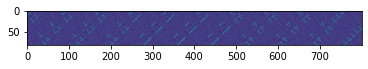

In [8]:

import matplotlib.pyplot as plt
plt.imshow(pulled_distribution_results['xy_hat'][:,:800])

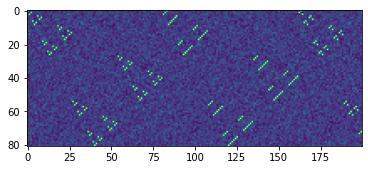

In [9]:
plt.imshow(pulled_distribution_results['xy_div_xyind_hat'][:,:200])

## d_model = 81

In [5]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader
trainer = pl.Trainer(
    gpus=[1],
    min_epochs=1, max_epochs=1, 
    precision=32, 
    log_gpu_memory='all',
    weights_summary = 'full',
    gradient_clip_val=0.0,
)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [6]:
from dataset import GameTestFullDataset
game_data = main.load_data(args.data_path)
test_loader = DataLoader(
    GameTestFullDataset(
        raw_data=game_data, embedding_by_property=False ,debug=True
    ))
res = trainer.test(model=trainmodule, test_dataloaders=test_loader)

---------data----------
num_attributes : 4
num_attr_vals : 3
num_cards_per_query : 2
nest_depth_int : 2
key_support_size : 81
query_support_size : 6561
hold_out : False
train_datapoints length : 6561
val_datapoints length : 6561
train_tokens length : 6561
val_tokens length : 6561
sparsity_estimate : 0.012345679012345678
vocab_size : 19
( : 12
) : 13
NULL : 14
SEP : 15
SOS : 16
EOS : 17
PAD : 18
-----------------------
Testing: 0it [00:00, ?it/s]query
 0 
 [12, 0, 3, 6, 9, 0, 3, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 1 
 [12, 0, 3, 6, 9, 0, 3, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 2 
 [12, 0, 3, 6, 9, 0, 3, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 3 
 [12, 0, 3, 6, 9, 0, 3, 7, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4 
 [12, 0, 3, 6, 9, 0, 3, 7, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 5 
 [12, 0, 3, 6, 9, 0, 3, 7, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 6 
 [12, 0, 3, 6, 9, 0, 3, 8, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 7 
 [12, 0, 3, 6, 9, 0, 3, 8, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 8 
 [1

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if part == '(':
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:96: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif part == ')':


query
 33 
 [12, 0, 3, 6, 9, 1, 3, 8, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 34 
 [12, 0, 3, 6, 9, 1, 3, 8, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 35 
 [12, 0, 3, 6, 9, 1, 3, 8, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 36 
 [12, 0, 3, 6, 9, 1, 4, 6, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 37 
 [12, 0, 3, 6, 9, 1, 4, 6, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 38 
 [12, 0, 3, 6, 9, 1, 4, 6, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 39 
 [12, 0, 3, 6, 9, 1, 4, 7, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 40 
 [12, 0, 3, 6, 9, 1, 4, 7, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 41 
 [12, 0, 3, 6, 9, 1, 4, 7, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 42 
 [12, 0, 3, 6, 9, 1, 4, 8, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 43 
 [12, 0, 3, 6, 9, 1, 4, 8, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 44 
 [12, 0, 3, 6, 9, 1, 4, 8, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 45 
 [12, 0, 3, 6, 9, 1, 5, 6, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 46 
 [12, 0, 3, 6, 9, 1, 5, 6, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 47 
 [12, 0, 3, 6, 9, 1

 165 
 [12, 0, 3, 6, 11, 0, 3, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 166 
 [12, 0, 3, 6, 11, 0, 3, 7, 10, 13]
key
 6 
 [0, 3, 8, 9]
Testing:   3%|▎         | 167/6561 [00:00<00:19, 325.86it/s]query
 167 
 [12, 0, 3, 6, 11, 0, 3, 7, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 168 
 [12, 0, 3, 6, 11, 0, 3, 8, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 169 
 [12, 0, 3, 6, 11, 0, 3, 8, 10, 13]
key
 3 
 [0, 3, 7, 9]
query
 170 
 [12, 0, 3, 6, 11, 0, 3, 8, 11, 13]
key
 5 
 [0, 3, 7, 11]
query
 171 
 [12, 0, 3, 6, 11, 0, 4, 6, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 172 
 [12, 0, 3, 6, 11, 0, 4, 6, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 173 
 [12, 0, 3, 6, 11, 0, 4, 6, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 174 
 [12, 0, 3, 6, 11, 0, 4, 7, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 175 
 [12, 0, 3, 6, 11, 0, 4, 7, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 176 
 [12, 0, 3, 6, 11, 0, 4, 7, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 177 
 [12, 0, 3, 6, 11, 0, 4, 8, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 178 
 [12, 0, 3, 6

 [12, 0, 3, 7, 9, 1, 5, 6, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 289 
 [12, 0, 3, 7, 9, 1, 5, 6, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 290 
 [12, 0, 3, 7, 9, 1, 5, 6, 11, 13]
key
 70 
 [2, 4, 8, 10]
query
 291 
 [12, 0, 3, 7, 9, 1, 5, 7, 9, 13]
key
 66 
 [2, 4, 7, 9]
Testing:   4%|▍         | 292/6561 [00:00<00:20, 305.09it/s]query
 292 
 [12, 0, 3, 7, 9, 1, 5, 7, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 293 
 [12, 0, 3, 7, 9, 1, 5, 7, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 294 
 [12, 0, 3, 7, 9, 1, 5, 8, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 295 
 [12, 0, 3, 7, 9, 1, 5, 8, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 296 
 [12, 0, 3, 7, 9, 1, 5, 8, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 297 
 [12, 0, 3, 7, 9, 2, 3, 6, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 298 
 [12, 0, 3, 7, 9, 2, 3, 6, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 299 
 [12, 0, 3, 7, 9, 2, 3, 6, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 300 
 [12, 0, 3, 7, 9, 2, 3, 7, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 301 
 [12, 0, 3, 7, 9, 2, 3, 7, 

 414 
 [12, 0, 3, 7, 11, 0, 4, 6, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 415 
 [12, 0, 3, 7, 11, 0, 4, 6, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 416 
 [12, 0, 3, 7, 11, 0, 4, 6, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 417 
 [12, 0, 3, 7, 11, 0, 4, 7, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 418 
 [12, 0, 3, 7, 11, 0, 4, 7, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 419 
 [12, 0, 3, 7, 11, 0, 4, 7, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 420 
 [12, 0, 3, 7, 11, 0, 4, 8, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 421 
 [12, 0, 3, 7, 11, 0, 4, 8, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 422 
 [12, 0, 3, 7, 11, 0, 4, 8, 11, 13]
key
 20 
 [0, 5, 6, 11]
Testing:   6%|▋         | 423/6561 [00:01<00:20, 304.83it/s]query
 423 
 [12, 0, 3, 7, 11, 0, 5, 6, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 424 
 [12, 0, 3, 7, 11, 0, 5, 6, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 425 
 [12, 0, 3, 7, 11, 0, 5, 6, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 426 
 [12, 0, 3, 7, 11, 0, 5, 7, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 427 
 [12, 0

 532 
 [12, 0, 3, 8, 9, 1, 5, 6, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 533 
 [12, 0, 3, 8, 9, 1, 5, 6, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 534 
 [12, 0, 3, 8, 9, 1, 5, 7, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 535 
 [12, 0, 3, 8, 9, 1, 5, 7, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 536 
 [12, 0, 3, 8, 9, 1, 5, 7, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 537 
 [12, 0, 3, 8, 9, 1, 5, 8, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 538 
 [12, 0, 3, 8, 9, 1, 5, 8, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 539 
 [12, 0, 3, 8, 9, 1, 5, 8, 11, 13]
key
 70 
 [2, 4, 8, 10]
query
 540 
 [12, 0, 3, 8, 9, 2, 3, 6, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 541 
 [12, 0, 3, 8, 9, 2, 3, 6, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 542 
 [12, 0, 3, 8, 9, 2, 3, 6, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 543 
 [12, 0, 3, 8, 9, 2, 3, 7, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 544 
 [12, 0, 3, 8, 9, 2, 3, 7, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 545 
 [12, 0, 3, 8, 9, 2, 3, 7, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 546 
 [12, 0,

 652 
 [12, 0, 3, 8, 11, 0, 3, 7, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 653 
 [12, 0, 3, 8, 11, 0, 3, 7, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 654 
 [12, 0, 3, 8, 11, 0, 3, 8, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 655 
 [12, 0, 3, 8, 11, 0, 3, 8, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 656 
 [12, 0, 3, 8, 11, 0, 3, 8, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 657 
 [12, 0, 3, 8, 11, 0, 4, 6, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 658 
 [12, 0, 3, 8, 11, 0, 4, 6, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 659 
 [12, 0, 3, 8, 11, 0, 4, 6, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 660 
 [12, 0, 3, 8, 11, 0, 4, 7, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 661 
 [12, 0, 3, 8, 11, 0, 4, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 662 
 [12, 0, 3, 8, 11, 0, 4, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 663 
 [12, 0, 3, 8, 11, 0, 4, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 664 
 [12, 0, 3, 8, 11, 0, 4, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 665 
 [12, 0, 3, 8, 11, 0, 4, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 666 


 76 
 [2, 5, 7, 10]
query
 765 
 [12, 0, 4, 6, 9, 1, 4, 6, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 766 
 [12, 0, 4, 6, 9, 1, 4, 6, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 767 
 [12, 0, 4, 6, 9, 1, 4, 6, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 768 
 [12, 0, 4, 6, 9, 1, 4, 7, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 769 
 [12, 0, 4, 6, 9, 1, 4, 7, 10, 13]
key
 71 
 [2, 4, 8, 11]
query
 770 
 [12, 0, 4, 6, 9, 1, 4, 7, 11, 13]
key
 70 
 [2, 4, 8, 10]
query
 771 
 [12, 0, 4, 6, 9, 1, 4, 8, 9, 13]
key
 66 
 [2, 4, 7, 9]
query
 772 
 [12, 0, 4, 6, 9, 1, 4, 8, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 773 
 [12, 0, 4, 6, 9, 1, 4, 8, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 774 
 [12, 0, 4, 6, 9, 1, 5, 6, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 775 
 [12, 0, 4, 6, 9, 1, 5, 6, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 776 
 [12, 0, 4, 6, 9, 1, 5, 6, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 777 
 [12, 0, 4, 6, 9, 1, 5, 7, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 778 
 [12, 0, 4, 6, 9, 1, 5, 7, 10, 13]
key
 62 
 [2, 3, 8, 

 41 
 [1, 4, 7, 11]
query
 880 
 [12, 0, 4, 6, 10, 2, 4, 8, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 881 
 [12, 0, 4, 6, 10, 2, 4, 8, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 882 
 [12, 0, 4, 6, 10, 2, 5, 6, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 883 
 [12, 0, 4, 6, 10, 2, 5, 6, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 884 
 [12, 0, 4, 6, 10, 2, 5, 6, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 885 
 [12, 0, 4, 6, 10, 2, 5, 7, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 886 
 [12, 0, 4, 6, 10, 2, 5, 7, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 887 
 [12, 0, 4, 6, 10, 2, 5, 7, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 888 
 [12, 0, 4, 6, 10, 2, 5, 8, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 889 
 [12, 0, 4, 6, 10, 2, 5, 8, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 890 
 [12, 0, 4, 6, 10, 2, 5, 8, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 891 
 [12, 0, 4, 6, 11, 0, 3, 6, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 892 
 [12, 0, 4, 6, 11, 0, 3, 6, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 893 
 [12, 0, 4, 6, 11, 0, 3, 6, 11, 13]
key
 

 994 
 [12, 0, 4, 7, 9, 0, 5, 7, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 995 
 [12, 0, 4, 7, 9, 0, 5, 7, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 996 
 [12, 0, 4, 7, 9, 0, 5, 8, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 997 
 [12, 0, 4, 7, 9, 0, 5, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 998 
 [12, 0, 4, 7, 9, 0, 5, 8, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 999 
 [12, 0, 4, 7, 9, 1, 3, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 1000 
 [12, 0, 4, 7, 9, 1, 3, 6, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 1001 
 [12, 0, 4, 7, 9, 1, 3, 6, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 1002 
 [12, 0, 4, 7, 9, 1, 3, 7, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 1003 
 [12, 0, 4, 7, 9, 1, 3, 7, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 1004 
 [12, 0, 4, 7, 9, 1, 3, 7, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 1005 
 [12, 0, 4, 7, 9, 1, 3, 8, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 1006 
 [12, 0, 4, 7, 9, 1, 3, 8, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 1007 
 [12, 0, 4, 7, 9, 1, 3, 8, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 1008 
 [12

 55 
 [2, 3, 6, 10]
query
 1106 
 [12, 0, 4, 7, 10, 1, 5, 8, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 1107 
 [12, 0, 4, 7, 10, 2, 3, 6, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 1108 
 [12, 0, 4, 7, 10, 2, 3, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 1109 
 [12, 0, 4, 7, 10, 2, 3, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 1110 
 [12, 0, 4, 7, 10, 2, 3, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 1111 
 [12, 0, 4, 7, 10, 2, 3, 7, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 1112 
 [12, 0, 4, 7, 10, 2, 3, 7, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 1113 
 [12, 0, 4, 7, 10, 2, 3, 8, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 1114 
 [12, 0, 4, 7, 10, 2, 3, 8, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 1115 
 [12, 0, 4, 7, 10, 2, 3, 8, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 1116 
 [12, 0, 4, 7, 10, 2, 4, 6, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 1117 
 [12, 0, 4, 7, 10, 2, 4, 6, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 1118 
 [12, 0, 4, 7, 10, 2, 4, 6, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 1119 
 [12, 0, 4, 7, 10, 2, 4, 7,

 [12, 0, 4, 8, 9, 0, 3, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 1217 
 [12, 0, 4, 8, 9, 0, 3, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 1218 
 [12, 0, 4, 8, 9, 0, 3, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 1219 
 [12, 0, 4, 8, 9, 0, 3, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 1220 
 [12, 0, 4, 8, 9, 0, 3, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 1221 
 [12, 0, 4, 8, 9, 0, 3, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 1222 
 [12, 0, 4, 8, 9, 0, 3, 8, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 1223 
 [12, 0, 4, 8, 9, 0, 3, 8, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 1224 
 [12, 0, 4, 8, 9, 0, 4, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 1225 
 [12, 0, 4, 8, 9, 0, 4, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 1226 
 [12, 0, 4, 8, 9, 0, 4, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 1227 
 [12, 0, 4, 8, 9, 0, 4, 7, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 1228 
 [12, 0, 4, 8, 9, 0, 4, 7, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 1229 
 [12, 0, 4, 8, 9, 0, 4, 7, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 1230 
 

query
 1330 
 [12, 0, 4, 8, 10, 1, 3, 8, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 1331 
 [12, 0, 4, 8, 10, 1, 3, 8, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 1332 
 [12, 0, 4, 8, 10, 1, 4, 6, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 1333 
 [12, 0, 4, 8, 10, 1, 4, 6, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 1334 
 [12, 0, 4, 8, 10, 1, 4, 6, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 1335 
 [12, 0, 4, 8, 10, 1, 4, 7, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 1336 
 [12, 0, 4, 8, 10, 1, 4, 7, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 1337 
 [12, 0, 4, 8, 10, 1, 4, 7, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 1338 
 [12, 0, 4, 8, 10, 1, 4, 8, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 1339 
 [12, 0, 4, 8, 10, 1, 4, 8, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 1340 
 [12, 0, 4, 8, 10, 1, 4, 8, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 1341 
 [12, 0, 4, 8, 10, 1, 5, 6, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 1342 
 [12, 0, 4, 8, 10, 1, 5, 6, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 1343 
 [12, 0, 4, 8, 10, 1, 5, 6, 11, 13]
key
 57 
 

query
 1443 
 [12, 0, 4, 8, 11, 2, 4, 7, 9, 13]
key
 37 
 [1, 4, 6, 10]
query
 1444 
 [12, 0, 4, 8, 11, 2, 4, 7, 10, 13]
key
 36 
 [1, 4, 6, 9]
query
 1445 
 [12, 0, 4, 8, 11, 2, 4, 7, 11, 13]
key
 38 
 [1, 4, 6, 11]
query
 1446 
 [12, 0, 4, 8, 11, 2, 4, 8, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 1447 
 [12, 0, 4, 8, 11, 2, 4, 8, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 1448 
 [12, 0, 4, 8, 11, 2, 4, 8, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 1449 
 [12, 0, 4, 8, 11, 2, 5, 6, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 1450 
 [12, 0, 4, 8, 11, 2, 5, 6, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 1451 
 [12, 0, 4, 8, 11, 2, 5, 6, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 1452 
 [12, 0, 4, 8, 11, 2, 5, 7, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 1453 
 [12, 0, 4, 8, 11, 2, 5, 7, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 1454 
 [12, 0, 4, 8, 11, 2, 5, 7, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 1455 
 [12, 0, 4, 8, 11, 2, 5, 8, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 1456 
 [12, 0, 4, 8, 11, 2, 5, 8, 10, 13]
key
 33 
 [

 [0, 5, 6, 9]
query
 1560 
 [12, 0, 5, 6, 10, 0, 5, 7, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 1561 
 [12, 0, 5, 6, 10, 0, 5, 7, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 1562 
 [12, 0, 5, 6, 10, 0, 5, 7, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 1563 
 [12, 0, 5, 6, 10, 0, 5, 8, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 1564 
 [12, 0, 5, 6, 10, 0, 5, 8, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 1565 
 [12, 0, 5, 6, 10, 0, 5, 8, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 1566 
 [12, 0, 5, 6, 10, 1, 3, 6, 9, 13]
key
 65 
 [2, 4, 6, 11]
Testing:  24%|██▍       | 1567/6561 [00:05<00:19, 258.19it/s]query
 1567 
 [12, 0, 5, 6, 10, 1, 3, 6, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 1568 
 [12, 0, 5, 6, 10, 1, 3, 6, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 1569 
 [12, 0, 5, 6, 10, 1, 3, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 1570 
 [12, 0, 5, 6, 10, 1, 3, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 1571 
 [12, 0, 5, 6, 10, 1, 3, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 1572 
 [12, 0, 5, 6, 10, 1, 3, 8, 9, 13]
key
 68 


key
 80 
 [2, 5, 8, 11]
query
 1671 
 [12, 0, 5, 6, 11, 1, 5, 8, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 1672 
 [12, 0, 5, 6, 11, 1, 5, 8, 10, 13]
key
 75 
 [2, 5, 7, 9]
Testing:  25%|██▌       | 1673/6561 [00:05<00:18, 259.40it/s]query
 1673 
 [12, 0, 5, 6, 11, 1, 5, 8, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 1674 
 [12, 0, 5, 6, 11, 2, 3, 6, 9, 13]
key
 37 
 [1, 4, 6, 10]
query
 1675 
 [12, 0, 5, 6, 11, 2, 3, 6, 10, 13]
key
 36 
 [1, 4, 6, 9]
query
 1676 
 [12, 0, 5, 6, 11, 2, 3, 6, 11, 13]
key
 38 
 [1, 4, 6, 11]
query
 1677 
 [12, 0, 5, 6, 11, 2, 3, 7, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 1678 
 [12, 0, 5, 6, 11, 2, 3, 7, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 1679 
 [12, 0, 5, 6, 11, 2, 3, 7, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 1680 
 [12, 0, 5, 6, 11, 2, 3, 8, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 1681 
 [12, 0, 5, 6, 11, 2, 3, 8, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 1682 
 [12, 0, 5, 6, 11, 2, 3, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 1683 
 [12, 0, 5, 6, 11, 2, 4, 6, 9, 13]

 17 
 [0, 4, 8, 11]
query
 1783 
 [12, 0, 5, 7, 10, 0, 3, 6, 10, 13]
key
 16 
 [0, 4, 8, 10]
query
 1784 
 [12, 0, 5, 7, 10, 0, 3, 6, 11, 13]
key
 15 
 [0, 4, 8, 9]
query
 1785 
 [12, 0, 5, 7, 10, 0, 3, 7, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 1786 
 [12, 0, 5, 7, 10, 0, 3, 7, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 1787 
 [12, 0, 5, 7, 10, 0, 3, 7, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 1788 
 [12, 0, 5, 7, 10, 0, 3, 8, 9, 13]
key
 11 
 [0, 4, 6, 11]
query
 1789 
 [12, 0, 5, 7, 10, 0, 3, 8, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 1790 
 [12, 0, 5, 7, 10, 0, 3, 8, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 1791 
 [12, 0, 5, 7, 10, 0, 4, 6, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 1792 
 [12, 0, 5, 7, 10, 0, 4, 6, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 1793 
 [12, 0, 5, 7, 10, 0, 4, 6, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 1794 
 [12, 0, 5, 7, 10, 0, 4, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 1795 
 [12, 0, 5, 7, 10, 0, 4, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 1796 
 [12, 0, 5, 7, 10, 0, 4, 7, 11, 

 68 
 [2, 4, 7, 11]
query
 1896 
 [12, 0, 5, 7, 11, 1, 3, 8, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 1897 
 [12, 0, 5, 7, 11, 1, 3, 8, 10, 13]
key
 63 
 [2, 4, 6, 9]
query
 1898 
 [12, 0, 5, 7, 11, 1, 3, 8, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 1899 
 [12, 0, 5, 7, 11, 1, 4, 6, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 1900 
 [12, 0, 5, 7, 11, 1, 4, 6, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 1901 
 [12, 0, 5, 7, 11, 1, 4, 6, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 1902 
 [12, 0, 5, 7, 11, 1, 4, 7, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 1903 
 [12, 0, 5, 7, 11, 1, 4, 7, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 1904 
 [12, 0, 5, 7, 11, 1, 4, 7, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 1905 
 [12, 0, 5, 7, 11, 1, 4, 8, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 1906 
 [12, 0, 5, 7, 11, 1, 4, 8, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 1907 
 [12, 0, 5, 7, 11, 1, 4, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 1908 
 [12, 0, 5, 7, 11, 1, 5, 6, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 1909 
 [12, 0, 5, 7, 11, 1, 5, 6,

 [12, 0, 5, 8, 9, 2, 3, 8, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 2007 
 [12, 0, 5, 8, 9, 2, 4, 6, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 2008 
 [12, 0, 5, 8, 9, 2, 4, 6, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 2009 
 [12, 0, 5, 8, 9, 2, 4, 6, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 2010 
 [12, 0, 5, 8, 9, 2, 4, 7, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 2011 
 [12, 0, 5, 8, 9, 2, 4, 7, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 2012 
 [12, 0, 5, 8, 9, 2, 4, 7, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 2013 
 [12, 0, 5, 8, 9, 2, 4, 8, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 2014 
 [12, 0, 5, 8, 9, 2, 4, 8, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 2015 
 [12, 0, 5, 8, 9, 2, 4, 8, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 2016 
 [12, 0, 5, 8, 9, 2, 5, 6, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 2017 
 [12, 0, 5, 8, 9, 2, 5, 6, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 2018 
 [12, 0, 5, 8, 9, 2, 5, 6, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 2019 
 [12, 0, 5, 8, 9, 2, 5, 7, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 2020 
 [

query
 2117 
 [12, 0, 5, 8, 11, 0, 4, 6, 11, 13]
key
 5 
 [0, 3, 7, 11]
query
 2118 
 [12, 0, 5, 8, 11, 0, 4, 7, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 2119 
 [12, 0, 5, 8, 11, 0, 4, 7, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 2120 
 [12, 0, 5, 8, 11, 0, 4, 7, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 2121 
 [12, 0, 5, 8, 11, 0, 4, 8, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 2122 
 [12, 0, 5, 8, 11, 0, 4, 8, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 2123 
 [12, 0, 5, 8, 11, 0, 4, 8, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 2124 
 [12, 0, 5, 8, 11, 0, 5, 6, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 2125 
 [12, 0, 5, 8, 11, 0, 5, 6, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 2126 
 [12, 0, 5, 8, 11, 0, 5, 6, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 2127 
 [12, 0, 5, 8, 11, 0, 5, 7, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 2128 
 [12, 0, 5, 8, 11, 0, 5, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 2129 
 [12, 0, 5, 8, 11, 0, 5, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 2130 
 [12, 0, 5, 8, 11, 0, 5, 8, 9, 13]
key
 25 
 [0, 5, 8

query
 2231 
 [12, 1, 3, 6, 9, 1, 4, 8, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 2232 
 [12, 1, 3, 6, 9, 1, 5, 6, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 2233 
 [12, 1, 3, 6, 9, 1, 5, 6, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 2234 
 [12, 1, 3, 6, 9, 1, 5, 6, 11, 13]
key
 37 
 [1, 4, 6, 10]
query
 2235 
 [12, 1, 3, 6, 9, 1, 5, 7, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 2236 
 [12, 1, 3, 6, 9, 1, 5, 7, 10, 13]
key
 44 
 [1, 4, 8, 11]
Testing:  34%|███▍      | 2237/6561 [00:08<00:17, 252.83it/s]query
 2237 
 [12, 1, 3, 6, 9, 1, 5, 7, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 2238 
 [12, 1, 3, 6, 9, 1, 5, 8, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 2239 
 [12, 1, 3, 6, 9, 1, 5, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 2240 
 [12, 1, 3, 6, 9, 1, 5, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 2241 
 [12, 1, 3, 6, 9, 2, 3, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 2242 
 [12, 1, 3, 6, 9, 2, 3, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 2243 
 [12, 1, 3, 6, 9, 2, 3, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 2244 
 

key
 10 
 [0, 4, 6, 10]
Testing:  36%|███▌      | 2342/6561 [00:08<00:16, 255.81it/s]query
 2342 
 [12, 1, 3, 6, 10, 2, 5, 6, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 2343 
 [12, 1, 3, 6, 10, 2, 5, 7, 9, 13]
key
 17 
 [0, 4, 8, 11]
query
 2344 
 [12, 1, 3, 6, 10, 2, 5, 7, 10, 13]
key
 16 
 [0, 4, 8, 10]
query
 2345 
 [12, 1, 3, 6, 10, 2, 5, 7, 11, 13]
key
 15 
 [0, 4, 8, 9]
query
 2346 
 [12, 1, 3, 6, 10, 2, 5, 8, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 2347 
 [12, 1, 3, 6, 10, 2, 5, 8, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 2348 
 [12, 1, 3, 6, 10, 2, 5, 8, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 2349 
 [12, 1, 3, 6, 11, 0, 3, 6, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 2350 
 [12, 1, 3, 6, 11, 0, 3, 6, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 2351 
 [12, 1, 3, 6, 11, 0, 3, 6, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 2352 
 [12, 1, 3, 6, 11, 0, 3, 7, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 2353 
 [12, 1, 3, 6, 11, 0, 3, 7, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 2354 
 [12, 1, 3, 6, 11, 0, 3, 7, 11, 13]


 [2, 4, 7, 9]
query
 2452 
 [12, 1, 3, 7, 9, 0, 5, 7, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 2453 
 [12, 1, 3, 7, 9, 0, 5, 7, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 2454 
 [12, 1, 3, 7, 9, 0, 5, 8, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 2455 
 [12, 1, 3, 7, 9, 0, 5, 8, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 2456 
 [12, 1, 3, 7, 9, 0, 5, 8, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 2457 
 [12, 1, 3, 7, 9, 1, 3, 6, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 2458 
 [12, 1, 3, 7, 9, 1, 3, 6, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 2459 
 [12, 1, 3, 7, 9, 1, 3, 6, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 2460 
 [12, 1, 3, 7, 9, 1, 3, 7, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 2461 
 [12, 1, 3, 7, 9, 1, 3, 7, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 2462 
 [12, 1, 3, 7, 9, 1, 3, 7, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 2463 
 [12, 1, 3, 7, 9, 1, 3, 8, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 2464 
 [12, 1, 3, 7, 9, 1, 3, 8, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 2465 
 [12, 1, 3, 7, 9, 1, 3, 8, 11, 13]
key
 28 
 

 37 
 [1, 4, 6, 10]
query
 2564 
 [12, 1, 3, 7, 10, 1, 5, 8, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 2565 
 [12, 1, 3, 7, 10, 2, 3, 6, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 2566 
 [12, 1, 3, 7, 10, 2, 3, 6, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 2567 
 [12, 1, 3, 7, 10, 2, 3, 6, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 2568 
 [12, 1, 3, 7, 10, 2, 3, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 2569 
 [12, 1, 3, 7, 10, 2, 3, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 2570 
 [12, 1, 3, 7, 10, 2, 3, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 2571 
 [12, 1, 3, 7, 10, 2, 3, 8, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 2572 
 [12, 1, 3, 7, 10, 2, 3, 8, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 2573 
 [12, 1, 3, 7, 10, 2, 3, 8, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 2574 
 [12, 1, 3, 7, 10, 2, 4, 6, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 2575 
 [12, 1, 3, 7, 10, 2, 4, 6, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 2576 
 [12, 1, 3, 7, 10, 2, 4, 6, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 2577 
 [12, 1, 3, 7, 10, 2, 4, 7, 9, 13]
k

 2674 
 [12, 1, 3, 8, 9, 0, 3, 6, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 2675 
 [12, 1, 3, 8, 9, 0, 3, 6, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 2676 
 [12, 1, 3, 8, 9, 0, 3, 7, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 2677 
 [12, 1, 3, 8, 9, 0, 3, 7, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 2678 
 [12, 1, 3, 8, 9, 0, 3, 7, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 2679 
 [12, 1, 3, 8, 9, 0, 3, 8, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 2680 
 [12, 1, 3, 8, 9, 0, 3, 8, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 2681 
 [12, 1, 3, 8, 9, 0, 3, 8, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 2682 
 [12, 1, 3, 8, 9, 0, 4, 6, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 2683 
 [12, 1, 3, 8, 9, 0, 4, 6, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 2684 
 [12, 1, 3, 8, 9, 0, 4, 6, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 2685 
 [12, 1, 3, 8, 9, 0, 4, 7, 9, 13]
key
 72 
 [2, 5, 6, 9]
Testing:  41%|████      | 2686/6561 [00:09<00:15, 245.05it/s]query
 2686 
 [12, 1, 3, 8, 9, 0, 4, 7, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 2687 
 [12

query
 2786 
 [12, 1, 3, 8, 10, 1, 3, 7, 11, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  42%|████▏     | 2787/6561 [00:10<00:15, 246.27it/s]query
 2787 
 [12, 1, 3, 8, 10, 1, 3, 8, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 2788 
 [12, 1, 3, 8, 10, 1, 3, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 2789 
 [12, 1, 3, 8, 10, 1, 3, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 2790 
 [12, 1, 3, 8, 10, 1, 4, 6, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 2791 
 [12, 1, 3, 8, 10, 1, 4, 6, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 2792 
 [12, 1, 3, 8, 10, 1, 4, 6, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 2793 
 [12, 1, 3, 8, 10, 1, 4, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 2794 
 [12, 1, 3, 8, 10, 1, 4, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 2795 
 [12, 1, 3, 8, 10, 1, 4, 7, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 2796 
 [12, 1, 3, 8, 10, 1, 4, 8, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 2797 
 [12, 1, 3, 8, 10, 1, 4, 8, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 2798 
 [12, 1, 3, 8, 10, 1, 4, 8, 11, 13]
key
 51 
 [1, 5, 8, 9]

 [0, 3, 8, 9]
query
 2897 
 [12, 1, 3, 8, 11, 2, 3, 8, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 2898 
 [12, 1, 3, 8, 11, 2, 4, 6, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 2899 
 [12, 1, 3, 8, 11, 2, 4, 6, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 2900 
 [12, 1, 3, 8, 11, 2, 4, 6, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 2901 
 [12, 1, 3, 8, 11, 2, 4, 7, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 2902 
 [12, 1, 3, 8, 11, 2, 4, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 2903 
 [12, 1, 3, 8, 11, 2, 4, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 2904 
 [12, 1, 3, 8, 11, 2, 4, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 2905 
 [12, 1, 3, 8, 11, 2, 4, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 2906 
 [12, 1, 3, 8, 11, 2, 4, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 2907 
 [12, 1, 3, 8, 11, 2, 5, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 2908 
 [12, 1, 3, 8, 11, 2, 5, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 2909 
 [12, 1, 3, 8, 11, 2, 5, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 2910 
 [12, 1, 3, 8, 11, 2, 5, 7, 9, 13

 63 
 [2, 4, 6, 9]
query
 3009 
 [12, 1, 4, 6, 10, 0, 4, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 3010 
 [12, 1, 4, 6, 10, 0, 4, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 3011 
 [12, 1, 4, 6, 10, 0, 4, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 3012 
 [12, 1, 4, 6, 10, 0, 4, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 3013 
 [12, 1, 4, 6, 10, 0, 4, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 3014 
 [12, 1, 4, 6, 10, 0, 4, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 3015 
 [12, 1, 4, 6, 10, 0, 5, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 3016 
 [12, 1, 4, 6, 10, 0, 5, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 3017 
 [12, 1, 4, 6, 10, 0, 5, 6, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 3018 
 [12, 1, 4, 6, 10, 0, 5, 7, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 3019 
 [12, 1, 4, 6, 10, 0, 5, 7, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 3020 
 [12, 1, 4, 6, 10, 0, 5, 7, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 3021 
 [12, 1, 4, 6, 10, 0, 5, 8, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 3022 
 [12, 1, 4, 6, 10, 0, 5, 8, 

query
 3120 
 [12, 1, 4, 6, 11, 1, 4, 8, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 3121 
 [12, 1, 4, 6, 11, 1, 4, 8, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 3122 
 [12, 1, 4, 6, 11, 1, 4, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 3123 
 [12, 1, 4, 6, 11, 1, 5, 6, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 3124 
 [12, 1, 4, 6, 11, 1, 5, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 3125 
 [12, 1, 4, 6, 11, 1, 5, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 3126 
 [12, 1, 4, 6, 11, 1, 5, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 3127 
 [12, 1, 4, 6, 11, 1, 5, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 3128 
 [12, 1, 4, 6, 11, 1, 5, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
Testing:  48%|████▊     | 3129/6561 [00:11<00:13, 245.31it/s]query
 3129 
 [12, 1, 4, 6, 11, 1, 5, 8, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 3130 
 [12, 1, 4, 6, 11, 1, 5, 8, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 3131 
 [12, 1, 4, 6, 11, 1, 5, 8, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 3132 
 [12, 1, 4, 6, 11, 2, 3, 6, 9, 13]
key
 19 
 [0, 5, 6, 10]

 3231 
 [12, 1, 4, 7, 9, 2, 5, 6, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 3232 
 [12, 1, 4, 7, 9, 2, 5, 6, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 3233 
 [12, 1, 4, 7, 9, 2, 5, 6, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 3234 
 [12, 1, 4, 7, 9, 2, 5, 7, 9, 13]
key
 3 
 [0, 3, 7, 9]
Testing:  49%|████▉     | 3235/6561 [00:12<00:13, 249.59it/s]query
 3235 
 [12, 1, 4, 7, 9, 2, 5, 7, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 3236 
 [12, 1, 4, 7, 9, 2, 5, 7, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 3237 
 [12, 1, 4, 7, 9, 2, 5, 8, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 3238 
 [12, 1, 4, 7, 9, 2, 5, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 3239 
 [12, 1, 4, 7, 9, 2, 5, 8, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 3240 
 [12, 1, 4, 7, 10, 0, 3, 6, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 3241 
 [12, 1, 4, 7, 10, 0, 3, 6, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 3242 
 [12, 1, 4, 7, 10, 0, 3, 6, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 3243 
 [12, 1, 4, 7, 10, 0, 3, 7, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 3244 
 [12, 1, 4

 [12, 1, 4, 7, 11, 0, 5, 6, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 3342 
 [12, 1, 4, 7, 11, 0, 5, 7, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 3343 
 [12, 1, 4, 7, 11, 0, 5, 7, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 3344 
 [12, 1, 4, 7, 11, 0, 5, 7, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 3345 
 [12, 1, 4, 7, 11, 0, 5, 8, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 3346 
 [12, 1, 4, 7, 11, 0, 5, 8, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 3347 
 [12, 1, 4, 7, 11, 0, 5, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 3348 
 [12, 1, 4, 7, 11, 1, 3, 6, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 3349 
 [12, 1, 4, 7, 11, 1, 3, 6, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 3350 
 [12, 1, 4, 7, 11, 1, 3, 6, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 3351 
 [12, 1, 4, 7, 11, 1, 3, 7, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 3352 
 [12, 1, 4, 7, 11, 1, 3, 7, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 3353 
 [12, 1, 4, 7, 11, 1, 3, 7, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 3354 
 [12, 1, 4, 7, 11, 1, 3, 8, 9, 13]
key
 46 
 [1, 5, 6, 10]


 [1, 3, 6, 10]
query
 3453 
 [12, 1, 4, 8, 9, 1, 5, 8, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 3454 
 [12, 1, 4, 8, 9, 1, 5, 8, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 3455 
 [12, 1, 4, 8, 9, 1, 5, 8, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 3456 
 [12, 1, 4, 8, 9, 2, 3, 6, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 3457 
 [12, 1, 4, 8, 9, 2, 3, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 3458 
 [12, 1, 4, 8, 9, 2, 3, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 3459 
 [12, 1, 4, 8, 9, 2, 3, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 3460 
 [12, 1, 4, 8, 9, 2, 3, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 3461 
 [12, 1, 4, 8, 9, 2, 3, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 3462 
 [12, 1, 4, 8, 9, 2, 3, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 3463 
 [12, 1, 4, 8, 9, 2, 3, 8, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 3464 
 [12, 1, 4, 8, 9, 2, 3, 8, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 3465 
 [12, 1, 4, 8, 9, 2, 4, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 3466 
 [12, 1, 4, 8, 9, 2, 4, 6, 10, 13]
key
 14 
 [

 3564 
 [12, 1, 4, 8, 11, 0, 3, 6, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 3565 
 [12, 1, 4, 8, 11, 0, 3, 6, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 3566 
 [12, 1, 4, 8, 11, 0, 3, 6, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 3567 
 [12, 1, 4, 8, 11, 0, 3, 7, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 3568 
 [12, 1, 4, 8, 11, 0, 3, 7, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 3569 
 [12, 1, 4, 8, 11, 0, 3, 7, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 3570 
 [12, 1, 4, 8, 11, 0, 3, 8, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 3571 
 [12, 1, 4, 8, 11, 0, 3, 8, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 3572 
 [12, 1, 4, 8, 11, 0, 3, 8, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 3573 
 [12, 1, 4, 8, 11, 0, 4, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
Testing:  54%|█████▍    | 3574/6561 [00:13<00:11, 254.63it/s]query
 3574 
 [12, 1, 4, 8, 11, 0, 4, 6, 10, 13]
key
 66 
 [2, 4, 7, 9]
query
 3575 
 [12, 1, 4, 8, 11, 0, 4, 6, 11, 13]
key
 68 
 [2, 4, 7, 11]
query
 3576 
 [12, 1, 4, 8, 11, 0, 4, 7, 9, 13]
key
 64 
 [2, 4, 6, 10]
query

 37 
 [1, 4, 6, 10]
query
 3675 
 [12, 1, 5, 6, 9, 1, 3, 7, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 3676 
 [12, 1, 5, 6, 9, 1, 3, 7, 10, 13]
key
 44 
 [1, 4, 8, 11]
Testing:  56%|█████▌    | 3677/6561 [00:13<00:11, 251.43it/s]query
 3677 
 [12, 1, 5, 6, 9, 1, 3, 7, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 3678 
 [12, 1, 5, 6, 9, 1, 3, 8, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 3679 
 [12, 1, 5, 6, 9, 1, 3, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 3680 
 [12, 1, 5, 6, 9, 1, 3, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 3681 
 [12, 1, 5, 6, 9, 1, 4, 6, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 3682 
 [12, 1, 5, 6, 9, 1, 4, 6, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 3683 
 [12, 1, 5, 6, 9, 1, 4, 6, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 3684 
 [12, 1, 5, 6, 9, 1, 4, 7, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 3685 
 [12, 1, 5, 6, 9, 1, 4, 7, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 3686 
 [12, 1, 5, 6, 9, 1, 4, 7, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 3687 
 [12, 1, 5, 6, 9, 1, 4, 8, 9, 13]
key
 30 
 [1, 3,

 [12, 1, 5, 6, 10, 2, 3, 7, 11, 13]
key
 15 
 [0, 4, 8, 9]
query
 3786 
 [12, 1, 5, 6, 10, 2, 3, 8, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 3787 
 [12, 1, 5, 6, 10, 2, 3, 8, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 3788 
 [12, 1, 5, 6, 10, 2, 3, 8, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 3789 
 [12, 1, 5, 6, 10, 2, 4, 6, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 3790 
 [12, 1, 5, 6, 10, 2, 4, 6, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 3791 
 [12, 1, 5, 6, 10, 2, 4, 6, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 3792 
 [12, 1, 5, 6, 10, 2, 4, 7, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 3793 
 [12, 1, 5, 6, 10, 2, 4, 7, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 3794 
 [12, 1, 5, 6, 10, 2, 4, 7, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 3795 
 [12, 1, 5, 6, 10, 2, 4, 8, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 3796 
 [12, 1, 5, 6, 10, 2, 4, 8, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 3797 
 [12, 1, 5, 6, 10, 2, 4, 8, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 3798 
 [12, 1, 5, 6, 10, 2, 5, 6, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 379

query
 3896 
 [12, 1, 5, 7, 9, 0, 3, 8, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 3897 
 [12, 1, 5, 7, 9, 0, 4, 6, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 3898 
 [12, 1, 5, 7, 9, 0, 4, 6, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 3899 
 [12, 1, 5, 7, 9, 0, 4, 6, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 3900 
 [12, 1, 5, 7, 9, 0, 4, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 3901 
 [12, 1, 5, 7, 9, 0, 4, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 3902 
 [12, 1, 5, 7, 9, 0, 4, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 3903 
 [12, 1, 5, 7, 9, 0, 4, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 3904 
 [12, 1, 5, 7, 9, 0, 4, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 3905 
 [12, 1, 5, 7, 9, 0, 4, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 3906 
 [12, 1, 5, 7, 9, 0, 5, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 3907 
 [12, 1, 5, 7, 9, 0, 5, 6, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 3908 
 [12, 1, 5, 7, 9, 0, 5, 6, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 3909 
 [12, 1, 5, 7, 9, 0, 5, 7, 9, 13]
key
 75 
 [2, 5, 7, 9]
qu

 33 
 [1, 3, 8, 9]
query
 4008 
 [12, 1, 5, 7, 10, 1, 4, 7, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 4009 
 [12, 1, 5, 7, 10, 1, 4, 7, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 4010 
 [12, 1, 5, 7, 10, 1, 4, 7, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 4011 
 [12, 1, 5, 7, 10, 1, 4, 8, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 4012 
 [12, 1, 5, 7, 10, 1, 4, 8, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 4013 
 [12, 1, 5, 7, 10, 1, 4, 8, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 4014 
 [12, 1, 5, 7, 10, 1, 5, 6, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 4015 
 [12, 1, 5, 7, 10, 1, 5, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 4016 
 [12, 1, 5, 7, 10, 1, 5, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 4017 
 [12, 1, 5, 7, 10, 1, 5, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 4018 
 [12, 1, 5, 7, 10, 1, 5, 7, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 4019 
 [12, 1, 5, 7, 10, 1, 5, 7, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 4020 
 [12, 1, 5, 7, 10, 1, 5, 8, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 4021 
 [12, 1, 5, 7, 10, 1, 5, 8, 

query
 4118 
 [12, 1, 5, 7, 11, 2, 4, 7, 11, 13]
key
 5 
 [0, 3, 7, 11]
query
 4119 
 [12, 1, 5, 7, 11, 2, 4, 8, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 4120 
 [12, 1, 5, 7, 11, 2, 4, 8, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 4121 
 [12, 1, 5, 7, 11, 2, 4, 8, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 4122 
 [12, 1, 5, 7, 11, 2, 5, 6, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 4123 
 [12, 1, 5, 7, 11, 2, 5, 6, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 4124 
 [12, 1, 5, 7, 11, 2, 5, 6, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 4125 
 [12, 1, 5, 7, 11, 2, 5, 7, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 4126 
 [12, 1, 5, 7, 11, 2, 5, 7, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 4127 
 [12, 1, 5, 7, 11, 2, 5, 7, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 4128 
 [12, 1, 5, 7, 11, 2, 5, 8, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 4129 
 [12, 1, 5, 7, 11, 2, 5, 8, 10, 13]
key
 18 
 [0, 5, 6, 9]
Testing:  63%|██████▎   | 4130/6561 [00:15<00:09, 250.20it/s]query
 4130 
 [12, 1, 5, 7, 11, 2, 5, 8, 11, 13]
key
 20 
 [0, 5, 6, 11]
qu

 4231 
 [12, 1, 5, 8, 10, 0, 5, 6, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 4232 
 [12, 1, 5, 8, 10, 0, 5, 6, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 4233 
 [12, 1, 5, 8, 10, 0, 5, 7, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 4234 
 [12, 1, 5, 8, 10, 0, 5, 7, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 4235 
 [12, 1, 5, 8, 10, 0, 5, 7, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 4236 
 [12, 1, 5, 8, 10, 0, 5, 8, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 4237 
 [12, 1, 5, 8, 10, 0, 5, 8, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 4238 
 [12, 1, 5, 8, 10, 0, 5, 8, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 4239 
 [12, 1, 5, 8, 10, 1, 3, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 4240 
 [12, 1, 5, 8, 10, 1, 3, 6, 10, 13]
key
 40 
 [1, 4, 7, 10]
Testing:  65%|██████▍   | 4241/6561 [00:16<00:09, 256.92it/s]query
 4241 
 [12, 1, 5, 8, 10, 1, 3, 6, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 4242 
 [12, 1, 5, 8, 10, 1, 3, 7, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 4243 
 [12, 1, 5, 8, 10, 1, 3, 7, 10, 13]
key
 37 
 [1, 4, 6, 10]
quer

 4341 
 [12, 1, 5, 8, 11, 1, 5, 7, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 4342 
 [12, 1, 5, 8, 11, 1, 5, 7, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 4343 
 [12, 1, 5, 8, 11, 1, 5, 7, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 4344 
 [12, 1, 5, 8, 11, 1, 5, 8, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 4345 
 [12, 1, 5, 8, 11, 1, 5, 8, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 4346 
 [12, 1, 5, 8, 11, 1, 5, 8, 11, 13]
key
 53 
 [1, 5, 8, 11]
Testing:  66%|██████▋   | 4347/6561 [00:16<00:08, 254.19it/s]query
 4347 
 [12, 1, 5, 8, 11, 2, 3, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 4348 
 [12, 1, 5, 8, 11, 2, 3, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 4349 
 [12, 1, 5, 8, 11, 2, 3, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 4350 
 [12, 1, 5, 8, 11, 2, 3, 7, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 4351 
 [12, 1, 5, 8, 11, 2, 3, 7, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 4352 
 [12, 1, 5, 8, 11, 2, 3, 7, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 4353 
 [12, 1, 5, 8, 11, 2, 3, 8, 9, 13]
key
 16 
 [0, 4, 8, 10]
query


Testing:  68%|██████▊   | 4452/6561 [00:17<00:09, 222.63it/s]query
 4452 
 [12, 2, 3, 6, 9, 2, 5, 8, 9, 13]
key
 66 
 [2, 4, 7, 9]
query
 4453 
 [12, 2, 3, 6, 9, 2, 5, 8, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 4454 
 [12, 2, 3, 6, 9, 2, 5, 8, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 4455 
 [12, 2, 3, 6, 10, 0, 3, 6, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 4456 
 [12, 2, 3, 6, 10, 0, 3, 6, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 4457 
 [12, 2, 3, 6, 10, 0, 3, 6, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 4458 
 [12, 2, 3, 6, 10, 0, 3, 7, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 4459 
 [12, 2, 3, 6, 10, 0, 3, 7, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 4460 
 [12, 2, 3, 6, 10, 0, 3, 7, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 4461 
 [12, 2, 3, 6, 10, 0, 3, 8, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 4462 
 [12, 2, 3, 6, 10, 0, 3, 8, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 4463 
 [12, 2, 3, 6, 10, 0, 3, 8, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 4464 
 [12, 2, 3, 6, 10, 0, 4, 6, 9, 13]
key
 47 
 [1, 5, 6, 11]
qu

Testing:  70%|██████▉   | 4562/6561 [00:17<00:08, 248.80it/s]query
 4562 
 [12, 2, 3, 6, 11, 0, 5, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 4563 
 [12, 2, 3, 6, 11, 1, 3, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 4564 
 [12, 2, 3, 6, 11, 1, 3, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 4565 
 [12, 2, 3, 6, 11, 1, 3, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 4566 
 [12, 2, 3, 6, 11, 1, 3, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 4567 
 [12, 2, 3, 6, 11, 1, 3, 7, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 4568 
 [12, 2, 3, 6, 11, 1, 3, 7, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 4569 
 [12, 2, 3, 6, 11, 1, 3, 8, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 4570 
 [12, 2, 3, 6, 11, 1, 3, 8, 10, 13]
key
 3 
 [0, 3, 7, 9]
query
 4571 
 [12, 2, 3, 6, 11, 1, 3, 8, 11, 13]
key
 5 
 [0, 3, 7, 11]
query
 4572 
 [12, 2, 3, 6, 11, 1, 4, 6, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 4573 
 [12, 2, 3, 6, 11, 1, 4, 6, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 4574 
 [12, 2, 3, 6, 11, 1, 4, 6, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 

query
 4674 
 [12, 2, 3, 7, 9, 2, 3, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
Testing:  71%|███████▏  | 4675/6561 [00:17<00:07, 264.78it/s]query
 4675 
 [12, 2, 3, 7, 9, 2, 3, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 4676 
 [12, 2, 3, 7, 9, 2, 3, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 4677 
 [12, 2, 3, 7, 9, 2, 3, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 4678 
 [12, 2, 3, 7, 9, 2, 3, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 4679 
 [12, 2, 3, 7, 9, 2, 3, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 4680 
 [12, 2, 3, 7, 9, 2, 4, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 4681 
 [12, 2, 3, 7, 9, 2, 4, 6, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 4682 
 [12, 2, 3, 7, 9, 2, 4, 6, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 4683 
 [12, 2, 3, 7, 9, 2, 4, 7, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 4684 
 [12, 2, 3, 7, 9, 2, 4, 7, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 4685 
 [12, 2, 3, 7, 9, 2, 4, 7, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 4686 
 [12, 2, 3, 7, 9, 2, 4, 8, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 4687 


query
 4787 
 [12, 2, 3, 7, 11, 0, 3, 8, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 4788 
 [12, 2, 3, 7, 11, 0, 4, 6, 9, 13]
key
 52 
 [1, 5, 8, 10]
Testing:  73%|███████▎  | 4789/6561 [00:18<00:06, 268.39it/s]query
 4789 
 [12, 2, 3, 7, 11, 0, 4, 6, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 4790 
 [12, 2, 3, 7, 11, 0, 4, 6, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 4791 
 [12, 2, 3, 7, 11, 0, 4, 7, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 4792 
 [12, 2, 3, 7, 11, 0, 4, 7, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 4793 
 [12, 2, 3, 7, 11, 0, 4, 7, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 4794 
 [12, 2, 3, 7, 11, 0, 4, 8, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 4795 
 [12, 2, 3, 7, 11, 0, 4, 8, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 4796 
 [12, 2, 3, 7, 11, 0, 4, 8, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 4797 
 [12, 2, 3, 7, 11, 0, 5, 6, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 4798 
 [12, 2, 3, 7, 11, 0, 5, 6, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 4799 
 [12, 2, 3, 7, 11, 0, 5, 6, 11, 13]
key
 44 
 [1, 4, 8, 11

Testing:  75%|███████▍  | 4899/6561 [00:18<00:06, 256.95it/s]query
 4899 
 [12, 2, 3, 8, 9, 1, 4, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 4900 
 [12, 2, 3, 8, 9, 1, 4, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 4901 
 [12, 2, 3, 8, 9, 1, 4, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 4902 
 [12, 2, 3, 8, 9, 1, 4, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 4903 
 [12, 2, 3, 8, 9, 1, 4, 8, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 4904 
 [12, 2, 3, 8, 9, 1, 4, 8, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 4905 
 [12, 2, 3, 8, 9, 1, 5, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 4906 
 [12, 2, 3, 8, 9, 1, 5, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 4907 
 [12, 2, 3, 8, 9, 1, 5, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 4908 
 [12, 2, 3, 8, 9, 1, 5, 7, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 4909 
 [12, 2, 3, 8, 9, 1, 5, 7, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 4910 
 [12, 2, 3, 8, 9, 1, 5, 7, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 4911 
 [12, 2, 3, 8, 9, 1, 5, 8, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 4912 
 

 73 
 [2, 5, 6, 10]
query
 5009 
 [12, 2, 3, 8, 10, 2, 4, 7, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 5010 
 [12, 2, 3, 8, 10, 2, 4, 8, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 5011 
 [12, 2, 3, 8, 10, 2, 4, 8, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 5012 
 [12, 2, 3, 8, 10, 2, 4, 8, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 5013 
 [12, 2, 3, 8, 10, 2, 5, 6, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 5014 
 [12, 2, 3, 8, 10, 2, 5, 6, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 5015 
 [12, 2, 3, 8, 10, 2, 5, 6, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 5016 
 [12, 2, 3, 8, 10, 2, 5, 7, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 5017 
 [12, 2, 3, 8, 10, 2, 5, 7, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 5018 
 [12, 2, 3, 8, 10, 2, 5, 7, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 5019 
 [12, 2, 3, 8, 10, 2, 5, 8, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 5020 
 [12, 2, 3, 8, 10, 2, 5, 8, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 5021 
 [12, 2, 3, 8, 10, 2, 5, 8, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 5022 
 [12, 2, 3, 8, 11, 0, 3, 6,

query
 5119 
 [12, 2, 4, 6, 9, 0, 4, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 5120 
 [12, 2, 4, 6, 9, 0, 4, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 5121 
 [12, 2, 4, 6, 9, 0, 5, 6, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 5122 
 [12, 2, 4, 6, 9, 0, 5, 6, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 5123 
 [12, 2, 4, 6, 9, 0, 5, 6, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 5124 
 [12, 2, 4, 6, 9, 0, 5, 7, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 5125 
 [12, 2, 4, 6, 9, 0, 5, 7, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 5126 
 [12, 2, 4, 6, 9, 0, 5, 7, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 5127 
 [12, 2, 4, 6, 9, 0, 5, 8, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 5128 
 [12, 2, 4, 6, 9, 0, 5, 8, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 5129 
 [12, 2, 4, 6, 9, 0, 5, 8, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 5130 
 [12, 2, 4, 6, 9, 1, 3, 6, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 5131 
 [12, 2, 4, 6, 9, 1, 3, 6, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 5132 
 [12, 2, 4, 6, 9, 1, 3, 6, 11, 13]
key
 19 
 [0, 5, 6, 10]


 5230 
 [12, 2, 4, 6, 10, 1, 5, 6, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 5231 
 [12, 2, 4, 6, 10, 1, 5, 6, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 5232 
 [12, 2, 4, 6, 10, 1, 5, 7, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 5233 
 [12, 2, 4, 6, 10, 1, 5, 7, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 5234 
 [12, 2, 4, 6, 10, 1, 5, 7, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 5235 
 [12, 2, 4, 6, 10, 1, 5, 8, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 5236 
 [12, 2, 4, 6, 10, 1, 5, 8, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 5237 
 [12, 2, 4, 6, 10, 1, 5, 8, 11, 13]
key
 3 
 [0, 3, 7, 9]
Testing:  80%|███████▉  | 5238/6561 [00:20<00:05, 242.90it/s]query
 5238 
 [12, 2, 4, 6, 10, 2, 3, 6, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 5239 
 [12, 2, 4, 6, 10, 2, 3, 6, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 5240 
 [12, 2, 4, 6, 10, 2, 3, 6, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 5241 
 [12, 2, 4, 6, 10, 2, 3, 7, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 5242 
 [12, 2, 4, 6, 10, 2, 3, 7, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 5243 

Testing:  81%|████████▏ | 5340/6561 [00:20<00:05, 243.78it/s]query
 5340 
 [12, 2, 4, 6, 11, 2, 5, 7, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 5341 
 [12, 2, 4, 6, 11, 2, 5, 7, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 5342 
 [12, 2, 4, 6, 11, 2, 5, 7, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 5343 
 [12, 2, 4, 6, 11, 2, 5, 8, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 5344 
 [12, 2, 4, 6, 11, 2, 5, 8, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 5345 
 [12, 2, 4, 6, 11, 2, 5, 8, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 5346 
 [12, 2, 4, 7, 9, 0, 3, 6, 9, 13]
key
 51 
 [1, 5, 8, 9]
query
 5347 
 [12, 2, 4, 7, 9, 0, 3, 6, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 5348 
 [12, 2, 4, 7, 9, 0, 3, 6, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 5349 
 [12, 2, 4, 7, 9, 0, 3, 7, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 5350 
 [12, 2, 4, 7, 9, 0, 3, 7, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 5351 
 [12, 2, 4, 7, 9, 0, 3, 7, 11, 13]
key
 49 
 [1, 5, 7, 10]
query
 5352 
 [12, 2, 4, 7, 9, 0, 3, 8, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 

query
 5451 
 [12, 2, 4, 7, 10, 0, 5, 8, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 5452 
 [12, 2, 4, 7, 10, 0, 5, 8, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 5453 
 [12, 2, 4, 7, 10, 0, 5, 8, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 5454 
 [12, 2, 4, 7, 10, 1, 3, 6, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 5455 
 [12, 2, 4, 7, 10, 1, 3, 6, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 5456 
 [12, 2, 4, 7, 10, 1, 3, 6, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 5457 
 [12, 2, 4, 7, 10, 1, 3, 7, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 5458 
 [12, 2, 4, 7, 10, 1, 3, 7, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 5459 
 [12, 2, 4, 7, 10, 1, 3, 7, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 5460 
 [12, 2, 4, 7, 10, 1, 3, 8, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 5461 
 [12, 2, 4, 7, 10, 1, 3, 8, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 5462 
 [12, 2, 4, 7, 10, 1, 3, 8, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 5463 
 [12, 2, 4, 7, 10, 1, 4, 6, 9, 13]
key
 17 
 [0, 4, 8, 11]
query
 5464 
 [12, 2, 4, 7, 10, 1, 4, 6, 10, 13]
key
 16 
 [

 5562 
 [12, 2, 4, 7, 11, 2, 3, 6, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 5563 
 [12, 2, 4, 7, 11, 2, 3, 6, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 5564 
 [12, 2, 4, 7, 11, 2, 3, 6, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 5565 
 [12, 2, 4, 7, 11, 2, 3, 7, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 5566 
 [12, 2, 4, 7, 11, 2, 3, 7, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 5567 
 [12, 2, 4, 7, 11, 2, 3, 7, 11, 13]
key
 77 
 [2, 5, 7, 11]
Testing:  85%|████████▍ | 5568/6561 [00:21<00:04, 244.89it/s]query
 5568 
 [12, 2, 4, 7, 11, 2, 3, 8, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 5569 
 [12, 2, 4, 7, 11, 2, 3, 8, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 5570 
 [12, 2, 4, 7, 11, 2, 3, 8, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 5571 
 [12, 2, 4, 7, 11, 2, 4, 6, 9, 13]
key
 70 
 [2, 4, 8, 10]
query
 5572 
 [12, 2, 4, 7, 11, 2, 4, 6, 10, 13]
key
 69 
 [2, 4, 8, 9]
query
 5573 
 [12, 2, 4, 7, 11, 2, 4, 6, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 5574 
 [12, 2, 4, 7, 11, 2, 4, 7, 9, 13]
key
 67 
 [2, 4, 7, 10]
query

query
 5673 
 [12, 2, 4, 8, 10, 0, 3, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 5674 
 [12, 2, 4, 8, 10, 0, 3, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 5675 
 [12, 2, 4, 8, 10, 0, 3, 7, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 5676 
 [12, 2, 4, 8, 10, 0, 3, 8, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 5677 
 [12, 2, 4, 8, 10, 0, 3, 8, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 5678 
 [12, 2, 4, 8, 10, 0, 3, 8, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 5679 
 [12, 2, 4, 8, 10, 0, 4, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 5680 
 [12, 2, 4, 8, 10, 0, 4, 6, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 5681 
 [12, 2, 4, 8, 10, 0, 4, 6, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 5682 
 [12, 2, 4, 8, 10, 0, 4, 7, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 5683 
 [12, 2, 4, 8, 10, 0, 4, 7, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 5684 
 [12, 2, 4, 8, 10, 0, 4, 7, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 5685 
 [12, 2, 4, 8, 10, 0, 4, 8, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 5686 
 [12, 2, 4, 8, 10, 0, 4, 8, 10, 13]
key
 43 
 [

 [12, 2, 4, 8, 11, 1, 3, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 5785 
 [12, 2, 4, 8, 11, 1, 3, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 5786 
 [12, 2, 4, 8, 11, 1, 3, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 5787 
 [12, 2, 4, 8, 11, 1, 4, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 5788 
 [12, 2, 4, 8, 11, 1, 4, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 5789 
 [12, 2, 4, 8, 11, 1, 4, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 5790 
 [12, 2, 4, 8, 11, 1, 4, 7, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 5791 
 [12, 2, 4, 8, 11, 1, 4, 7, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 5792 
 [12, 2, 4, 8, 11, 1, 4, 7, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 5793 
 [12, 2, 4, 8, 11, 1, 4, 8, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 5794 
 [12, 2, 4, 8, 11, 1, 4, 8, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 5795 
 [12, 2, 4, 8, 11, 1, 4, 8, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 5796 
 [12, 2, 4, 8, 11, 1, 5, 6, 9, 13]
key
 4 
 [0, 3, 7, 10]
Testing:  88%|████████▊ | 5797/6561 [00:22<00:03, 244.43it/s]query
 5797 
 

query
 5897 
 [12, 2, 5, 6, 9, 2, 4, 6, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 5898 
 [12, 2, 5, 6, 9, 2, 4, 7, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 5899 
 [12, 2, 5, 6, 9, 2, 4, 7, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 5900 
 [12, 2, 5, 6, 9, 2, 4, 7, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 5901 
 [12, 2, 5, 6, 9, 2, 4, 8, 9, 13]
key
 57 
 [2, 3, 7, 9]
Testing:  90%|████████▉ | 5902/6561 [00:22<00:02, 246.23it/s]query
 5902 
 [12, 2, 5, 6, 9, 2, 4, 8, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 5903 
 [12, 2, 5, 6, 9, 2, 4, 8, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 5904 
 [12, 2, 5, 6, 9, 2, 5, 6, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 5905 
 [12, 2, 5, 6, 9, 2, 5, 6, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 5906 
 [12, 2, 5, 6, 9, 2, 5, 6, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 5907 
 [12, 2, 5, 6, 9, 2, 5, 7, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 5908 
 [12, 2, 5, 6, 9, 2, 5, 7, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 5909 
 [12, 2, 5, 6, 9, 2, 5, 7, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 5910

 [1, 3, 8, 10]
query
 6007 
 [12, 2, 5, 6, 11, 0, 4, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 6008 
 [12, 2, 5, 6, 11, 0, 4, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 6009 
 [12, 2, 5, 6, 11, 0, 4, 8, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 6010 
 [12, 2, 5, 6, 11, 0, 4, 8, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 6011 
 [12, 2, 5, 6, 11, 0, 4, 8, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 6012 
 [12, 2, 5, 6, 11, 0, 5, 6, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 6013 
 [12, 2, 5, 6, 11, 0, 5, 6, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 6014 
 [12, 2, 5, 6, 11, 0, 5, 6, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 6015 
 [12, 2, 5, 6, 11, 0, 5, 7, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 6016 
 [12, 2, 5, 6, 11, 0, 5, 7, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 6017 
 [12, 2, 5, 6, 11, 0, 5, 7, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 6018 
 [12, 2, 5, 6, 11, 0, 5, 8, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 6019 
 [12, 2, 5, 6, 11, 0, 5, 8, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 6020 
 [12, 2, 5, 6, 11, 0, 5, 8, 11, 

 [0, 3, 6, 9]
query
 6118 
 [12, 2, 5, 7, 9, 1, 4, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 6119 
 [12, 2, 5, 7, 9, 1, 4, 8, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 6120 
 [12, 2, 5, 7, 9, 1, 5, 6, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 6121 
 [12, 2, 5, 7, 9, 1, 5, 6, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 6122 
 [12, 2, 5, 7, 9, 1, 5, 6, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 6123 
 [12, 2, 5, 7, 9, 1, 5, 7, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 6124 
 [12, 2, 5, 7, 9, 1, 5, 7, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 6125 
 [12, 2, 5, 7, 9, 1, 5, 7, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 6126 
 [12, 2, 5, 7, 9, 1, 5, 8, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 6127 
 [12, 2, 5, 7, 9, 1, 5, 8, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 6128 
 [12, 2, 5, 7, 9, 1, 5, 8, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 6129 
 [12, 2, 5, 7, 9, 2, 3, 6, 9, 13]
key
 69 
 [2, 4, 8, 9]
query
 6130 
 [12, 2, 5, 7, 9, 2, 3, 6, 10, 13]
key
 71 
 [2, 4, 8, 11]
Testing:  93%|█████████▎| 6131/6561 [00:23<00:01, 244.49it/s

 [2, 5, 8, 11]
query
 6229 
 [12, 2, 5, 7, 10, 2, 5, 6, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 6230 
 [12, 2, 5, 7, 10, 2, 5, 6, 11, 13]
key
 78 
 [2, 5, 8, 9]
Testing:  95%|█████████▍| 6231/6561 [00:24<00:01, 237.93it/s]query
 6231 
 [12, 2, 5, 7, 10, 2, 5, 7, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 6232 
 [12, 2, 5, 7, 10, 2, 5, 7, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 6233 
 [12, 2, 5, 7, 10, 2, 5, 7, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 6234 
 [12, 2, 5, 7, 10, 2, 5, 8, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 6235 
 [12, 2, 5, 7, 10, 2, 5, 8, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 6236 
 [12, 2, 5, 7, 10, 2, 5, 8, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 6237 
 [12, 2, 5, 7, 11, 0, 3, 6, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 6238 
 [12, 2, 5, 7, 11, 0, 3, 6, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 6239 
 [12, 2, 5, 7, 11, 0, 3, 6, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 6240 
 [12, 2, 5, 7, 11, 0, 3, 7, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 6241 
 [12, 2, 5, 7, 11, 0, 3, 7, 10, 13]
key
 39

 [1, 5, 7, 10]
query
 6339 
 [12, 2, 5, 8, 9, 0, 5, 7, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 6340 
 [12, 2, 5, 8, 9, 0, 5, 7, 10, 13]
key
 47 
 [1, 5, 6, 11]
query
 6341 
 [12, 2, 5, 8, 9, 0, 5, 7, 11, 13]
key
 46 
 [1, 5, 6, 10]
query
 6342 
 [12, 2, 5, 8, 9, 0, 5, 8, 9, 13]
key
 51 
 [1, 5, 8, 9]
query
 6343 
 [12, 2, 5, 8, 9, 0, 5, 8, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 6344 
 [12, 2, 5, 8, 9, 0, 5, 8, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 6345 
 [12, 2, 5, 8, 9, 1, 3, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 6346 
 [12, 2, 5, 8, 9, 1, 3, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 6347 
 [12, 2, 5, 8, 9, 1, 3, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 6348 
 [12, 2, 5, 8, 9, 1, 3, 7, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 6349 
 [12, 2, 5, 8, 9, 1, 3, 7, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 6350 
 [12, 2, 5, 8, 9, 1, 3, 7, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 6351 
 [12, 2, 5, 8, 9, 1, 3, 8, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 6352 
 [12, 2, 5, 8, 9, 1, 3, 8, 10, 13]
key
 17 
 [0

 [0, 5, 6, 9]
query
 6450 
 [12, 2, 5, 8, 10, 1, 5, 8, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 6451 
 [12, 2, 5, 8, 10, 1, 5, 8, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 6452 
 [12, 2, 5, 8, 10, 1, 5, 8, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 6453 
 [12, 2, 5, 8, 10, 2, 3, 6, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 6454 
 [12, 2, 5, 8, 10, 2, 3, 6, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 6455 
 [12, 2, 5, 8, 10, 2, 3, 6, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 6456 
 [12, 2, 5, 8, 10, 2, 3, 7, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 6457 
 [12, 2, 5, 8, 10, 2, 3, 7, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 6458 
 [12, 2, 5, 8, 10, 2, 3, 7, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 6459 
 [12, 2, 5, 8, 10, 2, 3, 8, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 6460 
 [12, 2, 5, 8, 10, 2, 3, 8, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 6461 
 [12, 2, 5, 8, 10, 2, 3, 8, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 6462 
 [12, 2, 5, 8, 10, 2, 4, 6, 9, 13]
key
 59 
 [2, 3, 7, 11]
Testing:  99%|█████████▊| 6463/6561 [00:25<00:

query
 6560 
 [12, 2, 5, 8, 11, 2, 5, 8, 11, 13]
key
 80 
 [2, 5, 8, 11]
Testing: 100%|██████████| 6561/6561 [00:25<00:00, 256.76it/s]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'avg_test_accuracy': 0.9999999403953552, 'test_accuracy': 1.0}
--------------------------------------------------------------------------------


/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The testing_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


In [7]:
pulled_distribution_results = trainmodule.pull_model_distribution()

Sum of model logits matrix
 tensor(-0.1763, device='cuda:1')
Number of model logits with zero value
 tensor(0, device='cuda:1')
Variance of model logits
 tensor(0.0182, device='cuda:1')
SELF GT MI tensor(4.3944, device='cuda:1', dtype=torch.float64)


/home/user/miniconda/lib/python3.8/site-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


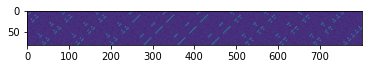

In [8]:

import matplotlib.pyplot as plt
plt.imshow(pulled_distribution_results['xy_hat'][:,:800])

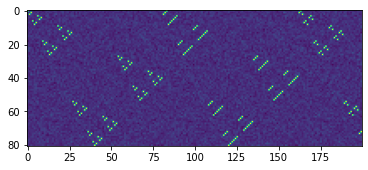

In [9]:
plt.imshow(pulled_distribution_results['xy_div_xyind_hat'][:,:200])

## d_model = 3

In [5]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from trainmodule import ContrastiveTrainModule

args.

trainer = pl.Trainer(
    gpus=[1],
    min_epochs=1, max_epochs=1, 
    precision=32, 
    log_gpu_memory='all',
    weights_summary = 'full',
    gradient_clip_val=0.0,
)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [ ]:
Module = ContrastiveTrainModule
gt = main.gen_full_matrix(hparams)
trainmodule =  Module(hparams, gt_distributions=gt)
checkpoint_PATH = '?'
checkpoint = torch.load(checkpoint_PATH, map_location=lambda storage, loc: storage)
trainmodule.load_state_dict(checkpoint['state_dict'])

In [6]:
from dataset import GameTestFullDataset
game_data = main.load_data(args.data_path)
test_loader = DataLoader(
    GameTestFullDataset(
        raw_data=game_data, embedding_by_property=False ,debug=True
    ))
resd3 = trainer.test(model=trainmoduled3, test_dataloaders=test_loader)

---------data----------
num_attributes : 4
num_attr_vals : 3
num_cards_per_query : 2
nest_depth_int : 2
key_support_size : 81
query_support_size : 6561
hold_out : False
train_datapoints length : 6561
val_datapoints length : 6561
train_tokens length : 6561
val_tokens length : 6561
sparsity_estimate : 0.012345679012345678
vocab_size : 19
( : 12
) : 13
NULL : 14
SEP : 15
SOS : 16
EOS : 17
PAD : 18
-----------------------
Testing: 0it [00:00, ?it/s]query
 0 
 [12, 0, 3, 6, 9, 0, 3, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 1 
 [12, 0, 3, 6, 9, 0, 3, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 2 
 [12, 0, 3, 6, 9, 0, 3, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 3 
 [12, 0, 3, 6, 9, 0, 3, 7, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4 
 [12, 0, 3, 6, 9, 0, 3, 7, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 5 
 [12, 0, 3, 6, 9, 0, 3, 7, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 6 
 [12, 0, 3, 6, 9, 0, 3, 8, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 7 
 [12, 0, 3, 6, 9, 0, 3, 8, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 8 
 [1

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if part == '(':
/app/Contrastive-Learning-Benchmarking/SecondPass-CardGame-experiments/dataraw_sampling.py:96: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif part == ')':


query
 19 
 [12, 0, 3, 6, 9, 0, 5, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 20 
 [12, 0, 3, 6, 9, 0, 5, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 21 
 [12, 0, 3, 6, 9, 0, 5, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 22 
 [12, 0, 3, 6, 9, 0, 5, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 23 
 [12, 0, 3, 6, 9, 0, 5, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 24 
 [12, 0, 3, 6, 9, 0, 5, 8, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 25 
 [12, 0, 3, 6, 9, 0, 5, 8, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 26 
 [12, 0, 3, 6, 9, 0, 5, 8, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 27 
 [12, 0, 3, 6, 9, 1, 3, 6, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 28 
 [12, 0, 3, 6, 9, 1, 3, 6, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 29 
 [12, 0, 3, 6, 9, 1, 3, 6, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 30 
 [12, 0, 3, 6, 9, 1, 3, 7, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 31 
 [12, 0, 3, 6, 9, 1, 3, 7, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 32 
 [12, 0, 3, 6, 9, 1, 3, 7, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 33 
 [12, 0, 3, 6, 9,

 [1, 3, 7, 11]
query
 142 
 [12, 0, 3, 6, 10, 2, 3, 8, 10, 13]
key
 31 
 [1, 3, 7, 10]
Testing:   2%|▏         | 143/6561 [00:00<00:24, 262.78it/s]query
 143 
 [12, 0, 3, 6, 10, 2, 3, 8, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 144 
 [12, 0, 3, 6, 10, 2, 4, 6, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 145 
 [12, 0, 3, 6, 10, 2, 4, 6, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 146 
 [12, 0, 3, 6, 10, 2, 4, 6, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 147 
 [12, 0, 3, 6, 10, 2, 4, 7, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 148 
 [12, 0, 3, 6, 10, 2, 4, 7, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 149 
 [12, 0, 3, 6, 10, 2, 4, 7, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 150 
 [12, 0, 3, 6, 10, 2, 4, 8, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 151 
 [12, 0, 3, 6, 10, 2, 4, 8, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 152 
 [12, 0, 3, 6, 10, 2, 4, 8, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 153 
 [12, 0, 3, 6, 10, 2, 5, 6, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 154 
 [12, 0, 3, 6, 10, 2, 5, 6, 10, 13]
key
 37 
 [1, 4, 6, 1

 [12, 0, 3, 7, 9, 0, 5, 7, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 267 
 [12, 0, 3, 7, 9, 0, 5, 8, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 268 
 [12, 0, 3, 7, 9, 0, 5, 8, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 269 
 [12, 0, 3, 7, 9, 0, 5, 8, 11, 13]
key
 10 
 [0, 4, 6, 10]
Testing:   4%|▍         | 270/6561 [00:00<00:21, 297.34it/s]query
 270 
 [12, 0, 3, 7, 9, 1, 3, 6, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 271 
 [12, 0, 3, 7, 9, 1, 3, 6, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 272 
 [12, 0, 3, 7, 9, 1, 3, 6, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 273 
 [12, 0, 3, 7, 9, 1, 3, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 274 
 [12, 0, 3, 7, 9, 1, 3, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 275 
 [12, 0, 3, 7, 9, 1, 3, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 276 
 [12, 0, 3, 7, 9, 1, 3, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 277 
 [12, 0, 3, 7, 9, 1, 3, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 278 
 [12, 0, 3, 7, 9, 1, 3, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 279 
 [12, 0, 3, 7, 9, 1, 4, 6,

query
 388 
 [12, 0, 3, 7, 10, 2, 4, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 389 
 [12, 0, 3, 7, 10, 2, 4, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 390 
 [12, 0, 3, 7, 10, 2, 4, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 391 
 [12, 0, 3, 7, 10, 2, 4, 7, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 392 
 [12, 0, 3, 7, 10, 2, 4, 7, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 393 
 [12, 0, 3, 7, 10, 2, 4, 8, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 394 
 [12, 0, 3, 7, 10, 2, 4, 8, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 395 
 [12, 0, 3, 7, 10, 2, 4, 8, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 396 
 [12, 0, 3, 7, 10, 2, 5, 6, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 397 
 [12, 0, 3, 7, 10, 2, 5, 6, 10, 13]
key
 43 
 [1, 4, 8, 10]
query
 398 
 [12, 0, 3, 7, 10, 2, 5, 6, 11, 13]
key
 42 
 [1, 4, 8, 9]
query
 399 
 [12, 0, 3, 7, 10, 2, 5, 7, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 400 
 [12, 0, 3, 7, 10, 2, 5, 7, 10, 13]
key
 40 
 [1, 4, 7, 10]
Testing:   6%|▌         | 401/6561 [00:01<00:20, 294.88it/s]query
 401 


 505 
 [12, 0, 3, 8, 9, 0, 5, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 506 
 [12, 0, 3, 8, 9, 0, 5, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 507 
 [12, 0, 3, 8, 9, 0, 5, 7, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 508 
 [12, 0, 3, 8, 9, 0, 5, 7, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 509 
 [12, 0, 3, 8, 9, 0, 5, 7, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 510 
 [12, 0, 3, 8, 9, 0, 5, 8, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 511 
 [12, 0, 3, 8, 9, 0, 5, 8, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 512 
 [12, 0, 3, 8, 9, 0, 5, 8, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 513 
 [12, 0, 3, 8, 9, 1, 3, 6, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 514 
 [12, 0, 3, 8, 9, 1, 3, 6, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 515 
 [12, 0, 3, 8, 9, 1, 3, 6, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 516 
 [12, 0, 3, 8, 9, 1, 3, 7, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 517 
 [12, 0, 3, 8, 9, 1, 3, 7, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 518 
 [12, 0, 3, 8, 9, 1, 3, 7, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 519 
 [12, 0, 

query
 618 
 [12, 0, 3, 8, 10, 1, 5, 8, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 619 
 [12, 0, 3, 8, 10, 1, 5, 8, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 620 
 [12, 0, 3, 8, 10, 1, 5, 8, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 621 
 [12, 0, 3, 8, 10, 2, 3, 6, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 622 
 [12, 0, 3, 8, 10, 2, 3, 6, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 623 
 [12, 0, 3, 8, 10, 2, 3, 6, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 624 
 [12, 0, 3, 8, 10, 2, 3, 7, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 625 
 [12, 0, 3, 8, 10, 2, 3, 7, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 626 
 [12, 0, 3, 8, 10, 2, 3, 7, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 627 
 [12, 0, 3, 8, 10, 2, 3, 8, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 628 
 [12, 0, 3, 8, 10, 2, 3, 8, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 629 
 [12, 0, 3, 8, 10, 2, 3, 8, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 630 
 [12, 0, 3, 8, 10, 2, 4, 6, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 631 
 [12, 0, 3, 8, 10, 2, 4, 6, 10, 13]
key
 49 
 [1, 5, 7, 10]
q

 [12, 0, 4, 6, 9, 0, 3, 6, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 731 
 [12, 0, 4, 6, 9, 0, 3, 6, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 732 
 [12, 0, 4, 6, 9, 0, 3, 7, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 733 
 [12, 0, 4, 6, 9, 0, 3, 7, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 734 
 [12, 0, 4, 6, 9, 0, 3, 7, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 735 
 [12, 0, 4, 6, 9, 0, 3, 8, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 736 
 [12, 0, 4, 6, 9, 0, 3, 8, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 737 
 [12, 0, 4, 6, 9, 0, 3, 8, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 738 
 [12, 0, 4, 6, 9, 0, 4, 6, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 739 
 [12, 0, 4, 6, 9, 0, 4, 6, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 740 
 [12, 0, 4, 6, 9, 0, 4, 6, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 741 
 [12, 0, 4, 6, 9, 0, 4, 7, 9, 13]
key
 15 
 [0, 4, 8, 9]
query
 742 
 [12, 0, 4, 6, 9, 0, 4, 7, 10, 13]
key
 17 
 [0, 4, 8, 11]
query
 743 
 [12, 0, 4, 6, 9, 0, 4, 7, 11, 13]
key
 16 
 [0, 4, 8, 10]
query
 744 
 [12, 0, 4, 6, 

 843 
 [12, 0, 4, 6, 10, 1, 3, 8, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 844 
 [12, 0, 4, 6, 10, 1, 3, 8, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 845 
 [12, 0, 4, 6, 10, 1, 3, 8, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 846 
 [12, 0, 4, 6, 10, 1, 4, 6, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 847 
 [12, 0, 4, 6, 10, 1, 4, 6, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 848 
 [12, 0, 4, 6, 10, 1, 4, 6, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 849 
 [12, 0, 4, 6, 10, 1, 4, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 850 
 [12, 0, 4, 6, 10, 1, 4, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 851 
 [12, 0, 4, 6, 10, 1, 4, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 852 
 [12, 0, 4, 6, 10, 1, 4, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 853 
 [12, 0, 4, 6, 10, 1, 4, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 854 
 [12, 0, 4, 6, 10, 1, 4, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 855 
 [12, 0, 4, 6, 10, 1, 5, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 856 
 [12, 0, 4, 6, 10, 1, 5, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 

 955 
 [12, 0, 4, 6, 11, 2, 4, 6, 10, 13]
key
 36 
 [1, 4, 6, 9]
query
 956 
 [12, 0, 4, 6, 11, 2, 4, 6, 11, 13]
key
 38 
 [1, 4, 6, 11]
query
 957 
 [12, 0, 4, 6, 11, 2, 4, 7, 9, 13]
key
 43 
 [1, 4, 8, 10]
query
 958 
 [12, 0, 4, 6, 11, 2, 4, 7, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 959 
 [12, 0, 4, 6, 11, 2, 4, 7, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 960 
 [12, 0, 4, 6, 11, 2, 4, 8, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 961 
 [12, 0, 4, 6, 11, 2, 4, 8, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 962 
 [12, 0, 4, 6, 11, 2, 4, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 963 
 [12, 0, 4, 6, 11, 2, 5, 6, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 964 
 [12, 0, 4, 6, 11, 2, 5, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 965 
 [12, 0, 4, 6, 11, 2, 5, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 966 
 [12, 0, 4, 6, 11, 2, 5, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 967 
 [12, 0, 4, 6, 11, 2, 5, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 968 
 [12, 0, 4, 6, 11, 2, 5, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 

 12 
 [0, 4, 7, 9]
query
 1068 
 [12, 0, 4, 7, 10, 0, 4, 8, 9, 13]
key
 11 
 [0, 4, 6, 11]
query
 1069 
 [12, 0, 4, 7, 10, 0, 4, 8, 10, 13]
key
 10 
 [0, 4, 6, 10]
query
 1070 
 [12, 0, 4, 7, 10, 0, 4, 8, 11, 13]
key
 9 
 [0, 4, 6, 9]
query
 1071 
 [12, 0, 4, 7, 10, 0, 5, 6, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 1072 
 [12, 0, 4, 7, 10, 0, 5, 6, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 1073 
 [12, 0, 4, 7, 10, 0, 5, 6, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 1074 
 [12, 0, 4, 7, 10, 0, 5, 7, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 1075 
 [12, 0, 4, 7, 10, 0, 5, 7, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 1076 
 [12, 0, 4, 7, 10, 0, 5, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 1077 
 [12, 0, 4, 7, 10, 0, 5, 8, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 1078 
 [12, 0, 4, 7, 10, 0, 5, 8, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 1079 
 [12, 0, 4, 7, 10, 0, 5, 8, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 1080 
 [12, 0, 4, 7, 10, 1, 3, 6, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 1081 
 [12, 0, 4, 7, 10, 1, 3, 6, 10, 13]
ke

 [12, 0, 4, 7, 11, 1, 4, 8, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 1179 
 [12, 0, 4, 7, 11, 1, 5, 6, 9, 13]
key
 61 
 [2, 3, 8, 10]
query
 1180 
 [12, 0, 4, 7, 11, 1, 5, 6, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 1181 
 [12, 0, 4, 7, 11, 1, 5, 6, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 1182 
 [12, 0, 4, 7, 11, 1, 5, 7, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 1183 
 [12, 0, 4, 7, 11, 1, 5, 7, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 1184 
 [12, 0, 4, 7, 11, 1, 5, 7, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 1185 
 [12, 0, 4, 7, 11, 1, 5, 8, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 1186 
 [12, 0, 4, 7, 11, 1, 5, 8, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 1187 
 [12, 0, 4, 7, 11, 1, 5, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 1188 
 [12, 0, 4, 7, 11, 2, 3, 6, 9, 13]
key
 52 
 [1, 5, 8, 10]
Testing:  18%|█▊        | 1189/6561 [00:04<00:20, 259.74it/s]query
 1189 
 [12, 0, 4, 7, 11, 2, 3, 6, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 1190 
 [12, 0, 4, 7, 11, 2, 3, 6, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 1191

 1291 
 [12, 0, 4, 8, 9, 2, 5, 7, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 1292 
 [12, 0, 4, 8, 9, 2, 5, 7, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 1293 
 [12, 0, 4, 8, 9, 2, 5, 8, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 1294 
 [12, 0, 4, 8, 9, 2, 5, 8, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 1295 
 [12, 0, 4, 8, 9, 2, 5, 8, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 1296 
 [12, 0, 4, 8, 10, 0, 3, 6, 9, 13]
key
 23 
 [0, 5, 7, 11]
Testing:  20%|█▉        | 1297/6561 [00:04<00:20, 260.61it/s]query
 1297 
 [12, 0, 4, 8, 10, 0, 3, 6, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 1298 
 [12, 0, 4, 8, 10, 0, 3, 6, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 1299 
 [12, 0, 4, 8, 10, 0, 3, 7, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 1300 
 [12, 0, 4, 8, 10, 0, 3, 7, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 1301 
 [12, 0, 4, 8, 10, 0, 3, 7, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 1302 
 [12, 0, 4, 8, 10, 0, 3, 8, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 1303 
 [12, 0, 4, 8, 10, 0, 3, 8, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 1

 [12, 0, 4, 8, 11, 0, 5, 8, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 1402 
 [12, 0, 4, 8, 11, 0, 5, 8, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 1403 
 [12, 0, 4, 8, 11, 0, 5, 8, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 1404 
 [12, 0, 4, 8, 11, 1, 3, 6, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 1405 
 [12, 0, 4, 8, 11, 1, 3, 6, 10, 13]
key
 75 
 [2, 5, 7, 9]
Testing:  21%|██▏       | 1406/6561 [00:05<00:20, 255.52it/s]query
 1406 
 [12, 0, 4, 8, 11, 1, 3, 6, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 1407 
 [12, 0, 4, 8, 11, 1, 3, 7, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 1408 
 [12, 0, 4, 8, 11, 1, 3, 7, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 1409 
 [12, 0, 4, 8, 11, 1, 3, 7, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 1410 
 [12, 0, 4, 8, 11, 1, 3, 8, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 1411 
 [12, 0, 4, 8, 11, 1, 3, 8, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 1412 
 [12, 0, 4, 8, 11, 1, 3, 8, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 1413 
 [12, 0, 4, 8, 11, 1, 4, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 1414 
 [

 1512 
 [12, 0, 5, 6, 9, 2, 3, 6, 9, 13]
key
 36 
 [1, 4, 6, 9]
query
 1513 
 [12, 0, 5, 6, 9, 2, 3, 6, 10, 13]
key
 38 
 [1, 4, 6, 11]
query
 1514 
 [12, 0, 5, 6, 9, 2, 3, 6, 11, 13]
key
 37 
 [1, 4, 6, 10]
query
 1515 
 [12, 0, 5, 6, 9, 2, 3, 7, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 1516 
 [12, 0, 5, 6, 9, 2, 3, 7, 10, 13]
key
 44 
 [1, 4, 8, 11]
query
 1517 
 [12, 0, 5, 6, 9, 2, 3, 7, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 1518 
 [12, 0, 5, 6, 9, 2, 3, 8, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 1519 
 [12, 0, 5, 6, 9, 2, 3, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 1520 
 [12, 0, 5, 6, 9, 2, 3, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 1521 
 [12, 0, 5, 6, 9, 2, 4, 6, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 1522 
 [12, 0, 5, 6, 9, 2, 4, 6, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 1523 
 [12, 0, 5, 6, 9, 2, 4, 6, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 1524 
 [12, 0, 5, 6, 9, 2, 4, 7, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 1525 
 [12, 0, 5, 6, 9, 2, 4, 7, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 1

key
 11 
 [0, 4, 6, 11]
query
 1623 
 [12, 0, 5, 6, 11, 0, 3, 7, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 1624 
 [12, 0, 5, 6, 11, 0, 3, 7, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 1625 
 [12, 0, 5, 6, 11, 0, 3, 7, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 1626 
 [12, 0, 5, 6, 11, 0, 3, 8, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 1627 
 [12, 0, 5, 6, 11, 0, 3, 8, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 1628 
 [12, 0, 5, 6, 11, 0, 3, 8, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 1629 
 [12, 0, 5, 6, 11, 0, 4, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 1630 
 [12, 0, 5, 6, 11, 0, 4, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 1631 
 [12, 0, 5, 6, 11, 0, 4, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 1632 
 [12, 0, 5, 6, 11, 0, 4, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 1633 
 [12, 0, 5, 6, 11, 0, 4, 7, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 1634 
 [12, 0, 5, 6, 11, 0, 4, 7, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 1635 
 [12, 0, 5, 6, 11, 0, 4, 8, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 1636 
 [12, 0, 5, 6, 11, 0, 4, 8, 10

 1734 
 [12, 0, 5, 7, 9, 1, 3, 8, 9, 13]
key
 63 
 [2, 4, 6, 9]
query
 1735 
 [12, 0, 5, 7, 9, 1, 3, 8, 10, 13]
key
 65 
 [2, 4, 6, 11]
query
 1736 
 [12, 0, 5, 7, 9, 1, 3, 8, 11, 13]
key
 64 
 [2, 4, 6, 10]
query
 1737 
 [12, 0, 5, 7, 9, 1, 4, 6, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 1738 
 [12, 0, 5, 7, 9, 1, 4, 6, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 1739 
 [12, 0, 5, 7, 9, 1, 4, 6, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 1740 
 [12, 0, 5, 7, 9, 1, 4, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 1741 
 [12, 0, 5, 7, 9, 1, 4, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 1742 
 [12, 0, 5, 7, 9, 1, 4, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 1743 
 [12, 0, 5, 7, 9, 1, 4, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 1744 
 [12, 0, 5, 7, 9, 1, 4, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 1745 
 [12, 0, 5, 7, 9, 1, 4, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
Testing:  27%|██▋       | 1746/6561 [00:06<00:19, 248.98it/s]query
 1746 
 [12, 0, 5, 7, 9, 1, 5, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 1747 
 [12, 

query
 1845 
 [12, 0, 5, 7, 10, 2, 4, 6, 9, 13]
key
 35 
 [1, 3, 8, 11]
query
 1846 
 [12, 0, 5, 7, 10, 2, 4, 6, 10, 13]
key
 34 
 [1, 3, 8, 10]
Testing:  28%|██▊       | 1847/6561 [00:06<00:19, 243.97it/s]query
 1847 
 [12, 0, 5, 7, 10, 2, 4, 6, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 1848 
 [12, 0, 5, 7, 10, 2, 4, 7, 9, 13]
key
 32 
 [1, 3, 7, 11]
query
 1849 
 [12, 0, 5, 7, 10, 2, 4, 7, 10, 13]
key
 31 
 [1, 3, 7, 10]
query
 1850 
 [12, 0, 5, 7, 10, 2, 4, 7, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 1851 
 [12, 0, 5, 7, 10, 2, 4, 8, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 1852 
 [12, 0, 5, 7, 10, 2, 4, 8, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 1853 
 [12, 0, 5, 7, 10, 2, 4, 8, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 1854 
 [12, 0, 5, 7, 10, 2, 5, 6, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 1855 
 [12, 0, 5, 7, 10, 2, 5, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 1856 
 [12, 0, 5, 7, 10, 2, 5, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 1857 
 [12, 0, 5, 7, 10, 2, 5, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]

 [12, 0, 5, 8, 9, 0, 4, 6, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 1956 
 [12, 0, 5, 8, 9, 0, 4, 7, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 1957 
 [12, 0, 5, 8, 9, 0, 4, 7, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 1958 
 [12, 0, 5, 8, 9, 0, 4, 7, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 1959 
 [12, 0, 5, 8, 9, 0, 4, 8, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 1960 
 [12, 0, 5, 8, 9, 0, 4, 8, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 1961 
 [12, 0, 5, 8, 9, 0, 4, 8, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 1962 
 [12, 0, 5, 8, 9, 0, 5, 6, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 1963 
 [12, 0, 5, 8, 9, 0, 5, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 1964 
 [12, 0, 5, 8, 9, 0, 5, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 1965 
 [12, 0, 5, 8, 9, 0, 5, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 1966 
 [12, 0, 5, 8, 9, 0, 5, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 1967 
 [12, 0, 5, 8, 9, 0, 5, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 1968 
 [12, 0, 5, 8, 9, 0, 5, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 1969 
 [12, 0, 

 62 
 [2, 3, 8, 11]
query
 2068 
 [12, 0, 5, 8, 10, 1, 4, 8, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 2069 
 [12, 0, 5, 8, 10, 1, 4, 8, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 2070 
 [12, 0, 5, 8, 10, 1, 5, 6, 9, 13]
key
 77 
 [2, 5, 7, 11]
query
 2071 
 [12, 0, 5, 8, 10, 1, 5, 6, 10, 13]
key
 76 
 [2, 5, 7, 10]
query
 2072 
 [12, 0, 5, 8, 10, 1, 5, 6, 11, 13]
key
 75 
 [2, 5, 7, 9]
query
 2073 
 [12, 0, 5, 8, 10, 1, 5, 7, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 2074 
 [12, 0, 5, 8, 10, 1, 5, 7, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 2075 
 [12, 0, 5, 8, 10, 1, 5, 7, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 2076 
 [12, 0, 5, 8, 10, 1, 5, 8, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 2077 
 [12, 0, 5, 8, 10, 1, 5, 8, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 2078 
 [12, 0, 5, 8, 10, 1, 5, 8, 11, 13]
key
 78 
 [2, 5, 8, 9]
Testing:  32%|███▏      | 2079/6561 [00:07<00:18, 236.23it/s]query
 2079 
 [12, 0, 5, 8, 10, 2, 3, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 2080 
 [12, 0, 5, 8, 10, 2, 3, 6, 10, 13]
ke

 2177 
 [12, 0, 5, 8, 11, 2, 4, 8, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 2178 
 [12, 0, 5, 8, 11, 2, 5, 6, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 2179 
 [12, 0, 5, 8, 11, 2, 5, 6, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 2180 
 [12, 0, 5, 8, 11, 2, 5, 6, 11, 13]
key
 50 
 [1, 5, 7, 11]
query
 2181 
 [12, 0, 5, 8, 11, 2, 5, 7, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 2182 
 [12, 0, 5, 8, 11, 2, 5, 7, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 2183 
 [12, 0, 5, 8, 11, 2, 5, 7, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 2184 
 [12, 0, 5, 8, 11, 2, 5, 8, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 2185 
 [12, 0, 5, 8, 11, 2, 5, 8, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 2186 
 [12, 0, 5, 8, 11, 2, 5, 8, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 2187 
 [12, 1, 3, 6, 9, 0, 3, 6, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 2188 
 [12, 1, 3, 6, 9, 0, 3, 6, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 2189 
 [12, 1, 3, 6, 9, 0, 3, 6, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 2190 
 [12, 1, 3, 6, 9, 0, 3, 7, 9, 13]
key
 60 
 [2, 3, 8, 9

key
 63 
 [2, 4, 6, 9]
query
 2289 
 [12, 1, 3, 6, 10, 0, 5, 7, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 2290 
 [12, 1, 3, 6, 10, 0, 5, 7, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 2291 
 [12, 1, 3, 6, 10, 0, 5, 7, 11, 13]
key
 69 
 [2, 4, 8, 9]
query
 2292 
 [12, 1, 3, 6, 10, 0, 5, 8, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 2293 
 [12, 1, 3, 6, 10, 0, 5, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 2294 
 [12, 1, 3, 6, 10, 0, 5, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 2295 
 [12, 1, 3, 6, 10, 1, 3, 6, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 2296 
 [12, 1, 3, 6, 10, 1, 3, 6, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 2297 
 [12, 1, 3, 6, 10, 1, 3, 6, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 2298 
 [12, 1, 3, 6, 10, 1, 3, 7, 9, 13]
key
 35 
 [1, 3, 8, 11]
Testing:  35%|███▌      | 2299/6561 [00:08<00:17, 237.52it/s]query
 2299 
 [12, 1, 3, 6, 10, 1, 3, 7, 10, 13]
key
 34 
 [1, 3, 8, 10]
query
 2300 
 [12, 1, 3, 6, 10, 1, 3, 7, 11, 13]
key
 33 
 [1, 3, 8, 9]
query
 2301 
 [12, 1, 3, 6, 10, 1, 3, 8, 9, 13]


Testing:  37%|███▋      | 2398/6561 [00:09<00:17, 240.14it/s]query
 2398 
 [12, 1, 3, 6, 11, 1, 5, 7, 10, 13]
key
 42 
 [1, 4, 8, 9]
query
 2399 
 [12, 1, 3, 6, 11, 1, 5, 7, 11, 13]
key
 44 
 [1, 4, 8, 11]
query
 2400 
 [12, 1, 3, 6, 11, 1, 5, 8, 9, 13]
key
 40 
 [1, 4, 7, 10]
query
 2401 
 [12, 1, 3, 6, 11, 1, 5, 8, 10, 13]
key
 39 
 [1, 4, 7, 9]
query
 2402 
 [12, 1, 3, 6, 11, 1, 5, 8, 11, 13]
key
 41 
 [1, 4, 7, 11]
query
 2403 
 [12, 1, 3, 6, 11, 2, 3, 6, 9, 13]
key
 1 
 [0, 3, 6, 10]
query
 2404 
 [12, 1, 3, 6, 11, 2, 3, 6, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 2405 
 [12, 1, 3, 6, 11, 2, 3, 6, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 2406 
 [12, 1, 3, 6, 11, 2, 3, 7, 9, 13]
key
 7 
 [0, 3, 8, 10]
query
 2407 
 [12, 1, 3, 6, 11, 2, 3, 7, 10, 13]
key
 6 
 [0, 3, 8, 9]
query
 2408 
 [12, 1, 3, 6, 11, 2, 3, 7, 11, 13]
key
 8 
 [0, 3, 8, 11]
query
 2409 
 [12, 1, 3, 6, 11, 2, 3, 8, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 2410 
 [12, 1, 3, 6, 11, 2, 3, 8, 10, 13]
key
 3 
 [0, 3, 7, 9]
query
 

 [12, 1, 3, 7, 9, 2, 5, 8, 10, 13]
key
 11 
 [0, 4, 6, 11]
query
 2510 
 [12, 1, 3, 7, 9, 2, 5, 8, 11, 13]
key
 10 
 [0, 4, 6, 10]
query
 2511 
 [12, 1, 3, 7, 10, 0, 3, 6, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 2512 
 [12, 1, 3, 7, 10, 0, 3, 6, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 2513 
 [12, 1, 3, 7, 10, 0, 3, 6, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 2514 
 [12, 1, 3, 7, 10, 0, 3, 7, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 2515 
 [12, 1, 3, 7, 10, 0, 3, 7, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 2516 
 [12, 1, 3, 7, 10, 0, 3, 7, 11, 13]
key
 57 
 [2, 3, 7, 9]
query
 2517 
 [12, 1, 3, 7, 10, 0, 3, 8, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 2518 
 [12, 1, 3, 7, 10, 0, 3, 8, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 2519 
 [12, 1, 3, 7, 10, 0, 3, 8, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 2520 
 [12, 1, 3, 7, 10, 0, 4, 6, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 2521 
 [12, 1, 3, 7, 10, 0, 4, 6, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 2522 
 [12, 1, 3, 7, 10, 0, 4, 6, 11, 13]
key
 78 
 [2, 5, 8, 9]
q

query
 2621 
 [12, 1, 3, 7, 11, 1, 3, 6, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 2622 
 [12, 1, 3, 7, 11, 1, 3, 7, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 2623 
 [12, 1, 3, 7, 11, 1, 3, 7, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 2624 
 [12, 1, 3, 7, 11, 1, 3, 7, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 2625 
 [12, 1, 3, 7, 11, 1, 3, 8, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 2626 
 [12, 1, 3, 7, 11, 1, 3, 8, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 2627 
 [12, 1, 3, 7, 11, 1, 3, 8, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 2628 
 [12, 1, 3, 7, 11, 1, 4, 6, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 2629 
 [12, 1, 3, 7, 11, 1, 4, 6, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 2630 
 [12, 1, 3, 7, 11, 1, 4, 6, 11, 13]
key
 53 
 [1, 5, 8, 11]
Testing:  40%|████      | 2631/6561 [00:10<00:15, 251.34it/s]query
 2631 
 [12, 1, 3, 7, 11, 1, 4, 7, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 2632 
 [12, 1, 3, 7, 11, 1, 4, 7, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 2633 
 [12, 1, 3, 7, 11, 1, 4, 7, 11, 13]
key
 50 
 [1, 5, 7, 11

Testing:  42%|████▏     | 2734/6561 [00:10<00:15, 240.97it/s]query
 2734 
 [12, 1, 3, 8, 9, 2, 3, 8, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 2735 
 [12, 1, 3, 8, 9, 2, 3, 8, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 2736 
 [12, 1, 3, 8, 9, 2, 4, 6, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 2737 
 [12, 1, 3, 8, 9, 2, 4, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 2738 
 [12, 1, 3, 8, 9, 2, 4, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 2739 
 [12, 1, 3, 8, 9, 2, 4, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 2740 
 [12, 1, 3, 8, 9, 2, 4, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 2741 
 [12, 1, 3, 8, 9, 2, 4, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 2742 
 [12, 1, 3, 8, 9, 2, 4, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 2743 
 [12, 1, 3, 8, 9, 2, 4, 8, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 2744 
 [12, 1, 3, 8, 9, 2, 4, 8, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 2745 
 [12, 1, 3, 8, 9, 2, 5, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 2746 
 [12, 1, 3, 8, 9, 2, 5, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 2747 


query
 2844 
 [12, 1, 3, 8, 11, 0, 4, 6, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 2845 
 [12, 1, 3, 8, 11, 0, 4, 6, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 2846 
 [12, 1, 3, 8, 11, 0, 4, 6, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 2847 
 [12, 1, 3, 8, 11, 0, 4, 7, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 2848 
 [12, 1, 3, 8, 11, 0, 4, 7, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 2849 
 [12, 1, 3, 8, 11, 0, 4, 7, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 2850 
 [12, 1, 3, 8, 11, 0, 4, 8, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 2851 
 [12, 1, 3, 8, 11, 0, 4, 8, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 2852 
 [12, 1, 3, 8, 11, 0, 4, 8, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 2853 
 [12, 1, 3, 8, 11, 0, 5, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 2854 
 [12, 1, 3, 8, 11, 0, 5, 6, 10, 13]
key
 66 
 [2, 4, 7, 9]
query
 2855 
 [12, 1, 3, 8, 11, 0, 5, 6, 11, 13]
key
 68 
 [2, 4, 7, 11]
query
 2856 
 [12, 1, 3, 8, 11, 0, 5, 7, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 2857 
 [12, 1, 3, 8, 11, 0, 5, 7, 10, 13]
key
 63 
 [

 2955 
 [12, 1, 4, 6, 9, 1, 4, 7, 9, 13]
key
 42 
 [1, 4, 8, 9]
query
 2956 
 [12, 1, 4, 6, 9, 1, 4, 7, 10, 13]
key
 44 
 [1, 4, 8, 11]
query
 2957 
 [12, 1, 4, 6, 9, 1, 4, 7, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 2958 
 [12, 1, 4, 6, 9, 1, 4, 8, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 2959 
 [12, 1, 4, 6, 9, 1, 4, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 2960 
 [12, 1, 4, 6, 9, 1, 4, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 2961 
 [12, 1, 4, 6, 9, 1, 5, 6, 9, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  45%|████▌     | 2962/6561 [00:11<00:14, 241.09it/s]query
 2962 
 [12, 1, 4, 6, 9, 1, 5, 6, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 2963 
 [12, 1, 4, 6, 9, 1, 5, 6, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 2964 
 [12, 1, 4, 6, 9, 1, 5, 7, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 2965 
 [12, 1, 4, 6, 9, 1, 5, 7, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 2966 
 [12, 1, 4, 6, 9, 1, 5, 7, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 2967 
 [12, 1, 4, 6, 9, 1, 5, 8, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 2968 
 [12, 

query
 3066 
 [12, 1, 4, 6, 10, 2, 4, 8, 9, 13]
key
 14 
 [0, 4, 7, 11]
query
 3067 
 [12, 1, 4, 6, 10, 2, 4, 8, 10, 13]
key
 13 
 [0, 4, 7, 10]
query
 3068 
 [12, 1, 4, 6, 10, 2, 4, 8, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 3069 
 [12, 1, 4, 6, 10, 2, 5, 6, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 3070 
 [12, 1, 4, 6, 10, 2, 5, 6, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 3071 
 [12, 1, 4, 6, 10, 2, 5, 6, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 3072 
 [12, 1, 4, 6, 10, 2, 5, 7, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 3073 
 [12, 1, 4, 6, 10, 2, 5, 7, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 3074 
 [12, 1, 4, 6, 10, 2, 5, 7, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 3075 
 [12, 1, 4, 6, 10, 2, 5, 8, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 3076 
 [12, 1, 4, 6, 10, 2, 5, 8, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 3077 
 [12, 1, 4, 6, 10, 2, 5, 8, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 3078 
 [12, 1, 4, 6, 11, 0, 3, 6, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 3079 
 [12, 1, 4, 6, 11, 0, 3, 6, 10, 13]
key
 72 
 [2, 5, 6, 

 3178 
 [12, 1, 4, 7, 9, 0, 5, 6, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 3179 
 [12, 1, 4, 7, 9, 0, 5, 6, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 3180 
 [12, 1, 4, 7, 9, 0, 5, 7, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 3181 
 [12, 1, 4, 7, 9, 0, 5, 7, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 3182 
 [12, 1, 4, 7, 9, 0, 5, 7, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 3183 
 [12, 1, 4, 7, 9, 0, 5, 8, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 3184 
 [12, 1, 4, 7, 9, 0, 5, 8, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 3185 
 [12, 1, 4, 7, 9, 0, 5, 8, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 3186 
 [12, 1, 4, 7, 9, 1, 3, 6, 9, 13]
key
 51 
 [1, 5, 8, 9]
query
 3187 
 [12, 1, 4, 7, 9, 1, 3, 6, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 3188 
 [12, 1, 4, 7, 9, 1, 3, 6, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 3189 
 [12, 1, 4, 7, 9, 1, 3, 7, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 3190 
 [12, 1, 4, 7, 9, 1, 3, 7, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 3191 
 [12, 1, 4, 7, 9, 1, 3, 7, 11, 13]
key
 49 
 [1, 5, 7, 10]
query


 3290 
 [12, 1, 4, 7, 10, 1, 5, 7, 11, 13]
key
 30 
 [1, 3, 7, 9]
query
 3291 
 [12, 1, 4, 7, 10, 1, 5, 8, 9, 13]
key
 29 
 [1, 3, 6, 11]
query
 3292 
 [12, 1, 4, 7, 10, 1, 5, 8, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 3293 
 [12, 1, 4, 7, 10, 1, 5, 8, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 3294 
 [12, 1, 4, 7, 10, 2, 3, 6, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 3295 
 [12, 1, 4, 7, 10, 2, 3, 6, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 3296 
 [12, 1, 4, 7, 10, 2, 3, 6, 11, 13]
key
 24 
 [0, 5, 8, 9]
Testing:  50%|█████     | 3297/6561 [00:12<00:12, 252.13it/s]query
 3297 
 [12, 1, 4, 7, 10, 2, 3, 7, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 3298 
 [12, 1, 4, 7, 10, 2, 3, 7, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 3299 
 [12, 1, 4, 7, 10, 2, 3, 7, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 3300 
 [12, 1, 4, 7, 10, 2, 3, 8, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 3301 
 [12, 1, 4, 7, 10, 2, 3, 8, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 3302 
 [12, 1, 4, 7, 10, 2, 3, 8, 11, 13]
key
 18 
 [0, 5, 6, 9]
query

 3400 
 [12, 1, 4, 7, 11, 2, 5, 8, 10, 13]
key
 0 
 [0, 3, 6, 9]
query
 3401 
 [12, 1, 4, 7, 11, 2, 5, 8, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 3402 
 [12, 1, 4, 8, 9, 0, 3, 6, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 3403 
 [12, 1, 4, 8, 9, 0, 3, 6, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 3404 
 [12, 1, 4, 8, 9, 0, 3, 6, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 3405 
 [12, 1, 4, 8, 9, 0, 3, 7, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 3406 
 [12, 1, 4, 8, 9, 0, 3, 7, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 3407 
 [12, 1, 4, 8, 9, 0, 3, 7, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 3408 
 [12, 1, 4, 8, 9, 0, 3, 8, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 3409 
 [12, 1, 4, 8, 9, 0, 3, 8, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 3410 
 [12, 1, 4, 8, 9, 0, 3, 8, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 3411 
 [12, 1, 4, 8, 9, 0, 4, 6, 9, 13]
key
 66 
 [2, 4, 7, 9]
query
 3412 
 [12, 1, 4, 8, 9, 0, 4, 6, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 3413 
 [12, 1, 4, 8, 9, 0, 4, 6, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 

query
 3512 
 [12, 1, 4, 8, 10, 1, 3, 6, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 3513 
 [12, 1, 4, 8, 10, 1, 3, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 3514 
 [12, 1, 4, 8, 10, 1, 3, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 3515 
 [12, 1, 4, 8, 10, 1, 3, 7, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 3516 
 [12, 1, 4, 8, 10, 1, 3, 8, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 3517 
 [12, 1, 4, 8, 10, 1, 3, 8, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 3518 
 [12, 1, 4, 8, 10, 1, 3, 8, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 3519 
 [12, 1, 4, 8, 10, 1, 4, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 3520 
 [12, 1, 4, 8, 10, 1, 4, 6, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 3521 
 [12, 1, 4, 8, 10, 1, 4, 6, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 3522 
 [12, 1, 4, 8, 10, 1, 4, 7, 9, 13]
key
 38 
 [1, 4, 6, 11]
Testing:  54%|█████▎    | 3523/6561 [00:13<00:12, 234.50it/s]query
 3523 
 [12, 1, 4, 8, 10, 1, 4, 7, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 3524 
 [12, 1, 4, 8, 10, 1, 4, 7, 11, 13]
key
 36 
 [1, 4, 6, 9]

Testing:  55%|█████▌    | 3622/6561 [00:14<00:12, 237.50it/s]query
 3622 
 [12, 1, 4, 8, 11, 2, 3, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 3623 
 [12, 1, 4, 8, 11, 2, 3, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 3624 
 [12, 1, 4, 8, 11, 2, 3, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 3625 
 [12, 1, 4, 8, 11, 2, 3, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 3626 
 [12, 1, 4, 8, 11, 2, 3, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 3627 
 [12, 1, 4, 8, 11, 2, 4, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 3628 
 [12, 1, 4, 8, 11, 2, 4, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 3629 
 [12, 1, 4, 8, 11, 2, 4, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 3630 
 [12, 1, 4, 8, 11, 2, 4, 7, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 3631 
 [12, 1, 4, 8, 11, 2, 4, 7, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 3632 
 [12, 1, 4, 8, 11, 2, 4, 7, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 3633 
 [12, 1, 4, 8, 11, 2, 4, 8, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 3634 
 [12, 1, 4, 8, 11, 2, 4, 8, 10, 13]
key
 15 
 [0, 4, 8, 9]


 3733 
 [12, 1, 5, 6, 10, 0, 3, 8, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 3734 
 [12, 1, 5, 6, 10, 0, 3, 8, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 3735 
 [12, 1, 5, 6, 10, 0, 4, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 3736 
 [12, 1, 5, 6, 10, 0, 4, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 3737 
 [12, 1, 5, 6, 10, 0, 4, 6, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 3738 
 [12, 1, 5, 6, 10, 0, 4, 7, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 3739 
 [12, 1, 5, 6, 10, 0, 4, 7, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 3740 
 [12, 1, 5, 6, 10, 0, 4, 7, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 3741 
 [12, 1, 5, 6, 10, 0, 4, 8, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 3742 
 [12, 1, 5, 6, 10, 0, 4, 8, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 3743 
 [12, 1, 5, 6, 10, 0, 4, 8, 11, 13]
key
 57 
 [2, 3, 7, 9]
query
 3744 
 [12, 1, 5, 6, 10, 0, 5, 6, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 3745 
 [12, 1, 5, 6, 10, 0, 5, 6, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 3746 
 [12, 1, 5, 6, 10, 0, 5, 6, 11, 13]
key
 72 
 [2, 5,

 [12, 1, 5, 6, 11, 1, 4, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
query
 3845 
 [12, 1, 5, 6, 11, 1, 4, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 3846 
 [12, 1, 5, 6, 11, 1, 4, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 3847 
 [12, 1, 5, 6, 11, 1, 4, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 3848 
 [12, 1, 5, 6, 11, 1, 4, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 3849 
 [12, 1, 5, 6, 11, 1, 4, 8, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 3850 
 [12, 1, 5, 6, 11, 1, 4, 8, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 3851 
 [12, 1, 5, 6, 11, 1, 4, 8, 11, 13]
key
 32 
 [1, 3, 7, 11]
Testing:  59%|█████▊    | 3852/6561 [00:15<00:11, 240.89it/s]query
 3852 
 [12, 1, 5, 6, 11, 1, 5, 6, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 3853 
 [12, 1, 5, 6, 11, 1, 5, 6, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 3854 
 [12, 1, 5, 6, 11, 1, 5, 6, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 3855 
 [12, 1, 5, 6, 11, 1, 5, 7, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 3856 
 [12, 1, 5, 6, 11, 1, 5, 7, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 3857 

key
 3 
 [0, 3, 7, 9]
query
 3955 
 [12, 1, 5, 7, 9, 2, 4, 7, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 3956 
 [12, 1, 5, 7, 9, 2, 4, 7, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 3957 
 [12, 1, 5, 7, 9, 2, 4, 8, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 3958 
 [12, 1, 5, 7, 9, 2, 4, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 3959 
 [12, 1, 5, 7, 9, 2, 4, 8, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 3960 
 [12, 1, 5, 7, 9, 2, 5, 6, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 3961 
 [12, 1, 5, 7, 9, 2, 5, 6, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 3962 
 [12, 1, 5, 7, 9, 2, 5, 6, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 3963 
 [12, 1, 5, 7, 9, 2, 5, 7, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 3964 
 [12, 1, 5, 7, 9, 2, 5, 7, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 3965 
 [12, 1, 5, 7, 9, 2, 5, 7, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 3966 
 [12, 1, 5, 7, 9, 2, 5, 8, 9, 13]
key
 18 
 [0, 5, 6, 9]
query
 3967 
 [12, 1, 5, 7, 9, 2, 5, 8, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 3968 
 [12, 1, 5, 7, 9, 2, 5, 8, 11, 13]
key
 19

 4065 
 [12, 1, 5, 7, 11, 0, 4, 8, 9, 13]
key
 55 
 [2, 3, 6, 10]
query
 4066 
 [12, 1, 5, 7, 11, 0, 4, 8, 10, 13]
key
 54 
 [2, 3, 6, 9]
query
 4067 
 [12, 1, 5, 7, 11, 0, 4, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 4068 
 [12, 1, 5, 7, 11, 0, 5, 6, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 4069 
 [12, 1, 5, 7, 11, 0, 5, 6, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 4070 
 [12, 1, 5, 7, 11, 0, 5, 6, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 4071 
 [12, 1, 5, 7, 11, 0, 5, 7, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 4072 
 [12, 1, 5, 7, 11, 0, 5, 7, 10, 13]
key
 75 
 [2, 5, 7, 9]
Testing:  62%|██████▏   | 4073/6561 [00:16<00:10, 243.95it/s]query
 4073 
 [12, 1, 5, 7, 11, 0, 5, 7, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 4074 
 [12, 1, 5, 7, 11, 0, 5, 8, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 4075 
 [12, 1, 5, 7, 11, 0, 5, 8, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 4076 
 [12, 1, 5, 7, 11, 0, 5, 8, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 4077 
 [12, 1, 5, 7, 11, 1, 3, 6, 9, 13]
key
 43 
 [1, 4, 8, 10]
query

 34 
 [1, 3, 8, 10]
query
 4176 
 [12, 1, 5, 8, 9, 1, 5, 6, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 4177 
 [12, 1, 5, 8, 9, 1, 5, 6, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 4178 
 [12, 1, 5, 8, 9, 1, 5, 6, 11, 13]
key
 49 
 [1, 5, 7, 10]
Testing:  64%|██████▎   | 4179/6561 [00:16<00:09, 244.18it/s]query
 4179 
 [12, 1, 5, 8, 9, 1, 5, 7, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 4180 
 [12, 1, 5, 8, 9, 1, 5, 7, 10, 13]
key
 47 
 [1, 5, 6, 11]
query
 4181 
 [12, 1, 5, 8, 9, 1, 5, 7, 11, 13]
key
 46 
 [1, 5, 6, 10]
query
 4182 
 [12, 1, 5, 8, 9, 1, 5, 8, 9, 13]
key
 51 
 [1, 5, 8, 9]
query
 4183 
 [12, 1, 5, 8, 9, 1, 5, 8, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 4184 
 [12, 1, 5, 8, 9, 1, 5, 8, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 4185 
 [12, 1, 5, 8, 9, 2, 3, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 4186 
 [12, 1, 5, 8, 9, 2, 3, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 4187 
 [12, 1, 5, 8, 9, 2, 3, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 4188 
 [12, 1, 5, 8, 9, 2, 3, 7, 9, 13]
key
 9 
 [0, 4, 

 4286 
 [12, 1, 5, 8, 10, 2, 5, 6, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 4287 
 [12, 1, 5, 8, 10, 2, 5, 7, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 4288 
 [12, 1, 5, 8, 10, 2, 5, 7, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 4289 
 [12, 1, 5, 8, 10, 2, 5, 7, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 4290 
 [12, 1, 5, 8, 10, 2, 5, 8, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 4291 
 [12, 1, 5, 8, 10, 2, 5, 8, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 4292 
 [12, 1, 5, 8, 10, 2, 5, 8, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 4293 
 [12, 1, 5, 8, 11, 0, 3, 6, 9, 13]
key
 67 
 [2, 4, 7, 10]
query
 4294 
 [12, 1, 5, 8, 11, 0, 3, 6, 10, 13]
key
 66 
 [2, 4, 7, 9]
query
 4295 
 [12, 1, 5, 8, 11, 0, 3, 6, 11, 13]
key
 68 
 [2, 4, 7, 11]
query
 4296 
 [12, 1, 5, 8, 11, 0, 3, 7, 9, 13]
key
 64 
 [2, 4, 6, 10]
query
 4297 
 [12, 1, 5, 8, 11, 0, 3, 7, 10, 13]
key
 63 
 [2, 4, 6, 9]
query
 4298 
 [12, 1, 5, 8, 11, 0, 3, 7, 11, 13]
key
 65 
 [2, 4, 6, 11]
query
 4299 
 [12, 1, 5, 8, 11, 0, 3, 8, 9, 13]
key
 70 
 [2, 4, 8

 4397 
 [12, 2, 3, 6, 9, 0, 5, 7, 11, 13]
key
 43 
 [1, 4, 8, 10]
query
 4398 
 [12, 2, 3, 6, 9, 0, 5, 8, 9, 13]
key
 39 
 [1, 4, 7, 9]
query
 4399 
 [12, 2, 3, 6, 9, 0, 5, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 4400 
 [12, 2, 3, 6, 9, 0, 5, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 4401 
 [12, 2, 3, 6, 9, 1, 3, 6, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 4402 
 [12, 2, 3, 6, 9, 1, 3, 6, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 4403 
 [12, 2, 3, 6, 9, 1, 3, 6, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 4404 
 [12, 2, 3, 6, 9, 1, 3, 7, 9, 13]
key
 6 
 [0, 3, 8, 9]
query
 4405 
 [12, 2, 3, 6, 9, 1, 3, 7, 10, 13]
key
 8 
 [0, 3, 8, 11]
query
 4406 
 [12, 2, 3, 6, 9, 1, 3, 7, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 4407 
 [12, 2, 3, 6, 9, 1, 3, 8, 9, 13]
key
 3 
 [0, 3, 7, 9]
Testing:  67%|██████▋   | 4408/6561 [00:17<00:08, 246.20it/s]query
 4408 
 [12, 2, 3, 6, 9, 1, 3, 8, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 4409 
 [12, 2, 3, 6, 9, 1, 3, 8, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 4410 
 [12, 2, 3, 6

query
 4508 
 [12, 2, 3, 6, 10, 1, 5, 8, 11, 13]
key
 12 
 [0, 4, 7, 9]
query
 4509 
 [12, 2, 3, 6, 10, 2, 3, 6, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 4510 
 [12, 2, 3, 6, 10, 2, 3, 6, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 4511 
 [12, 2, 3, 6, 10, 2, 3, 6, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 4512 
 [12, 2, 3, 6, 10, 2, 3, 7, 9, 13]
key
 62 
 [2, 3, 8, 11]
query
 4513 
 [12, 2, 3, 6, 10, 2, 3, 7, 10, 13]
key
 61 
 [2, 3, 8, 10]
query
 4514 
 [12, 2, 3, 6, 10, 2, 3, 7, 11, 13]
key
 60 
 [2, 3, 8, 9]
query
 4515 
 [12, 2, 3, 6, 10, 2, 3, 8, 9, 13]
key
 59 
 [2, 3, 7, 11]
query
 4516 
 [12, 2, 3, 6, 10, 2, 3, 8, 10, 13]
key
 58 
 [2, 3, 7, 10]
query
 4517 
 [12, 2, 3, 6, 10, 2, 3, 8, 11, 13]
key
 57 
 [2, 3, 7, 9]
query
 4518 
 [12, 2, 3, 6, 10, 2, 4, 6, 9, 13]
key
 74 
 [2, 5, 6, 11]
query
 4519 
 [12, 2, 3, 6, 10, 2, 4, 6, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 4520 
 [12, 2, 3, 6, 10, 2, 4, 6, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 4521 
 [12, 2, 3, 6, 10, 2, 4, 7, 9, 13]
key
 80 
 [2

 4618 
 [12, 2, 3, 7, 9, 0, 3, 6, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 4619 
 [12, 2, 3, 7, 9, 0, 3, 6, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 4620 
 [12, 2, 3, 7, 9, 0, 3, 7, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 4621 
 [12, 2, 3, 7, 9, 0, 3, 7, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 4622 
 [12, 2, 3, 7, 9, 0, 3, 7, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 4623 
 [12, 2, 3, 7, 9, 0, 3, 8, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 4624 
 [12, 2, 3, 7, 9, 0, 3, 8, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 4625 
 [12, 2, 3, 7, 9, 0, 3, 8, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 4626 
 [12, 2, 3, 7, 9, 0, 4, 6, 9, 13]
key
 51 
 [1, 5, 8, 9]
query
 4627 
 [12, 2, 3, 7, 9, 0, 4, 6, 10, 13]
key
 53 
 [1, 5, 8, 11]
query
 4628 
 [12, 2, 3, 7, 9, 0, 4, 6, 11, 13]
key
 52 
 [1, 5, 8, 10]
query
 4629 
 [12, 2, 3, 7, 9, 0, 4, 7, 9, 13]
key
 48 
 [1, 5, 7, 9]
query
 4630 
 [12, 2, 3, 7, 9, 0, 4, 7, 10, 13]
key
 50 
 [1, 5, 7, 11]
query
 4631 
 [12, 2, 3, 7, 9, 0, 4, 7, 11, 13]
key
 49 
 [1, 5, 7, 10]
query


 4730 
 [12, 2, 3, 7, 10, 1, 3, 7, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 4731 
 [12, 2, 3, 7, 10, 1, 3, 8, 9, 13]
key
 2 
 [0, 3, 6, 11]
query
 4732 
 [12, 2, 3, 7, 10, 1, 3, 8, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 4733 
 [12, 2, 3, 7, 10, 1, 3, 8, 11, 13]
key
 0 
 [0, 3, 6, 9]
Testing:  72%|███████▏  | 4734/6561 [00:18<00:07, 234.95it/s]query
 4734 
 [12, 2, 3, 7, 10, 1, 4, 6, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 4735 
 [12, 2, 3, 7, 10, 1, 4, 6, 10, 13]
key
 25 
 [0, 5, 8, 10]
query
 4736 
 [12, 2, 3, 7, 10, 1, 4, 6, 11, 13]
key
 24 
 [0, 5, 8, 9]
query
 4737 
 [12, 2, 3, 7, 10, 1, 4, 7, 9, 13]
key
 23 
 [0, 5, 7, 11]
query
 4738 
 [12, 2, 3, 7, 10, 1, 4, 7, 10, 13]
key
 22 
 [0, 5, 7, 10]
query
 4739 
 [12, 2, 3, 7, 10, 1, 4, 7, 11, 13]
key
 21 
 [0, 5, 7, 9]
query
 4740 
 [12, 2, 3, 7, 10, 1, 4, 8, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 4741 
 [12, 2, 3, 7, 10, 1, 4, 8, 10, 13]
key
 19 
 [0, 5, 6, 10]
query
 4742 
 [12, 2, 3, 7, 10, 1, 4, 8, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 47

 [2, 3, 6, 9]
query
 4841 
 [12, 2, 3, 7, 11, 2, 3, 8, 11, 13]
key
 56 
 [2, 3, 6, 11]
query
 4842 
 [12, 2, 3, 7, 11, 2, 4, 6, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 4843 
 [12, 2, 3, 7, 11, 2, 4, 6, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 4844 
 [12, 2, 3, 7, 11, 2, 4, 6, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 4845 
 [12, 2, 3, 7, 11, 2, 4, 7, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 4846 
 [12, 2, 3, 7, 11, 2, 4, 7, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 4847 
 [12, 2, 3, 7, 11, 2, 4, 7, 11, 13]
key
 77 
 [2, 5, 7, 11]
query
 4848 
 [12, 2, 3, 7, 11, 2, 4, 8, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 4849 
 [12, 2, 3, 7, 11, 2, 4, 8, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 4850 
 [12, 2, 3, 7, 11, 2, 4, 8, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 4851 
 [12, 2, 3, 7, 11, 2, 5, 6, 9, 13]
key
 70 
 [2, 4, 8, 10]
query
 4852 
 [12, 2, 3, 7, 11, 2, 5, 6, 10, 13]
key
 69 
 [2, 4, 8, 9]
query
 4853 
 [12, 2, 3, 7, 11, 2, 5, 6, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 4854 
 [12, 2, 3, 7, 11, 2, 5, 7, 9, 1

 4952 
 [12, 2, 3, 8, 10, 0, 4, 6, 11, 13]
key
 48 
 [1, 5, 7, 9]
query
 4953 
 [12, 2, 3, 8, 10, 0, 4, 7, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 4954 
 [12, 2, 3, 8, 10, 0, 4, 7, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 4955 
 [12, 2, 3, 8, 10, 0, 4, 7, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 4956 
 [12, 2, 3, 8, 10, 0, 4, 8, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 4957 
 [12, 2, 3, 8, 10, 0, 4, 8, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 4958 
 [12, 2, 3, 8, 10, 0, 4, 8, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 4959 
 [12, 2, 3, 8, 10, 0, 5, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 4960 
 [12, 2, 3, 8, 10, 0, 5, 6, 10, 13]
key
 40 
 [1, 4, 7, 10]
query
 4961 
 [12, 2, 3, 8, 10, 0, 5, 6, 11, 13]
key
 39 
 [1, 4, 7, 9]
Testing:  76%|███████▌  | 4962/6561 [00:19<00:06, 236.02it/s]query
 4962 
 [12, 2, 3, 8, 10, 0, 5, 7, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 4963 
 [12, 2, 3, 8, 10, 0, 5, 7, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 4964 
 [12, 2, 3, 8, 10, 0, 5, 7, 11, 13]
key
 36 
 [1, 4, 6, 9]
query

 [12, 2, 3, 8, 11, 1, 4, 7, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 5062 
 [12, 2, 3, 8, 11, 1, 4, 7, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 5063 
 [12, 2, 3, 8, 11, 1, 4, 7, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 5064 
 [12, 2, 3, 8, 11, 1, 4, 8, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 5065 
 [12, 2, 3, 8, 11, 1, 4, 8, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 5066 
 [12, 2, 3, 8, 11, 1, 4, 8, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 5067 
 [12, 2, 3, 8, 11, 1, 5, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 5068 
 [12, 2, 3, 8, 11, 1, 5, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 5069 
 [12, 2, 3, 8, 11, 1, 5, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 5070 
 [12, 2, 3, 8, 11, 1, 5, 7, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 5071 
 [12, 2, 3, 8, 11, 1, 5, 7, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 5072 
 [12, 2, 3, 8, 11, 1, 5, 7, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 5073 
 [12, 2, 3, 8, 11, 1, 5, 8, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 5074 
 [12, 2, 3, 8, 11, 1, 5, 8, 10, 13]
key
 15 
 [0, 4, 8, 9]
qu

 66 
 [2, 4, 7, 9]
query
 5173 
 [12, 2, 4, 6, 9, 2, 4, 8, 10, 13]
key
 68 
 [2, 4, 7, 11]
query
 5174 
 [12, 2, 4, 6, 9, 2, 4, 8, 11, 13]
key
 67 
 [2, 4, 7, 10]
query
 5175 
 [12, 2, 4, 6, 9, 2, 5, 6, 9, 13]
key
 54 
 [2, 3, 6, 9]
query
 5176 
 [12, 2, 4, 6, 9, 2, 5, 6, 10, 13]
key
 56 
 [2, 3, 6, 11]
query
 5177 
 [12, 2, 4, 6, 9, 2, 5, 6, 11, 13]
key
 55 
 [2, 3, 6, 10]
query
 5178 
 [12, 2, 4, 6, 9, 2, 5, 7, 9, 13]
key
 60 
 [2, 3, 8, 9]
query
 5179 
 [12, 2, 4, 6, 9, 2, 5, 7, 10, 13]
key
 62 
 [2, 3, 8, 11]
query
 5180 
 [12, 2, 4, 6, 9, 2, 5, 7, 11, 13]
key
 61 
 [2, 3, 8, 10]
query
 5181 
 [12, 2, 4, 6, 9, 2, 5, 8, 9, 13]
key
 57 
 [2, 3, 7, 9]
query
 5182 
 [12, 2, 4, 6, 9, 2, 5, 8, 10, 13]
key
 59 
 [2, 3, 7, 11]
query
 5183 
 [12, 2, 4, 6, 9, 2, 5, 8, 11, 13]
key
 58 
 [2, 3, 7, 10]
query
 5184 
 [12, 2, 4, 6, 10, 0, 3, 6, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 5185 
 [12, 2, 4, 6, 10, 0, 3, 6, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 5186 
 [12, 2, 4, 6, 10, 0, 3, 6, 11, 13]
k

 5283 
 [12, 2, 4, 6, 11, 0, 5, 6, 9, 13]
key
 28 
 [1, 3, 6, 10]
query
 5284 
 [12, 2, 4, 6, 11, 0, 5, 6, 10, 13]
key
 27 
 [1, 3, 6, 9]
Testing:  81%|████████  | 5285/6561 [00:21<00:05, 232.80it/s]query
 5285 
 [12, 2, 4, 6, 11, 0, 5, 6, 11, 13]
key
 29 
 [1, 3, 6, 11]
query
 5286 
 [12, 2, 4, 6, 11, 0, 5, 7, 9, 13]
key
 34 
 [1, 3, 8, 10]
query
 5287 
 [12, 2, 4, 6, 11, 0, 5, 7, 10, 13]
key
 33 
 [1, 3, 8, 9]
query
 5288 
 [12, 2, 4, 6, 11, 0, 5, 7, 11, 13]
key
 35 
 [1, 3, 8, 11]
query
 5289 
 [12, 2, 4, 6, 11, 0, 5, 8, 9, 13]
key
 31 
 [1, 3, 7, 10]
query
 5290 
 [12, 2, 4, 6, 11, 0, 5, 8, 10, 13]
key
 30 
 [1, 3, 7, 9]
query
 5291 
 [12, 2, 4, 6, 11, 0, 5, 8, 11, 13]
key
 32 
 [1, 3, 7, 11]
query
 5292 
 [12, 2, 4, 6, 11, 1, 3, 6, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 5293 
 [12, 2, 4, 6, 11, 1, 3, 6, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 5294 
 [12, 2, 4, 6, 11, 1, 3, 6, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 5295 
 [12, 2, 4, 6, 11, 1, 3, 7, 9, 13]
key
 25 
 [0, 5, 8, 10]
query

 [0, 3, 8, 11]
query
 5393 
 [12, 2, 4, 7, 9, 1, 5, 6, 11, 13]
key
 7 
 [0, 3, 8, 10]
query
 5394 
 [12, 2, 4, 7, 9, 1, 5, 7, 9, 13]
key
 3 
 [0, 3, 7, 9]
query
 5395 
 [12, 2, 4, 7, 9, 1, 5, 7, 10, 13]
key
 5 
 [0, 3, 7, 11]
query
 5396 
 [12, 2, 4, 7, 9, 1, 5, 7, 11, 13]
key
 4 
 [0, 3, 7, 10]
query
 5397 
 [12, 2, 4, 7, 9, 1, 5, 8, 9, 13]
key
 0 
 [0, 3, 6, 9]
query
 5398 
 [12, 2, 4, 7, 9, 1, 5, 8, 10, 13]
key
 2 
 [0, 3, 6, 11]
query
 5399 
 [12, 2, 4, 7, 9, 1, 5, 8, 11, 13]
key
 1 
 [0, 3, 6, 10]
query
 5400 
 [12, 2, 4, 7, 9, 2, 3, 6, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 5401 
 [12, 2, 4, 7, 9, 2, 3, 6, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 5402 
 [12, 2, 4, 7, 9, 2, 3, 6, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 5403 
 [12, 2, 4, 7, 9, 2, 3, 7, 9, 13]
key
 75 
 [2, 5, 7, 9]
query
 5404 
 [12, 2, 4, 7, 9, 2, 3, 7, 10, 13]
key
 77 
 [2, 5, 7, 11]
query
 5405 
 [12, 2, 4, 7, 9, 2, 3, 7, 11, 13]
key
 76 
 [2, 5, 7, 10]
query
 5406 
 [12, 2, 4, 7, 9, 2, 3, 8, 9, 13]
key
 72 
 [2, 5, 

 [2, 3, 7, 9]
query
 5505 
 [12, 2, 4, 7, 10, 2, 5, 8, 9, 13]
key
 56 
 [2, 3, 6, 11]
query
 5506 
 [12, 2, 4, 7, 10, 2, 5, 8, 10, 13]
key
 55 
 [2, 3, 6, 10]
query
 5507 
 [12, 2, 4, 7, 10, 2, 5, 8, 11, 13]
key
 54 
 [2, 3, 6, 9]
query
 5508 
 [12, 2, 4, 7, 11, 0, 3, 6, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 5509 
 [12, 2, 4, 7, 11, 0, 3, 6, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 5510 
 [12, 2, 4, 7, 11, 0, 3, 6, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 5511 
 [12, 2, 4, 7, 11, 0, 3, 7, 9, 13]
key
 49 
 [1, 5, 7, 10]
query
 5512 
 [12, 2, 4, 7, 11, 0, 3, 7, 10, 13]
key
 48 
 [1, 5, 7, 9]
query
 5513 
 [12, 2, 4, 7, 11, 0, 3, 7, 11, 13]
key
 50 
 [1, 5, 7, 11]
Testing:  84%|████████▍ | 5514/6561 [00:22<00:04, 244.01it/s]query
 5514 
 [12, 2, 4, 7, 11, 0, 3, 8, 9, 13]
key
 46 
 [1, 5, 6, 10]
query
 5515 
 [12, 2, 4, 7, 11, 0, 3, 8, 10, 13]
key
 45 
 [1, 5, 6, 9]
query
 5516 
 [12, 2, 4, 7, 11, 0, 3, 8, 11, 13]
key
 47 
 [1, 5, 6, 11]
query
 5517 
 [12, 2, 4, 7, 11, 0, 4, 6, 9, 13]
key
 43 


query
 5616 
 [12, 2, 4, 8, 9, 1, 3, 6, 9, 13]
key
 21 
 [0, 5, 7, 9]
query
 5617 
 [12, 2, 4, 8, 9, 1, 3, 6, 10, 13]
key
 23 
 [0, 5, 7, 11]
query
 5618 
 [12, 2, 4, 8, 9, 1, 3, 6, 11, 13]
key
 22 
 [0, 5, 7, 10]
query
 5619 
 [12, 2, 4, 8, 9, 1, 3, 7, 9, 13]
key
 18 
 [0, 5, 6, 9]
Testing:  86%|████████▌ | 5620/6561 [00:22<00:03, 249.86it/s]query
 5620 
 [12, 2, 4, 8, 9, 1, 3, 7, 10, 13]
key
 20 
 [0, 5, 6, 11]
query
 5621 
 [12, 2, 4, 8, 9, 1, 3, 7, 11, 13]
key
 19 
 [0, 5, 6, 10]
query
 5622 
 [12, 2, 4, 8, 9, 1, 3, 8, 9, 13]
key
 24 
 [0, 5, 8, 9]
query
 5623 
 [12, 2, 4, 8, 9, 1, 3, 8, 10, 13]
key
 26 
 [0, 5, 8, 11]
query
 5624 
 [12, 2, 4, 8, 9, 1, 3, 8, 11, 13]
key
 25 
 [0, 5, 8, 10]
query
 5625 
 [12, 2, 4, 8, 9, 1, 4, 6, 9, 13]
key
 12 
 [0, 4, 7, 9]
query
 5626 
 [12, 2, 4, 8, 9, 1, 4, 6, 10, 13]
key
 14 
 [0, 4, 7, 11]
query
 5627 
 [12, 2, 4, 8, 9, 1, 4, 6, 11, 13]
key
 13 
 [0, 4, 7, 10]
query
 5628 
 [12, 2, 4, 8, 9, 1, 4, 7, 9, 13]
key
 9 
 [0, 4, 6, 9]
query
 5629 
 

 5728 
 [12, 2, 4, 8, 10, 2, 3, 7, 10, 13]
key
 73 
 [2, 5, 6, 10]
query
 5729 
 [12, 2, 4, 8, 10, 2, 3, 7, 11, 13]
key
 72 
 [2, 5, 6, 9]
query
 5730 
 [12, 2, 4, 8, 10, 2, 3, 8, 9, 13]
key
 80 
 [2, 5, 8, 11]
query
 5731 
 [12, 2, 4, 8, 10, 2, 3, 8, 10, 13]
key
 79 
 [2, 5, 8, 10]
query
 5732 
 [12, 2, 4, 8, 10, 2, 3, 8, 11, 13]
key
 78 
 [2, 5, 8, 9]
query
 5733 
 [12, 2, 4, 8, 10, 2, 4, 6, 9, 13]
key
 68 
 [2, 4, 7, 11]
query
 5734 
 [12, 2, 4, 8, 10, 2, 4, 6, 10, 13]
key
 67 
 [2, 4, 7, 10]
query
 5735 
 [12, 2, 4, 8, 10, 2, 4, 6, 11, 13]
key
 66 
 [2, 4, 7, 9]
query
 5736 
 [12, 2, 4, 8, 10, 2, 4, 7, 9, 13]
key
 65 
 [2, 4, 6, 11]
query
 5737 
 [12, 2, 4, 8, 10, 2, 4, 7, 10, 13]
key
 64 
 [2, 4, 6, 10]
query
 5738 
 [12, 2, 4, 8, 10, 2, 4, 7, 11, 13]
key
 63 
 [2, 4, 6, 9]
query
 5739 
 [12, 2, 4, 8, 10, 2, 4, 8, 9, 13]
key
 71 
 [2, 4, 8, 11]
query
 5740 
 [12, 2, 4, 8, 10, 2, 4, 8, 10, 13]
key
 70 
 [2, 4, 8, 10]
query
 5741 
 [12, 2, 4, 8, 10, 2, 4, 8, 11, 13]
key
 69 
 [2, 4,

 39 
 [1, 4, 7, 9]
query
 5839 
 [12, 2, 5, 6, 9, 0, 3, 8, 10, 13]
key
 41 
 [1, 4, 7, 11]
query
 5840 
 [12, 2, 5, 6, 9, 0, 3, 8, 11, 13]
key
 40 
 [1, 4, 7, 10]
query
 5841 
 [12, 2, 5, 6, 9, 0, 4, 6, 9, 13]
key
 27 
 [1, 3, 6, 9]
query
 5842 
 [12, 2, 5, 6, 9, 0, 4, 6, 10, 13]
key
 29 
 [1, 3, 6, 11]
query
 5843 
 [12, 2, 5, 6, 9, 0, 4, 6, 11, 13]
key
 28 
 [1, 3, 6, 10]
query
 5844 
 [12, 2, 5, 6, 9, 0, 4, 7, 9, 13]
key
 33 
 [1, 3, 8, 9]
query
 5845 
 [12, 2, 5, 6, 9, 0, 4, 7, 10, 13]
key
 35 
 [1, 3, 8, 11]
query
 5846 
 [12, 2, 5, 6, 9, 0, 4, 7, 11, 13]
key
 34 
 [1, 3, 8, 10]
query
 5847 
 [12, 2, 5, 6, 9, 0, 4, 8, 9, 13]
key
 30 
 [1, 3, 7, 9]
query
 5848 
 [12, 2, 5, 6, 9, 0, 4, 8, 10, 13]
key
 32 
 [1, 3, 7, 11]
query
 5849 
 [12, 2, 5, 6, 9, 0, 4, 8, 11, 13]
key
 31 
 [1, 3, 7, 10]
query
 5850 
 [12, 2, 5, 6, 9, 0, 5, 6, 9, 13]
key
 45 
 [1, 5, 6, 9]
query
 5851 
 [12, 2, 5, 6, 9, 0, 5, 6, 10, 13]
key
 47 
 [1, 5, 6, 11]
query
 5852 
 [12, 2, 5, 6, 9, 0, 5, 6, 11, 13]
key
 

query
 5950 
 [12, 2, 5, 6, 10, 1, 4, 6, 10, 13]
key
 1 
 [0, 3, 6, 10]
query
 5951 
 [12, 2, 5, 6, 10, 1, 4, 6, 11, 13]
key
 0 
 [0, 3, 6, 9]
query
 5952 
 [12, 2, 5, 6, 10, 1, 4, 7, 9, 13]
key
 8 
 [0, 3, 8, 11]
query
 5953 
 [12, 2, 5, 6, 10, 1, 4, 7, 10, 13]
key
 7 
 [0, 3, 8, 10]
query
 5954 
 [12, 2, 5, 6, 10, 1, 4, 7, 11, 13]
key
 6 
 [0, 3, 8, 9]
query
 5955 
 [12, 2, 5, 6, 10, 1, 4, 8, 9, 13]
key
 5 
 [0, 3, 7, 11]
query
 5956 
 [12, 2, 5, 6, 10, 1, 4, 8, 10, 13]
key
 4 
 [0, 3, 7, 10]
query
 5957 
 [12, 2, 5, 6, 10, 1, 4, 8, 11, 13]
key
 3 
 [0, 3, 7, 9]
query
 5958 
 [12, 2, 5, 6, 10, 1, 5, 6, 9, 13]
key
 20 
 [0, 5, 6, 11]
query
 5959 
 [12, 2, 5, 6, 10, 1, 5, 6, 10, 13]
key
 19 
 [0, 5, 6, 10]
Testing:  91%|█████████ | 5960/6561 [00:23<00:02, 238.87it/s]query
 5960 
 [12, 2, 5, 6, 10, 1, 5, 6, 11, 13]
key
 18 
 [0, 5, 6, 9]
query
 5961 
 [12, 2, 5, 6, 10, 1, 5, 7, 9, 13]
key
 26 
 [0, 5, 8, 11]
query
 5962 
 [12, 2, 5, 6, 10, 1, 5, 7, 10, 13]
key
 25 
 [0, 5, 8, 10]
query


query
 6061 
 [12, 2, 5, 6, 11, 2, 4, 7, 10, 13]
key
 60 
 [2, 3, 8, 9]
query
 6062 
 [12, 2, 5, 6, 11, 2, 4, 7, 11, 13]
key
 62 
 [2, 3, 8, 11]
query
 6063 
 [12, 2, 5, 6, 11, 2, 4, 8, 9, 13]
key
 58 
 [2, 3, 7, 10]
query
 6064 
 [12, 2, 5, 6, 11, 2, 4, 8, 10, 13]
key
 57 
 [2, 3, 7, 9]
query
 6065 
 [12, 2, 5, 6, 11, 2, 4, 8, 11, 13]
key
 59 
 [2, 3, 7, 11]
query
 6066 
 [12, 2, 5, 6, 11, 2, 5, 6, 9, 13]
key
 73 
 [2, 5, 6, 10]
query
 6067 
 [12, 2, 5, 6, 11, 2, 5, 6, 10, 13]
key
 72 
 [2, 5, 6, 9]
query
 6068 
 [12, 2, 5, 6, 11, 2, 5, 6, 11, 13]
key
 74 
 [2, 5, 6, 11]
query
 6069 
 [12, 2, 5, 6, 11, 2, 5, 7, 9, 13]
key
 79 
 [2, 5, 8, 10]
query
 6070 
 [12, 2, 5, 6, 11, 2, 5, 7, 10, 13]
key
 78 
 [2, 5, 8, 9]
query
 6071 
 [12, 2, 5, 6, 11, 2, 5, 7, 11, 13]
key
 80 
 [2, 5, 8, 11]
query
 6072 
 [12, 2, 5, 6, 11, 2, 5, 8, 9, 13]
key
 76 
 [2, 5, 7, 10]
query
 6073 
 [12, 2, 5, 6, 11, 2, 5, 8, 10, 13]
key
 75 
 [2, 5, 7, 9]
query
 6074 
 [12, 2, 5, 6, 11, 2, 5, 8, 11, 13]
key
 77 
 [

 [12, 2, 5, 7, 10, 0, 4, 8, 10, 13]
key
 28 
 [1, 3, 6, 10]
query
 6173 
 [12, 2, 5, 7, 10, 0, 4, 8, 11, 13]
key
 27 
 [1, 3, 6, 9]
query
 6174 
 [12, 2, 5, 7, 10, 0, 5, 6, 9, 13]
key
 53 
 [1, 5, 8, 11]
query
 6175 
 [12, 2, 5, 7, 10, 0, 5, 6, 10, 13]
key
 52 
 [1, 5, 8, 10]
query
 6176 
 [12, 2, 5, 7, 10, 0, 5, 6, 11, 13]
key
 51 
 [1, 5, 8, 9]
query
 6177 
 [12, 2, 5, 7, 10, 0, 5, 7, 9, 13]
key
 50 
 [1, 5, 7, 11]
query
 6178 
 [12, 2, 5, 7, 10, 0, 5, 7, 10, 13]
key
 49 
 [1, 5, 7, 10]
query
 6179 
 [12, 2, 5, 7, 10, 0, 5, 7, 11, 13]
key
 48 
 [1, 5, 7, 9]
Testing:  94%|█████████▍| 6180/6561 [00:24<00:01, 228.70it/s]query
 6180 
 [12, 2, 5, 7, 10, 0, 5, 8, 9, 13]
key
 47 
 [1, 5, 6, 11]
query
 6181 
 [12, 2, 5, 7, 10, 0, 5, 8, 10, 13]
key
 46 
 [1, 5, 6, 10]
query
 6182 
 [12, 2, 5, 7, 10, 0, 5, 8, 11, 13]
key
 45 
 [1, 5, 6, 9]
query
 6183 
 [12, 2, 5, 7, 10, 1, 3, 6, 9, 13]
key
 17 
 [0, 4, 8, 11]
query
 6184 
 [12, 2, 5, 7, 10, 1, 3, 6, 10, 13]
key
 16 
 [0, 4, 8, 10]
query
 6185

 [12, 2, 5, 7, 11, 1, 4, 8, 11, 13]
key
 2 
 [0, 3, 6, 11]
query
 6282 
 [12, 2, 5, 7, 11, 1, 5, 6, 9, 13]
key
 25 
 [0, 5, 8, 10]
query
 6283 
 [12, 2, 5, 7, 11, 1, 5, 6, 10, 13]
key
 24 
 [0, 5, 8, 9]
query
 6284 
 [12, 2, 5, 7, 11, 1, 5, 6, 11, 13]
key
 26 
 [0, 5, 8, 11]
query
 6285 
 [12, 2, 5, 7, 11, 1, 5, 7, 9, 13]
key
 22 
 [0, 5, 7, 10]
query
 6286 
 [12, 2, 5, 7, 11, 1, 5, 7, 10, 13]
key
 21 
 [0, 5, 7, 9]
query
 6287 
 [12, 2, 5, 7, 11, 1, 5, 7, 11, 13]
key
 23 
 [0, 5, 7, 11]
query
 6288 
 [12, 2, 5, 7, 11, 1, 5, 8, 9, 13]
key
 19 
 [0, 5, 6, 10]
query
 6289 
 [12, 2, 5, 7, 11, 1, 5, 8, 10, 13]
key
 18 
 [0, 5, 6, 9]
query
 6290 
 [12, 2, 5, 7, 11, 1, 5, 8, 11, 13]
key
 20 
 [0, 5, 6, 11]
query
 6291 
 [12, 2, 5, 7, 11, 2, 3, 6, 9, 13]
key
 70 
 [2, 4, 8, 10]
query
 6292 
 [12, 2, 5, 7, 11, 2, 3, 6, 10, 13]
key
 69 
 [2, 4, 8, 9]
query
 6293 
 [12, 2, 5, 7, 11, 2, 3, 6, 11, 13]
key
 71 
 [2, 4, 8, 11]
query
 6294 
 [12, 2, 5, 7, 11, 2, 3, 7, 9, 13]
key
 67 
 [2, 4, 7, 10]
q

 6393 
 [12, 2, 5, 8, 9, 2, 5, 7, 9, 13]
key
 72 
 [2, 5, 6, 9]
query
 6394 
 [12, 2, 5, 8, 9, 2, 5, 7, 10, 13]
key
 74 
 [2, 5, 6, 11]
query
 6395 
 [12, 2, 5, 8, 9, 2, 5, 7, 11, 13]
key
 73 
 [2, 5, 6, 10]
query
 6396 
 [12, 2, 5, 8, 9, 2, 5, 8, 9, 13]
key
 78 
 [2, 5, 8, 9]
query
 6397 
 [12, 2, 5, 8, 9, 2, 5, 8, 10, 13]
key
 80 
 [2, 5, 8, 11]
query
 6398 
 [12, 2, 5, 8, 9, 2, 5, 8, 11, 13]
key
 79 
 [2, 5, 8, 10]
query
 6399 
 [12, 2, 5, 8, 10, 0, 3, 6, 9, 13]
key
 41 
 [1, 4, 7, 11]
query
 6400 
 [12, 2, 5, 8, 10, 0, 3, 6, 10, 13]
key
 40 
 [1, 4, 7, 10]
Testing:  98%|█████████▊| 6401/6561 [00:25<00:00, 240.10it/s]query
 6401 
 [12, 2, 5, 8, 10, 0, 3, 6, 11, 13]
key
 39 
 [1, 4, 7, 9]
query
 6402 
 [12, 2, 5, 8, 10, 0, 3, 7, 9, 13]
key
 38 
 [1, 4, 6, 11]
query
 6403 
 [12, 2, 5, 8, 10, 0, 3, 7, 10, 13]
key
 37 
 [1, 4, 6, 10]
query
 6404 
 [12, 2, 5, 8, 10, 0, 3, 7, 11, 13]
key
 36 
 [1, 4, 6, 9]
query
 6405 
 [12, 2, 5, 8, 10, 0, 3, 8, 9, 13]
key
 44 
 [1, 4, 8, 11]
query
 6406

 47 
 [1, 5, 6, 11]
query
 6504 
 [12, 2, 5, 8, 11, 0, 5, 8, 9, 13]
key
 52 
 [1, 5, 8, 10]
query
 6505 
 [12, 2, 5, 8, 11, 0, 5, 8, 10, 13]
key
 51 
 [1, 5, 8, 9]
query
 6506 
 [12, 2, 5, 8, 11, 0, 5, 8, 11, 13]
key
 53 
 [1, 5, 8, 11]
query
 6507 
 [12, 2, 5, 8, 11, 1, 3, 6, 9, 13]
key
 13 
 [0, 4, 7, 10]
query
 6508 
 [12, 2, 5, 8, 11, 1, 3, 6, 10, 13]
key
 12 
 [0, 4, 7, 9]
query
 6509 
 [12, 2, 5, 8, 11, 1, 3, 6, 11, 13]
key
 14 
 [0, 4, 7, 11]
query
 6510 
 [12, 2, 5, 8, 11, 1, 3, 7, 9, 13]
key
 10 
 [0, 4, 6, 10]
query
 6511 
 [12, 2, 5, 8, 11, 1, 3, 7, 10, 13]
key
 9 
 [0, 4, 6, 9]
query
 6512 
 [12, 2, 5, 8, 11, 1, 3, 7, 11, 13]
key
 11 
 [0, 4, 6, 11]
query
 6513 
 [12, 2, 5, 8, 11, 1, 3, 8, 9, 13]
key
 16 
 [0, 4, 8, 10]
query
 6514 
 [12, 2, 5, 8, 11, 1, 3, 8, 10, 13]
key
 15 
 [0, 4, 8, 9]
query
 6515 
 [12, 2, 5, 8, 11, 1, 3, 8, 11, 13]
key
 17 
 [0, 4, 8, 11]
query
 6516 
 [12, 2, 5, 8, 11, 1, 4, 6, 9, 13]
key
 4 
 [0, 3, 7, 10]
query
 6517 
 [12, 2, 5, 8, 11, 1, 4, 6, 1

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The testing_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


In [7]:
pulled_distribution_resultsd3 = trainmoduled3.pull_model_distribution()

Sum of model logits matrix
 tensor(-0.0602, device='cuda:1')
Number of model logits with zero value
 tensor(0, device='cuda:1')
Variance of model logits
 tensor(0.3333, device='cuda:1')
SELF GT MI tensor(4.3944, device='cuda:1', dtype=torch.float64)


/home/user/miniconda/lib/python3.8/site-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


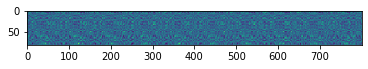

In [10]:

import matplotlib.pyplot as plt
plt.imshow(pulled_distribution_resultsd3['xy_hat'][:,:800])

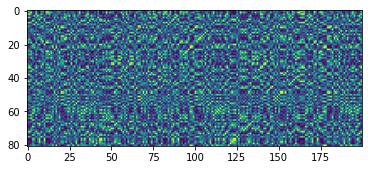

In [12]:
plt.imshow(pulled_distribution_resultsd3['xy_div_xyind_hat'][:,:200])

In [ ]:
vocab_size : 19
( : 12
) : 13
NULL : 14
SEP : 15
SOS : 16
EOS : 17
PAD : 18

In [ ]:
query
 3742 
 [12, 1, 5, 6, 10, 0, 4, 8, 10, 13]
key
 58 
 [2, 3, 7, 10]

In [ ]:
1, 5, 6, 10, 
0, 4, 8, 10
2, 3, 7, 10

1 2 0 1
0 1 2 1
2 0 1 1

0 3 6 9

In [ ]:
[12, 1, 5, 6, 10, 0, 4, 8, 9, 13]

In [ ]:
# Original with SGD 
# 1 epoch

Profiler Report

Action                             	|  Mean duration (s)	|Num calls	|  Total time (s)|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_            |  111.9          |  100 %          	|
--------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  106.02         	|1            |  106.02         |  94.748         	|
run_training_batch                 	|  0.84838        	|94           |  79.748         |  71.267         	|
optimizer_step_and_closure_0       	|  0.848          	|94           |  79.712         |  71.235         	|
training_step_and_backward         	|  0.84785        	|94           |  79.698         |  71.222         	|
model_forward                      	|  0.84431        	|94           |  79.365         |  70.924         	|
training_step                      	|  0.844          	|94           |  79.336         |  70.899         	|
get_train_batch                    	|  0.2482         	|94           |  23.331         |  20.849         	|
evaluation_step_and_end            	|  1.014          	|4            |  4.0559         |  3.6246         	|
validation_step                    	|  1.0138         	|4            |  4.0551         |  3.6238         	|
model_backward                     	|  0.0028811      	|94           |  0.27082        |  0.24202        	|
on_train_batch_end                 	|  0.0019145      	|94           |  0.17996        |  0.16082        	|
on_validation_end                  	|  0.050853       	|2            |  0.10171        |  0.090889       	|
cache_result                       	|  1.9878e-05     	|501          |  0.0099588      |  0.0088996      	|
on_validation_batch_end            	|  0.0019233      	|4            |  0.0076931      |  0.0068749      	|
on_train_end                       	|  0.0066462      	|1            |  0.0066462      |  0.0059394      	|
on_validation_start                	|  0.0020034      	|2            |  0.0040068      |  0.0035807      	|
on_batch_start                     	|  2.7216e-05     	|94           |  0.0025583      |  0.0022862      	|
on_after_backward                  	|  1.6831e-05     	|94           |  0.0015821      |  0.0014139      	|
on_epoch_start                     	|  0.0015688      	|1            |  0.0015688      |  0.001402       	|
on_train_start                     	|  0.0012749      	|1            |  0.0012749      |  0.0011393      	|
on_batch_end                       	|  1.354e-05      	|94           |  0.0012727      |  0.0011374      	|
training_step_end                  	|  1.2981e-05     	|94           |  0.0012202      |  0.0010905      	|
on_before_zero_grad                	|  1.2896e-05     	|94           |  0.0012122      |  0.0010833      	|
on_train_batch_start               	|  1.0139e-05     	|94           |  0.0009531      |  0.00085173     	|
on_validation_batch_start          	|  1.9116e-05     	|4            |  7.6465e-05     |  6.8333e-05     	|
on_fit_start                       	|  4.8612e-05     	|1            |  4.8612e-05     |  4.3442e-05     	|
validation_step_end                	|  1.1254e-05     	|4            |  4.5015e-05     |  4.0227e-05     	|
on_epoch_end                       	|  1.0189e-05     	|3            |  3.0568e-05     |  2.7317e-05     	|
on_validation_epoch_end            	|  1.5259e-05     	|2            |  3.0518e-05     |  2.7272e-05     	|
on_train_epoch_end                 	|  2.0348e-05     	|1            |  2.0348e-05     |  1.8184e-05     	|
on_validation_epoch_start          	|  9.6985e-06     	|2            |  1.9397e-05     |  1.7334e-05     	|
on_train_epoch_start               	|  1.6231e-05     	|1            |  1.6231e-05     |  1.4505e-05     	|
on_before_accelerator_backend_setup	|  8.957e-06      	|1            |  8.957e-06      |  8.0044e-06     	|

In [ ]:
# Do not compute metrics during training
# 1 epoch

Profiler Report

Action                             	|  Mean duration (s)	|Num calls |  Total time (s) 	|  Percentage %   	|
-------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_             |  31.589         	|  100 %          	|
-------------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  27.208         	|1             |  27.208         	|  86.132         	|
get_train_batch                    	|  0.24756        	|94            |  23.27          	|  73.666         	|
evaluation_step_and_end            	|  0.91329        	|4             |  3.6532         	|  11.565         	|
validation_step                    	|  0.91311        	|4             |  3.6524         	|  11.562         	|
run_training_batch                 	|  0.014024       	|94            |  1.3183         	|  4.1732         	|
optimizer_step_and_closure_0       	|  0.013643       	|94            |  1.2824         	|  4.0598         	|
training_step_and_backward         	|  0.013501       	|94            |  1.2691         	|  4.0176         	|
model_forward                      	|  0.010339       	|94            |  0.9719         	|  3.0767         	|
training_step                      	|  0.010142       	|94            |  0.95336        	|  3.0181         	|
model_backward                     	|  0.0027228      	|94            |  0.25595        	|  0.81025        	|
on_train_batch_end                 	|  0.0019353      	|94            |  0.18192        	|  0.57591        	|
on_validation_end                  	|  0.043622       	|2             |  0.087243       	|  0.27619        	|
on_train_end                       	|  0.0083497      	|1             |  0.0083497      	|  0.026433       	|
cache_result                       	|  1.4289e-05     	|501           |  0.0071588      	|  0.022663       	|
on_validation_batch_end            	|  0.0016247      	|4             |  0.006499       	|  0.020574       	|
on_validation_start                	|  0.002297       	|2             |  0.004594       	|  0.014543       	|
on_batch_start                     	|  3.0167e-05     	|94            |  0.0028357      	|  0.008977       	|
on_epoch_start                     	|  0.001795       	|1             |  0.001795       	|  0.0056824      	|
on_after_backward                  	|  1.4745e-05     	|94            |  0.001386       	|  0.0043878      	|
on_train_start                     	|  0.0013637      	|1             |  0.0013637      	|  0.0043171      	|
on_before_zero_grad                	|  1.2626e-05     	|94            |  0.0011868      	|  0.0037571      	|
on_batch_end                       	|  1.2578e-05     	|94            |  0.0011824      	|  0.003743       	|
on_train_batch_start               	|  1.1199e-05     	|94            |  0.0010527      	|  0.0033325      	|
training_step_end                  	|  9.135e-06      	|94            |  0.00085869     	|  0.0027184      	|
on_validation_batch_start          	|  1.7729e-05     	|4             |  7.0915e-05     	|  0.00022449     	|
validation_step_end                	|  1.291e-05      	|4             |  5.1639e-05     	|  0.00016347     	|
on_fit_start                       	|  3.9244e-05     	|1             |  3.9244e-05     	|  0.00012423     	|
on_validation_epoch_start          	|  1.5339e-05     	|2             |  3.0679e-05     	|  9.712e-05      	|
on_epoch_end                       	|  9.869e-06      	|3             |  2.9607e-05     	|  9.3727e-05     	|
on_validation_epoch_end            	|  1.2123e-05     	|2             |  2.4246e-05     	|  7.6755e-05     	|
on_train_epoch_end                 	|  1.8796e-05     	|1             |  1.8796e-05     	|  5.9502e-05     	|
on_train_epoch_start               	|  1.8285e-05     	|1             |  1.8285e-05     	|  5.7885e-05     	|
on_before_accelerator_backend_setup	|  8.186e-06      	|1             |  8.186e-06      	|  2.5914e-05     	|

In [ ]:
# With SET data
# 1 epoch

Profiler Report

Action                             	|  Mean duration (s)	|Num calls 	|  Total time (s) 	|  Percentage %   	|
-------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_             |  2.7329         	|  100 %          	|
-------------------------------------------------------------------------------------------------------------------------------
run_training_epoch                 	|  0.54216        	|1             |  0.54216        	|  19.838         	|
evaluation_step_and_end            	|  0.026706       	|15            |  0.40059        	|  14.658         	|
validation_step                    	|  0.026586       	|15            |  0.39879        	|  14.592         	|
run_training_batch                 	|  0.013455       	|13            |  0.17491        	|  6.4004         	|
optimizer_step_and_closure_0       	|  0.013157       	|13            |  0.17104        	|  6.2586         	|
training_step_and_backward         	|  0.013081       	|13            |  0.17005        	|  6.2226         	|
on_validation_end                  	|  0.084182       	|2             |  0.16836        	|  6.1608         	|
model_forward                      	|  0.010066       	|13            |  0.13086        	|  4.7883         	|
training_step                      	|  0.0099253      	|13            |  0.12903        	|  4.7214         	|
get_train_batch                    	|  0.0035085      	|13            |  0.045611       	|  1.669          	|
model_backward                     	|  0.0025997      	|13            |  0.033796       	|  1.2366         	|
on_train_batch_end                 	|  0.0010495      	|13            |  0.013643       	|  0.49922        	|
on_train_end                       	|  0.010448       	|1             |  0.010448       	|  0.3823         	|
on_validation_start                	|  0.0016977      	|2             |  0.0033954      	|  0.12425        	|
on_validation_batch_end            	|  0.00013582     	|15            |  0.0020373      	|  0.07455        	|
cache_result                       	|  1.1597e-05     	|129           |  0.001496       	|  0.054741       	|
on_epoch_start                     	|  0.0011864      	|1             |  0.0011864      	|  0.043413       	|
on_train_start                     	|  0.0010186      	|1             |  0.0010186      	|  0.037273       	|
on_validation_batch_start          	|  1.1497e-05     	|15            |  0.00017245     	|  0.0063103      	|
on_after_backward                  	|  1.2964e-05     	|13            |  0.00016853     	|  0.0061669      	|
on_batch_start                     	|  1.2891e-05     	|13            |  0.00016758     	|  0.0061321      	|
on_batch_end                       	|  1.1612e-05     	|13            |  0.00015096     	|  0.0055238      	|
on_before_zero_grad                	|  1.161e-05      	|13            |  0.00015093     	|  0.0055227      	|
validation_step_end                	|  7.6145e-06     	|15            |  0.00011422     	|  0.0041794      	|
on_train_batch_start               	|  8.0615e-06     	|13            |  0.0001048      	|  0.0038348      	|
training_step_end                  	|  7.8904e-06     	|13            |  0.00010257     	|  0.0037534      	|
on_fit_start                       	|  4.0837e-05     	|1             |  4.0837e-05     	|  0.0014943      	|
on_validation_epoch_start          	|  1.7007e-05     	|2             |  3.4014e-05     	|  0.0012446      	|
on_epoch_end                       	|  9.01e-06       	|3             |  2.703e-05      	|  0.00098908     	|
on_validation_epoch_end            	|  1.2955e-05     	|2             |  2.5909e-05     	|  0.00094806     	|
on_train_epoch_end                 	|  1.0279e-05     	|1             |  1.0279e-05     	|  0.00037613     	|
on_train_epoch_start               	|  1.0049e-05     	|1             |  1.0049e-05     	|  0.00036771     	|
on_before_accelerator_backend_setup	|  7.294e-06      	|1             |  7.294e-06      	|  0.0002669      	|